# **MINI CHALLENGE**

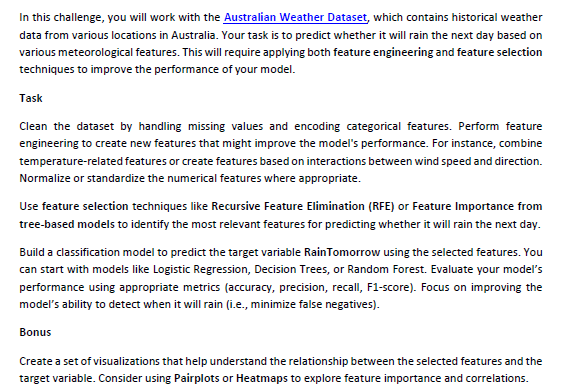

# **1. Importing All Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




# **2. Dataset Overview**

In [ ]:
# Load the dataset
# https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data

!kaggle datasets download -d arunavakrchakraborty/australia-weather-data


Dataset URL: https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data
License(s): CC0-1.0
australia-weather-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip australia-weather-data.zip


Archive:  australia-weather-data.zip
replace Weather Test Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Weather Test Data.csv   
replace Weather Training Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Weather Training Data.csv  


In [ ]:
training_data = pd.read_csv('/content/Weather Training Data.csv')
testing_data = pd.read_csv('/content/Weather Test Data.csv')

## **2.1 Inspecting Training Data**

In [ ]:
training_data.head()

row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
3       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
4       1013.4       1010.1       NaN       NaN     16.3     25.5         No   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [ ]:
training_data.shape

(99516, 23)

## **2.2 Inspecting Testing Data**

In [ ]:
testing_data.head()

row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     12.9     25.7       0.0          NaN       NaN   
1   Row1   Albury      9.2     28.0       0.0          NaN       NaN   
2   Row2   Albury     14.3     25.0       0.0          NaN       NaN   
3   Row3   Albury      9.7     31.9       0.0          NaN       NaN   
4   Row4   Albury     15.9     18.6      15.6          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         WSW           46.0          W  ...         26.0         38.0   
1          NE           24.0         SE  ...          9.0         45.0   
2           W           50.0         SW  ...         24.0         49.0   
3         NNW           80.0         SE  ...         28.0         42.0   
4           W           61.0        NNW  ...         28.0         76.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         30.0       1007.6       1008.7       NaN       2.0     21.0   
1         16.0       1017.6       1012.8       NaN       NaN     18.1   
2         19.0       1009.6       1008.2       1.0       NaN     18.1   
3          9.0       1008.9       1003.6       NaN       NaN     18.3   
4         93.0        994.3        993.0       8.0       8.0     17.4   

   Temp3pm  RainToday  
0     23.2         No  
1     26.5         No  
2     24.6         No  
3     30.2         No  
4     15.8        Yes  

[5 rows x 22 columns]

In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [ ]:
testing_data.shape

(42677, 22)

## **2.3 Dividing The Features Into Different Categories**
Based on the columns and their data types from the training data, here is the categorization of the features into **numerical**, **categorical**, and **mixed** features:

---

### 1. **Numerical Features**

These are the features with numerical data types (`float64` or `int64`).

1. **MinTemp**  
2. **MaxTemp**  
3. **Rainfall**  
4. **Evaporation**  
5. **Sunshine**  
6. **WindGustSpeed**  
7. **WindSpeed9am**  
8. **WindSpeed3pm**  
9. **Humidity9am**  
10. **Humidity3pm**  
11. **Pressure9am**  
12. **Pressure3pm**  
13. **Temp3pm**
14. **Temp9am**  



---

### 2. **Categorical Features**

These are the features with `object` data types, typically representing categories.

1. **RainToday**  
2. **Location**  
3. **WindGustDir**  
4. **WindDir9am**  
5. **WindDir3pm**
6. **Cloud3pm**
7. **Cloud9am**
8. **RainTomorrow** (binary: `0` or `1`)   

---

### 3. **Mixed Features**

These features are not explicitly mixed in terms of data types but might require special handling due to potential inconsistencies or transformations.

1. **row ID** – Although categorized as an object, this is likely a unique identifier and not useful for predictive modeling.  


---



In [ ]:
# List of numerical features
# Numerical features
numerical_features = [
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
    "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"
]

# Categorical features
categorical_features = [
    "RainToday", "Location", "WindGustDir", "WindDir9am",
    "WindDir3pm", "Cloud9am", "Cloud3pm", "RainTomorrow"
]


In [ ]:
# dropping the row ID
training_data.drop('row ID', axis=1, inplace=True)
testing_data.drop('row ID', axis=1, inplace=True)

# **3. Exploratory Data Analysis (EDA) On Training Data**

####**Univariate Analysis**

Univariate analysis focuses on analyzing each feature in the dataset independently.



*   **Distribution analysis:** The distribution of each feature is examined to identify its shape, central tendency, and dispersion
*   **Identifying potential issues:** Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values



##### **Steps of doing Univariate Analysis on Numerical columns**

**Descriptive Statistics:** Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations:** Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

**Data Imbalances**

**Identifying Outliers:** Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

##### **Numerical Variables**

**Automation Function for Univariate Analysis Of Numerical Features**

In [ ]:
def analyze_numerical_feature(df, feature):
    # Statistical summary and skewness
    stats = df[feature].describe()
    skewness = df[feature].skew()
    missing_values = df[feature].isnull().sum()  # Calculate missing values

    # Set up a canvas for plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram
    axs[0, 0].hist(df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')  # Exclude missing values
    axs[0, 0].set_title(f'Histogram of {feature}')
    axs[0, 0].set_xlabel(feature)
    axs[0, 0].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(df[feature].dropna(), ax=axs[0, 1], color='purple', fill=True)  # Exclude missing values
    axs[0, 1].set_title(f'KDE Plot of {feature}')
    axs[0, 1].set_xlabel(feature)
    axs[0, 1].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=df[feature], ax=axs[1, 0], color='lightgreen')
    axs[1, 0].set_title(f'Boxplot of {feature}')
    axs[1, 0].set_xlabel(feature)

    # Key Metrics
    axs[1, 1].axis('off')  # Turn off the axis
    textstr = (
        f"### Key Metrics ###\n\n"
        f"{stats.to_string()}\n\n"
        f"Skewness: {skewness:.2f}\n"
        f"Missing Values: {missing_values}"
    )
    axs[1, 1].text(
        0.5, 0.5, textstr, fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle="round", facecolor="lightgrey")
    )

    # Adjust layout
    plt.tight_layout()
    plt.show()


Analyzing: MinTemp


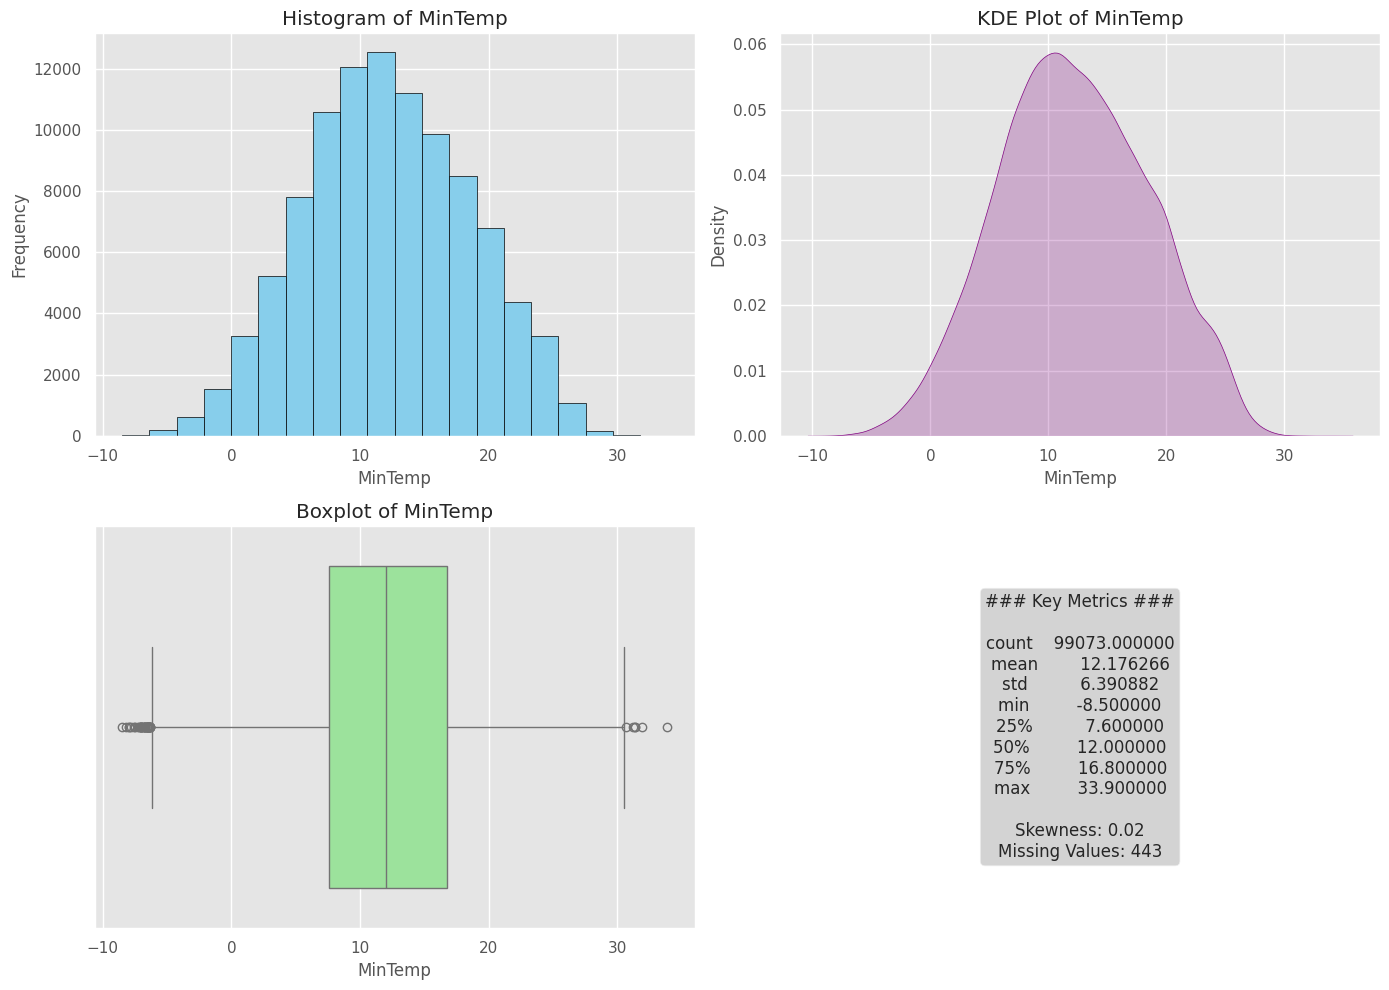

Analyzing: MaxTemp


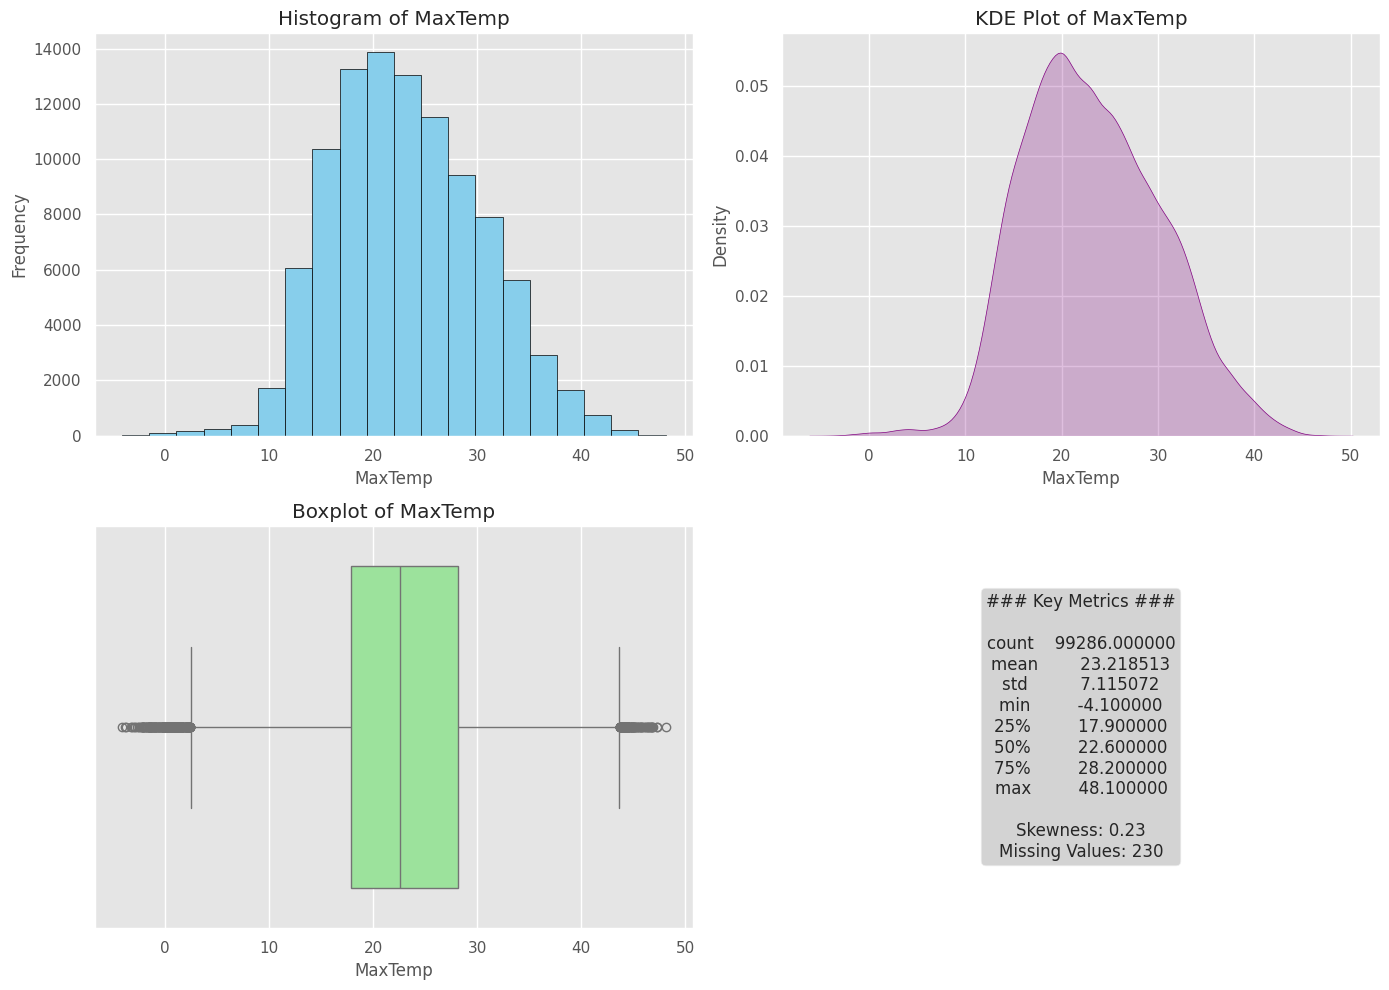

Analyzing: Rainfall


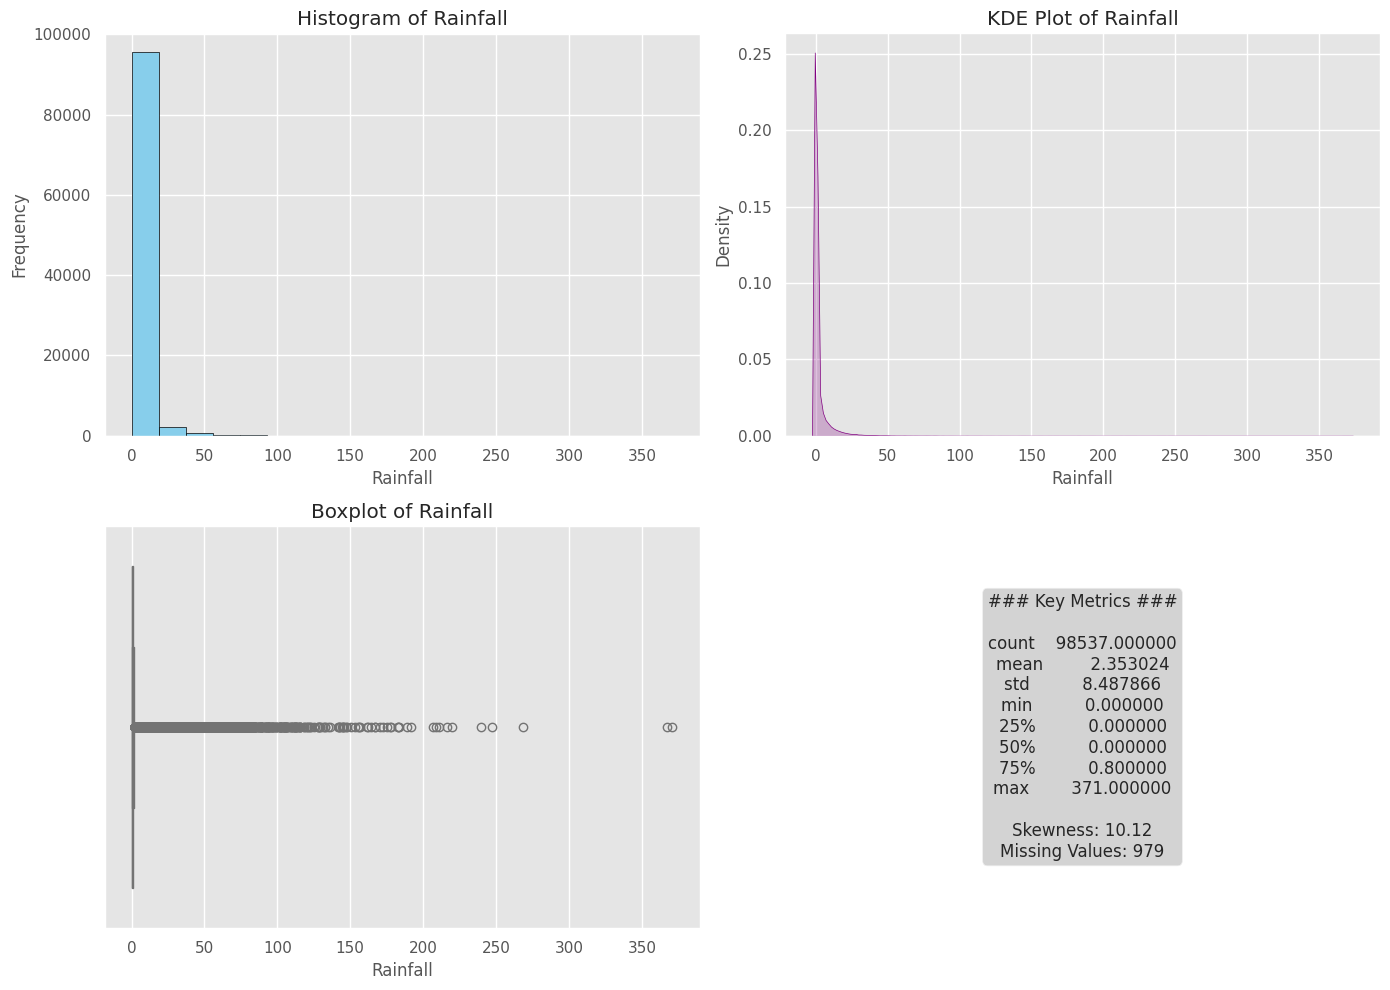

Analyzing: Evaporation


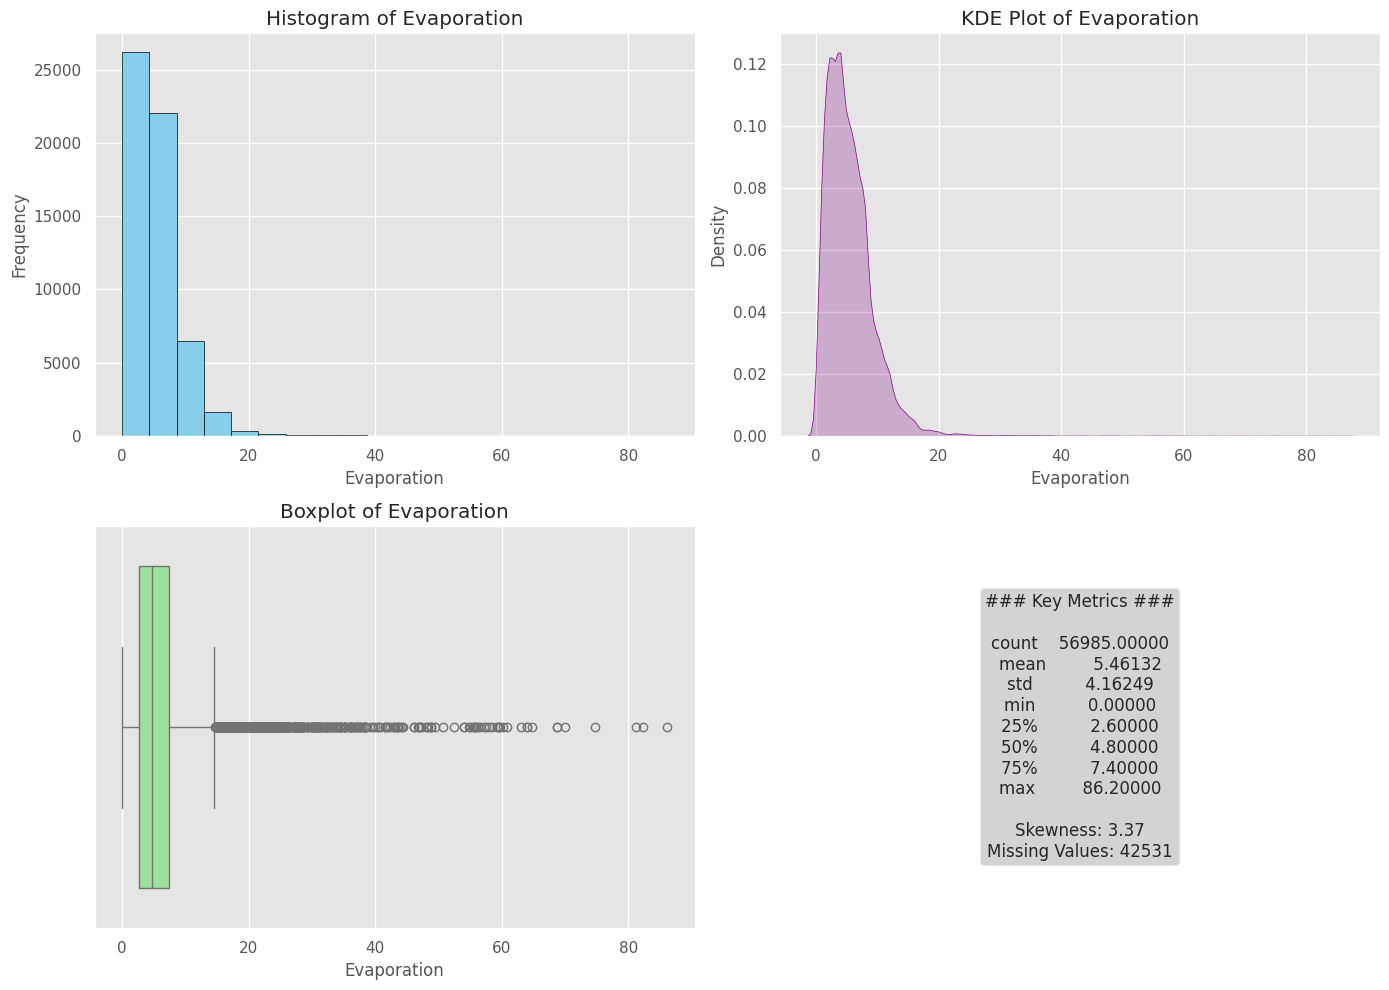

Analyzing: Sunshine


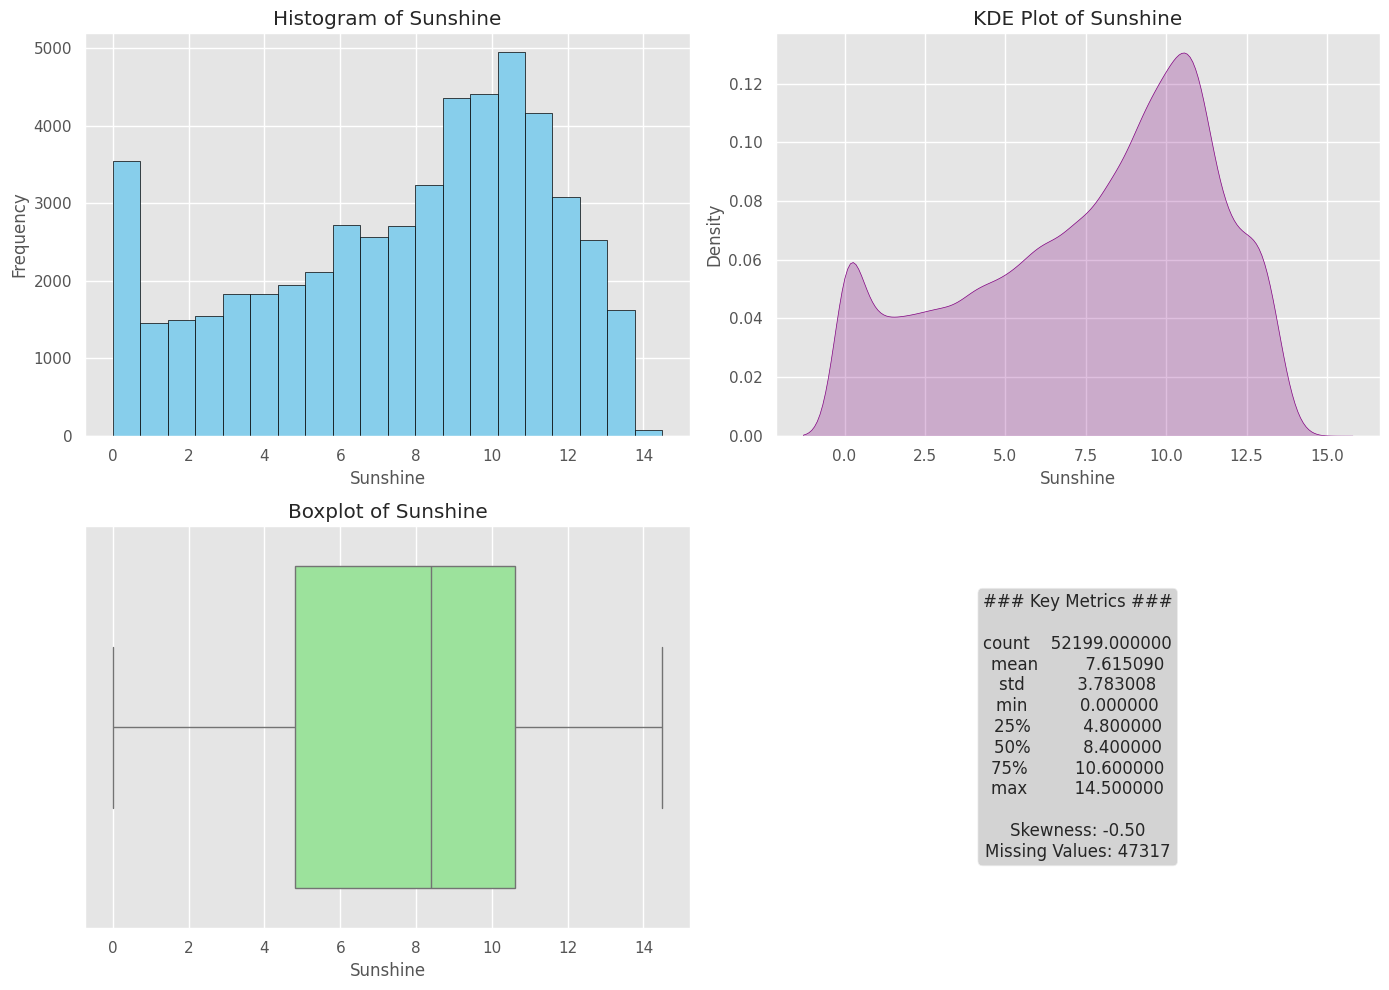

Analyzing: WindGustSpeed


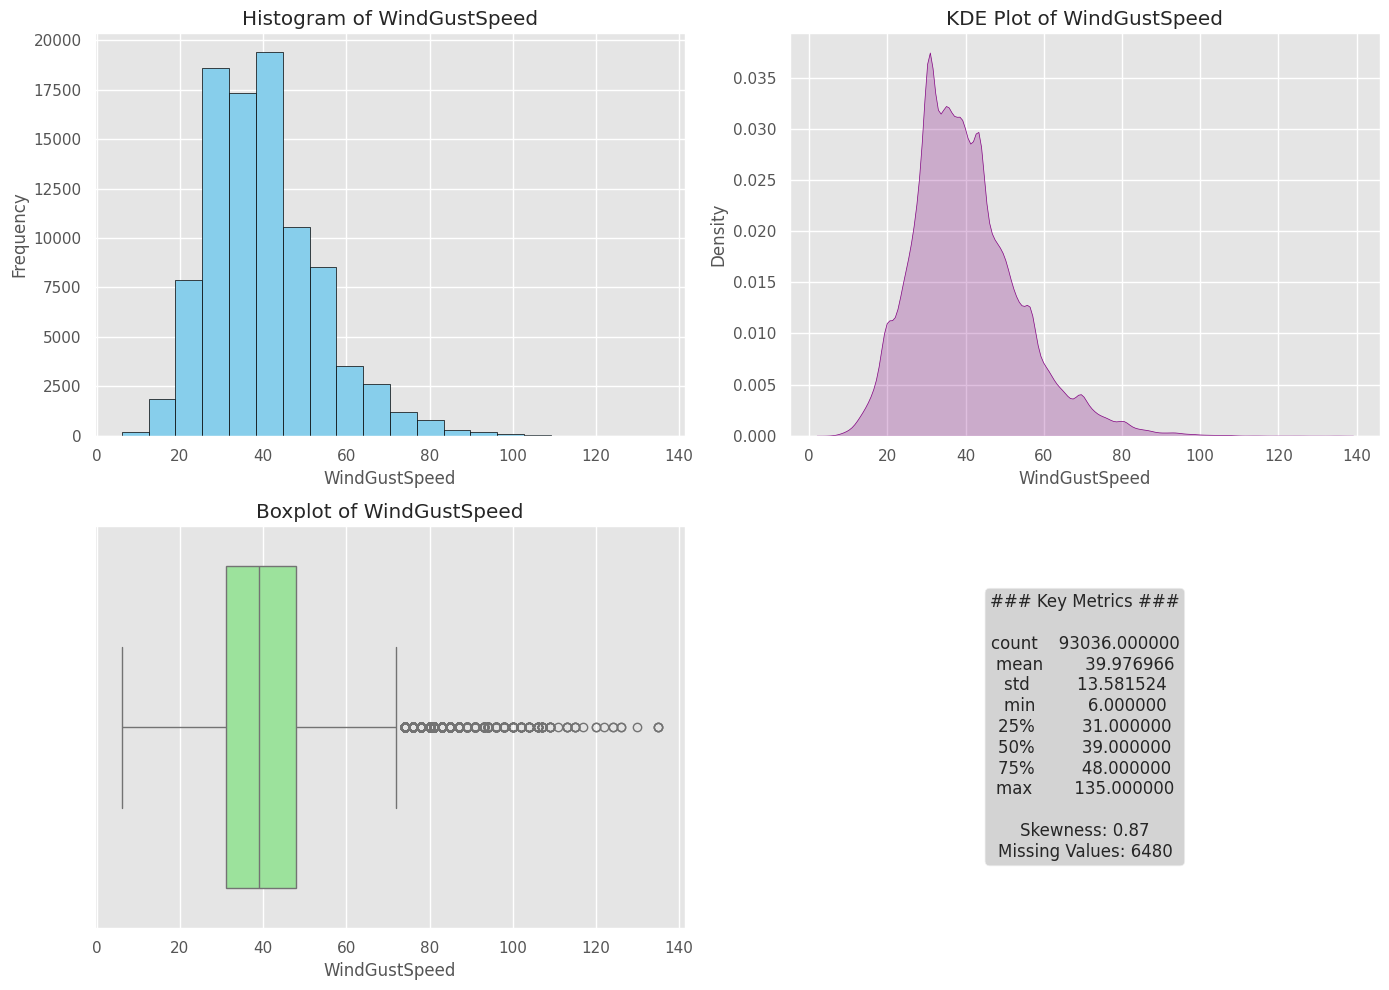

Analyzing: WindSpeed9am


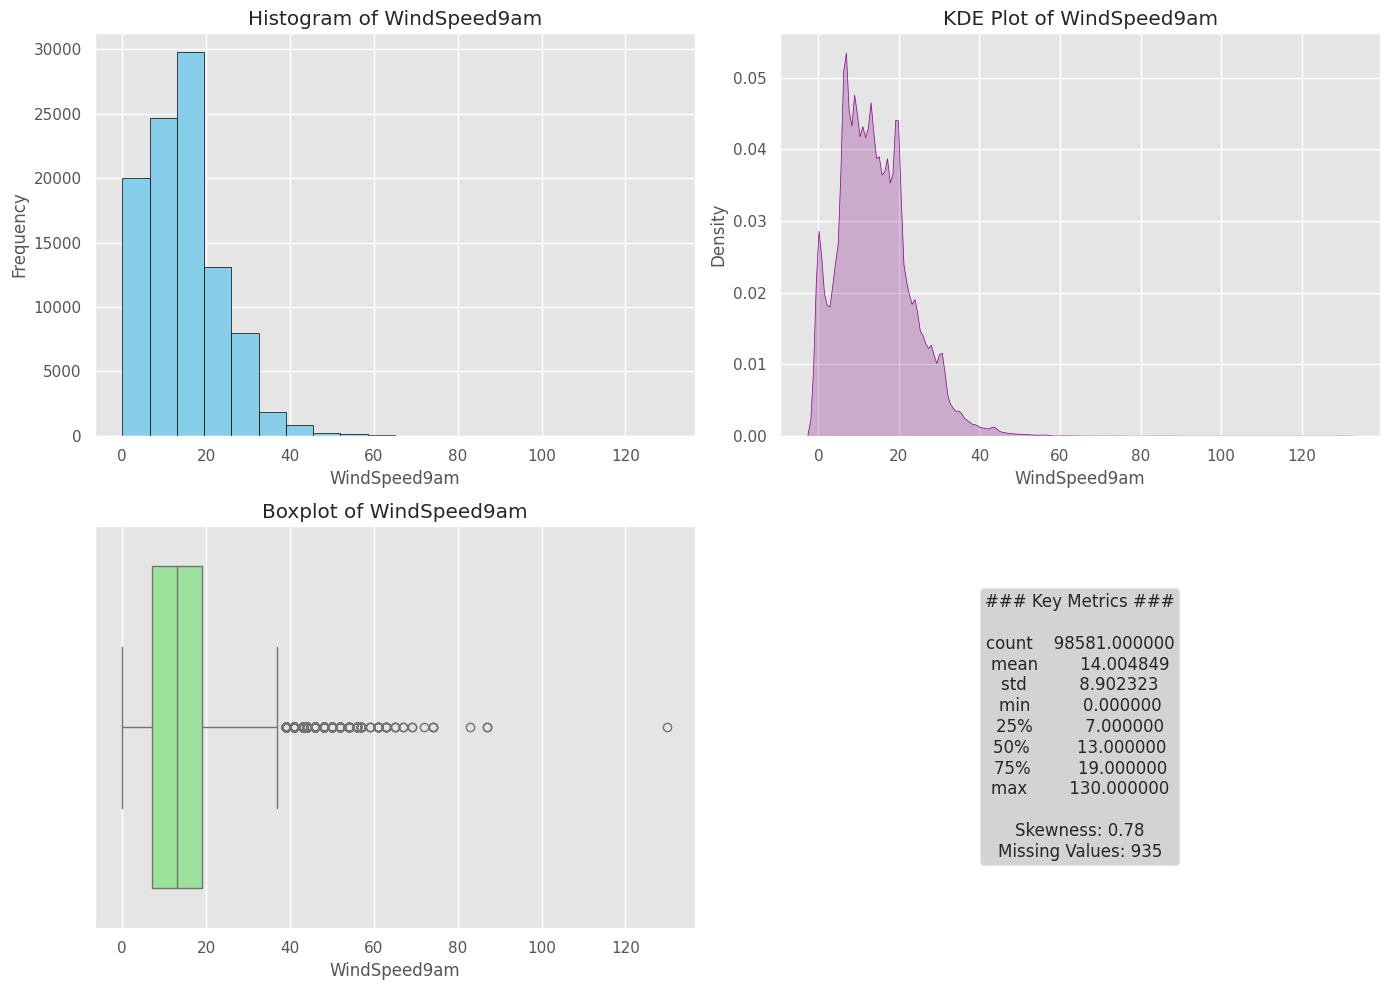

Analyzing: WindSpeed3pm


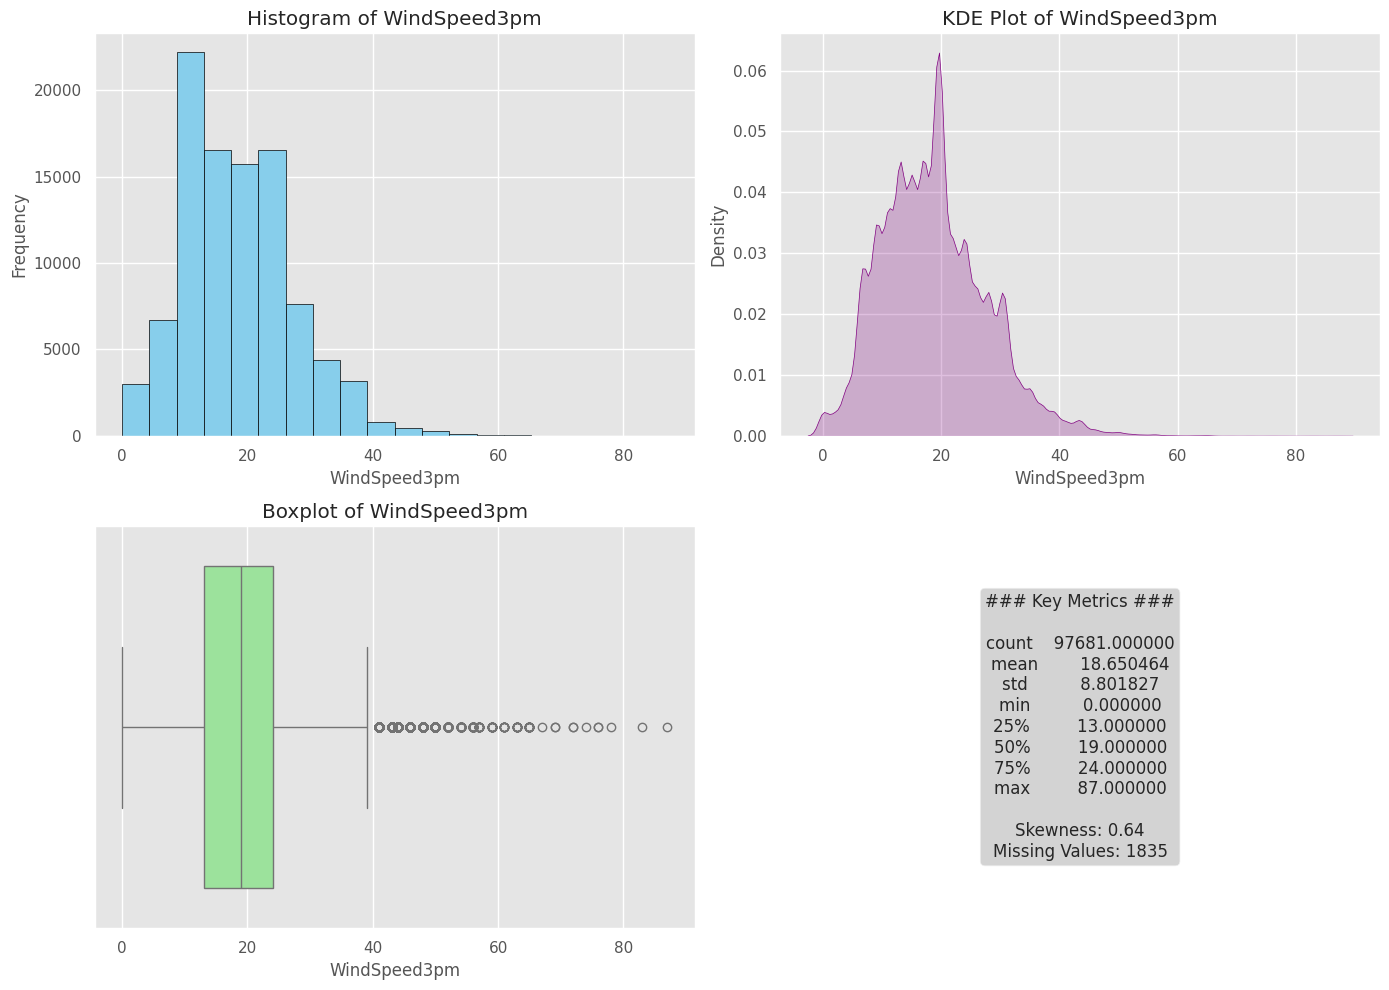

Analyzing: Humidity9am


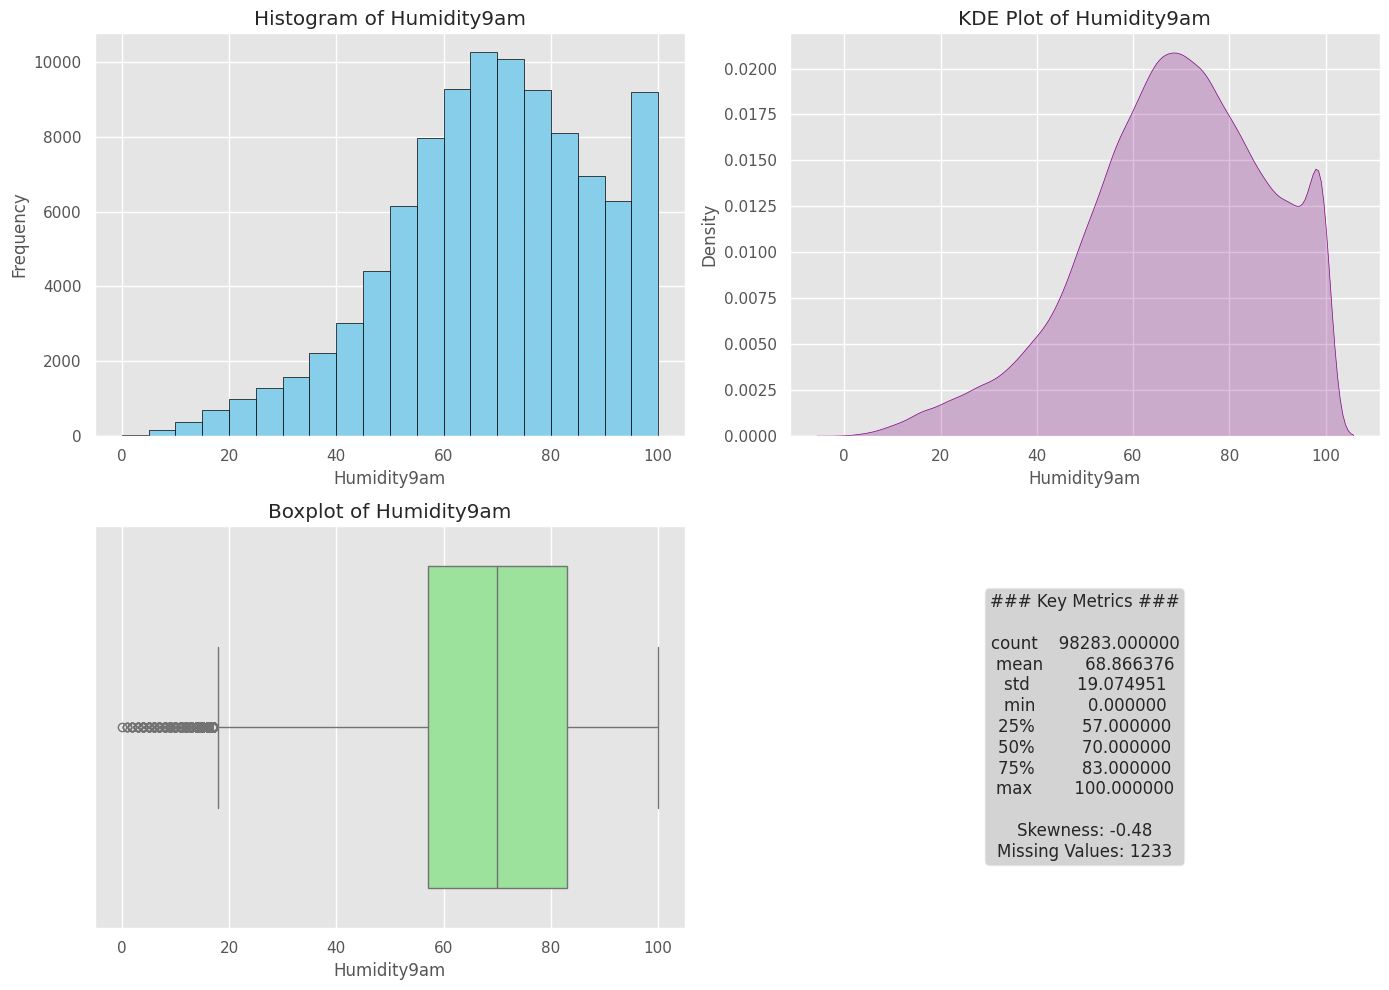

Analyzing: Humidity3pm


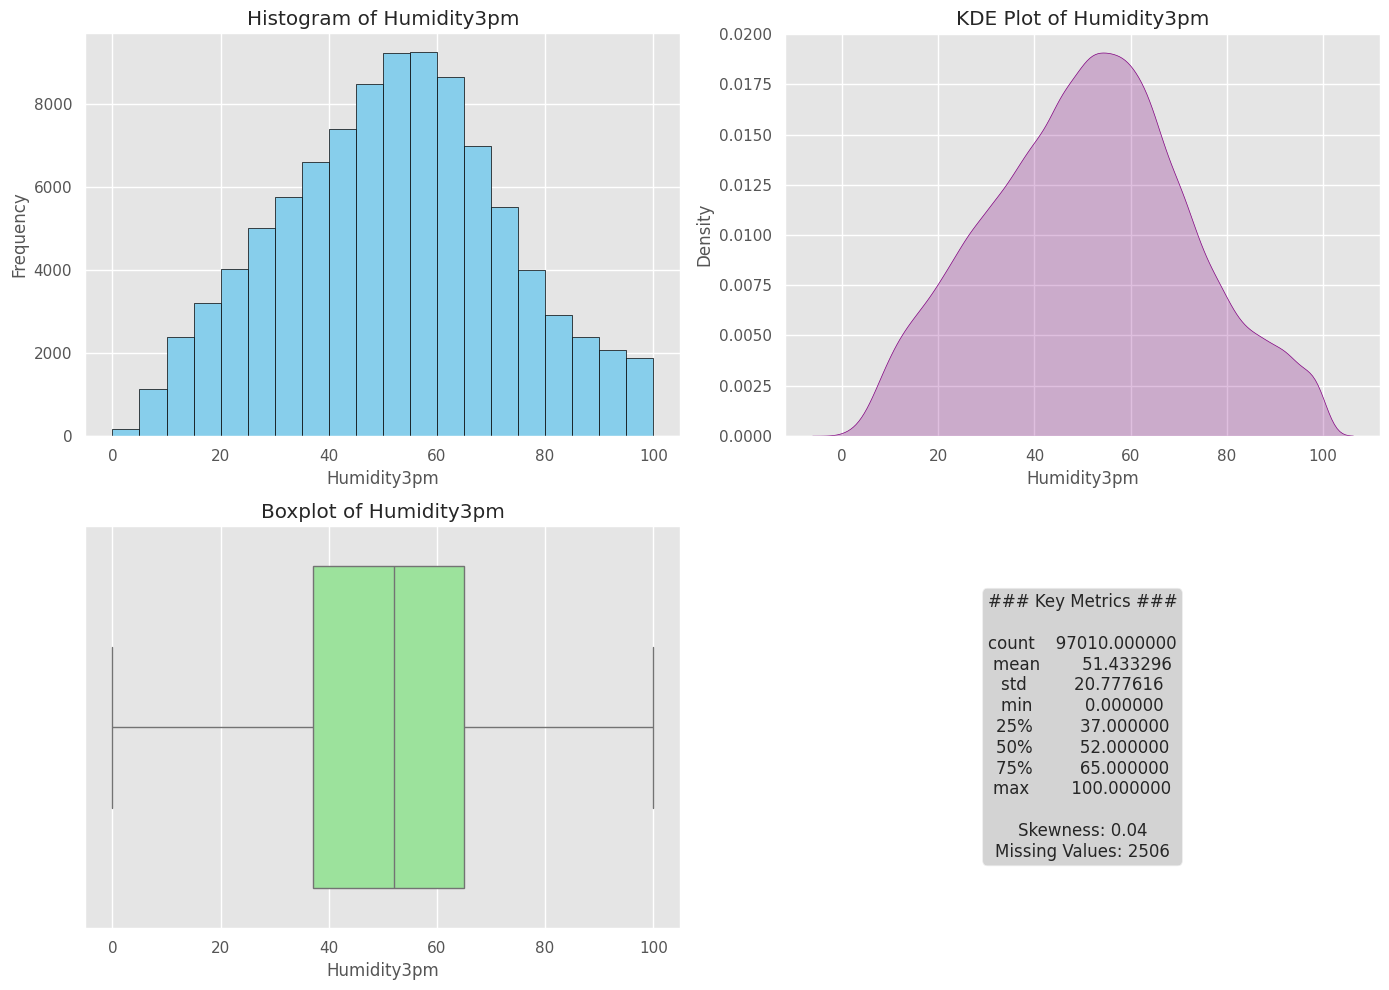

Analyzing: Pressure9am


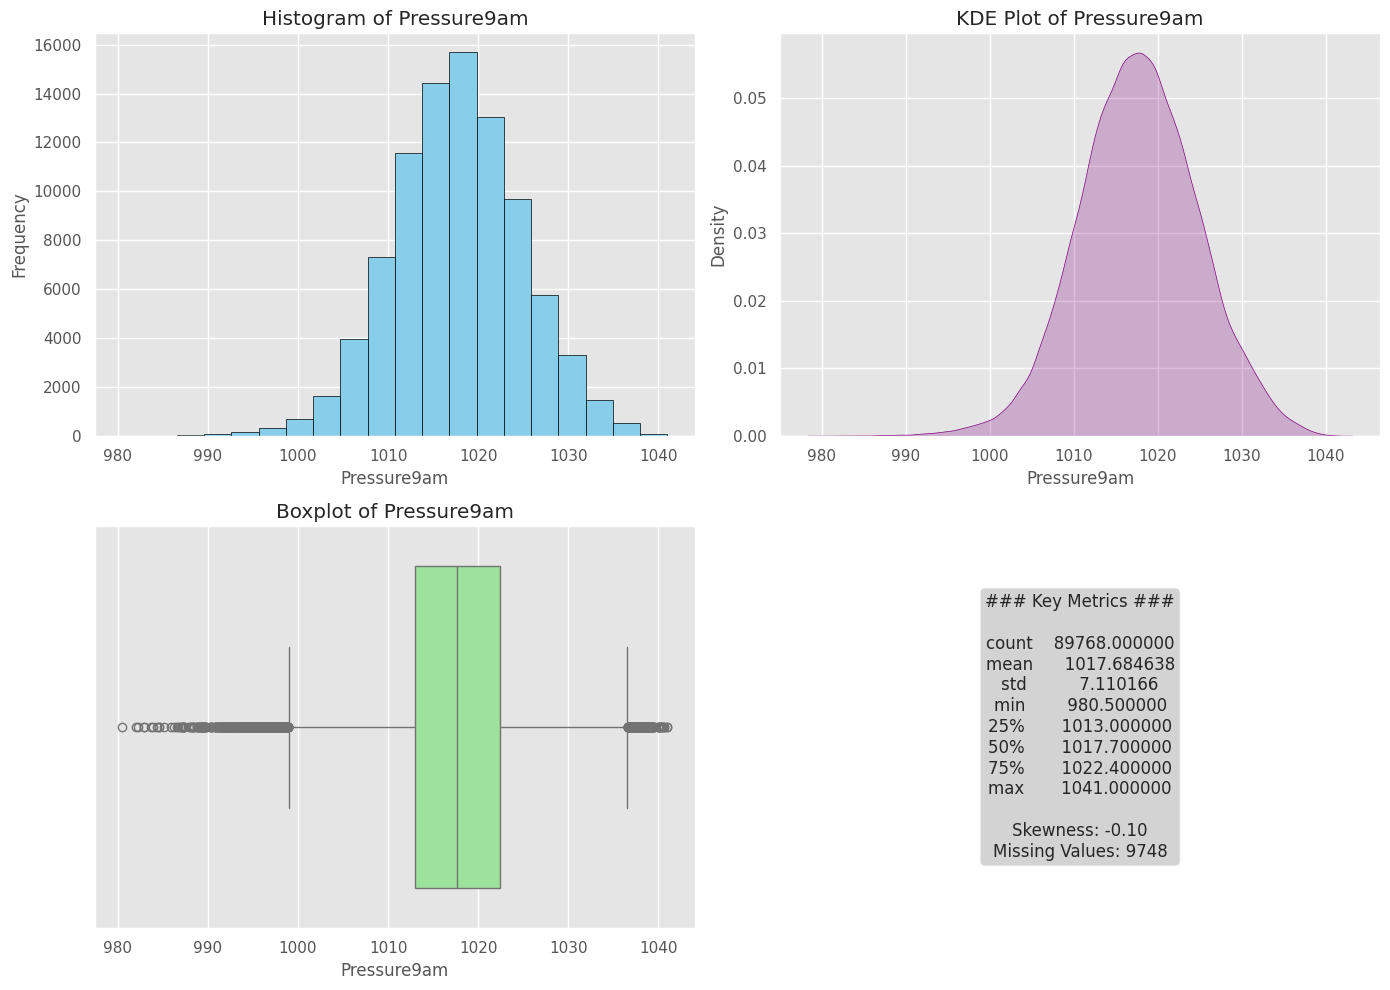

Analyzing: Pressure3pm


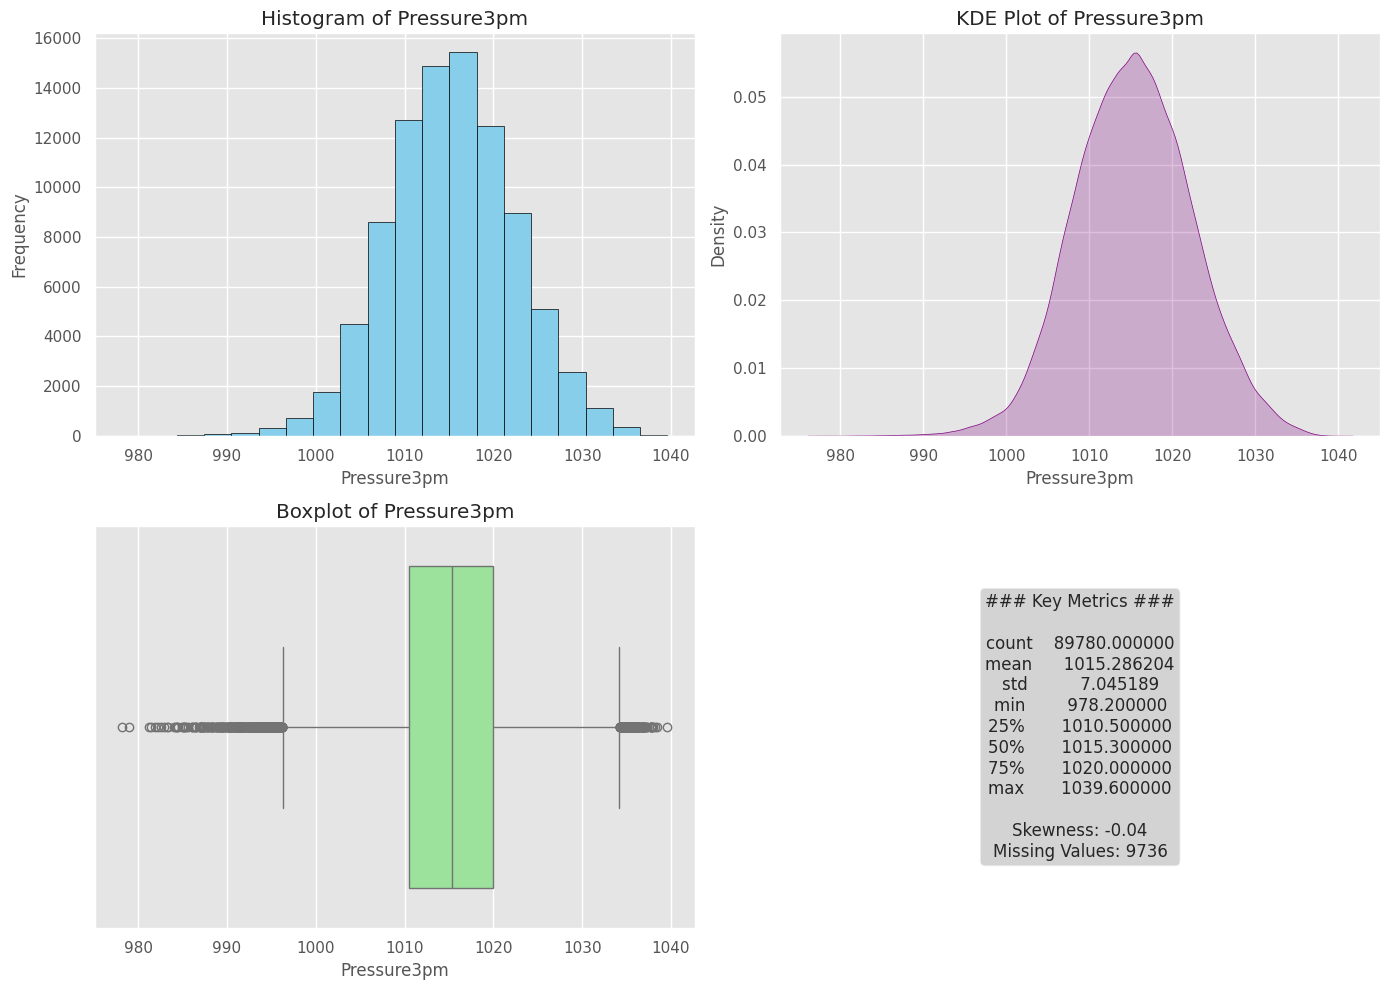

Analyzing: Temp9am


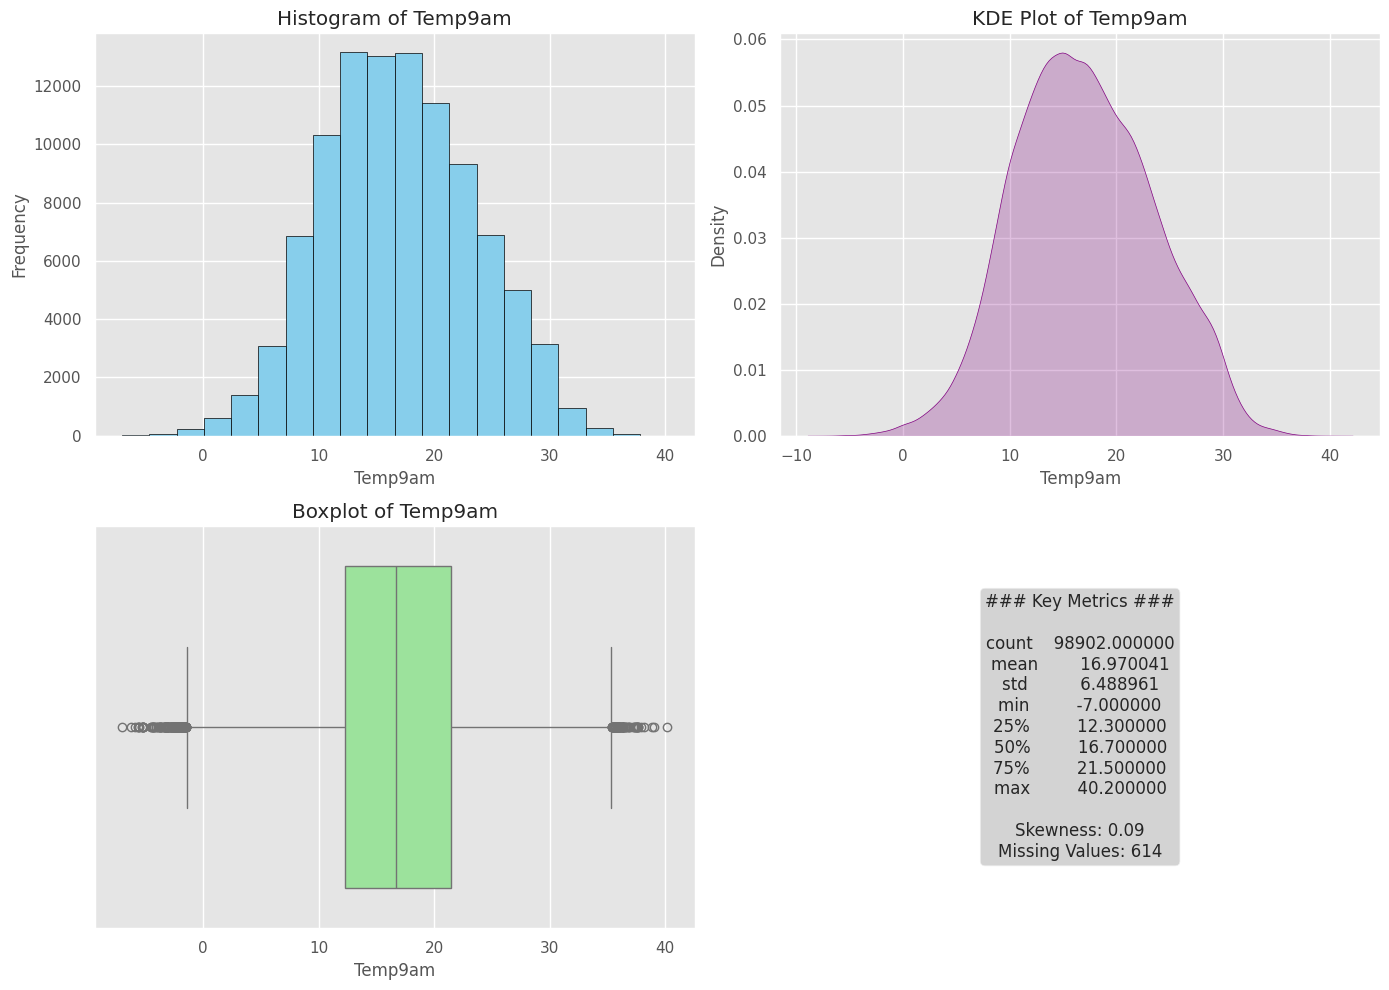

Analyzing: Temp3pm


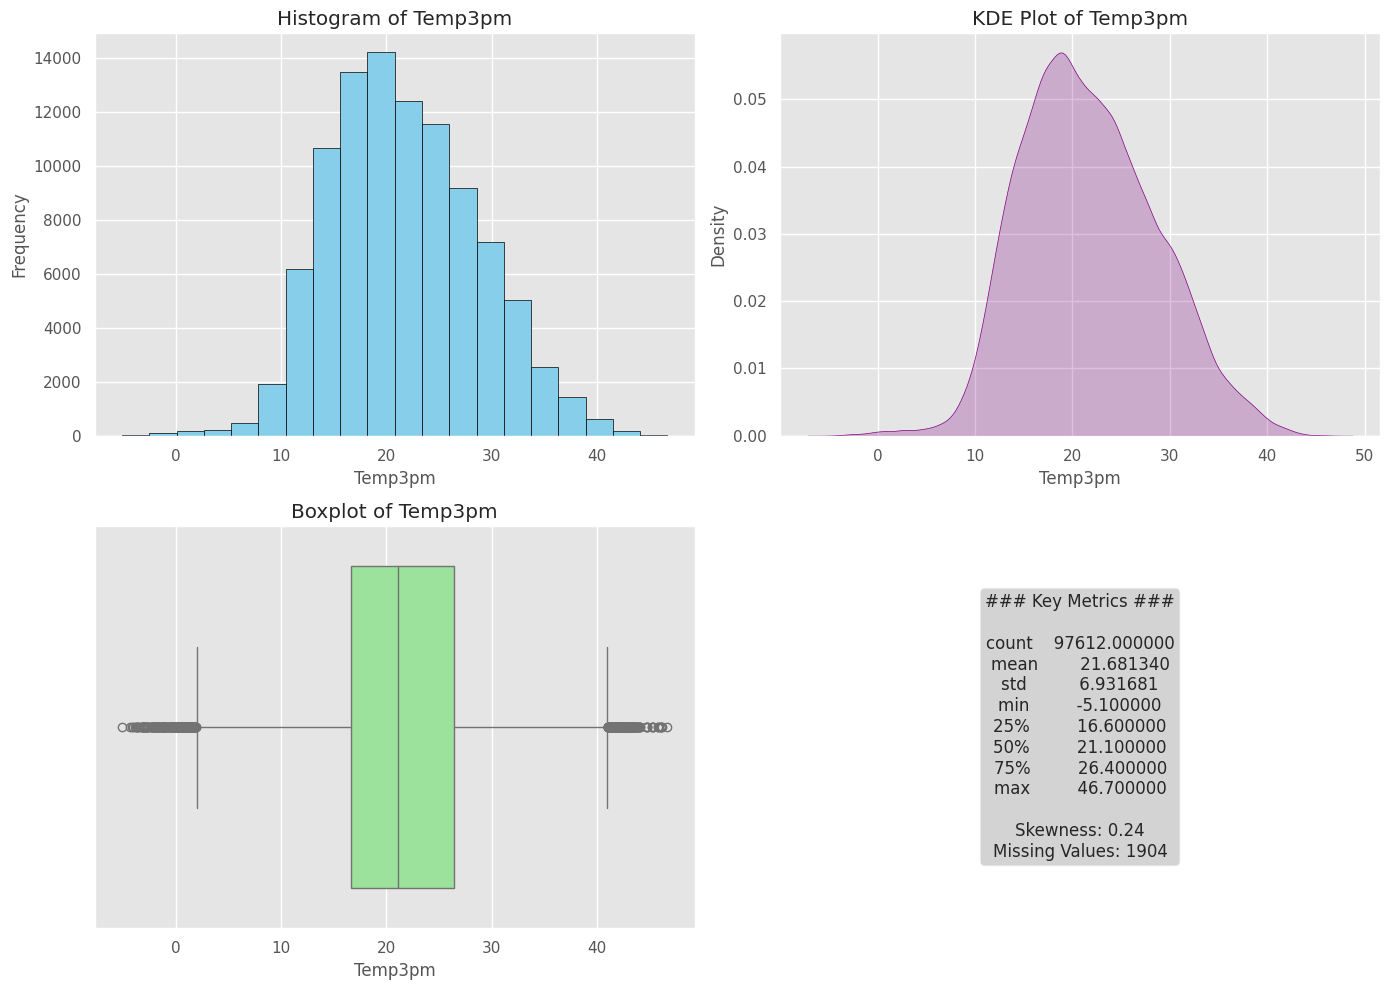

In [ ]:
# Call the function for all numerical features
for feature in numerical_features:
    print(f"Analyzing: {feature}")
    analyze_numerical_feature(training_data, feature)

##### **Categorical Variables**

**Automation Function for Univariate Analysis Of Categorical Features**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_categorical_variable(df, column):
    """
    Perform univariate analysis for a categorical variable in a presentable manner.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name of the categorical variable to analyze.
    """
    # Value counts
    value_counts = df[column].value_counts()
    missing_values = df[column].isnull().sum()

    # Set up subplots for bar and pie charts
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Bar Plot
    value_counts.plot(kind='bar', color='skyblue', ax=axs[0])
    axs[0].set_title(f'Bar Plot of {column}', fontsize=14)
    axs[0].set_xlabel(column, fontsize=12)
    axs[0].set_ylabel('Frequency', fontsize=12)

    # Pie Chart
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'yellow', 'orange', 'skyblue', 'violet', 'pink'], ax=axs[1])
    axs[1].set_title(f'Pie Chart of {column}', fontsize=14)
    axs[1].set_ylabel('')  # Remove y-label for the pie chart

    # Summary Box
    axs[2].axis('off')  # Turn off the axis
    summary_text = f"### Analysis of '{column}' ###\n\n"
    summary_text += "Value Counts:\n"
    summary_text += "\n".join([f"{index}: {value}" for index, value in value_counts.items()])
    summary_text += f"\n\nMissing Values: {missing_values}"
    axs[2].text(0.5, 0.5, summary_text, fontsize=12, ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor="lightgrey"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


Analyzing: RainToday


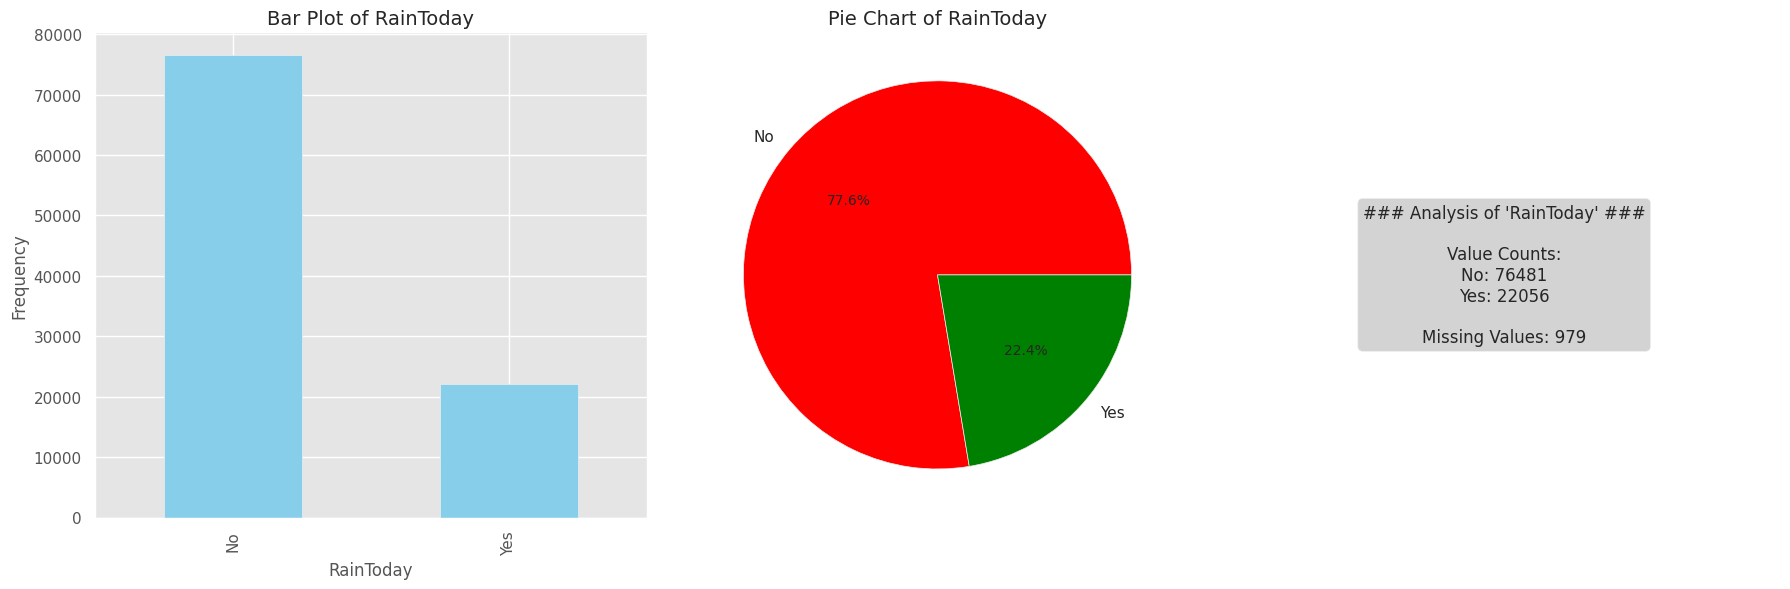

Analyzing: Location


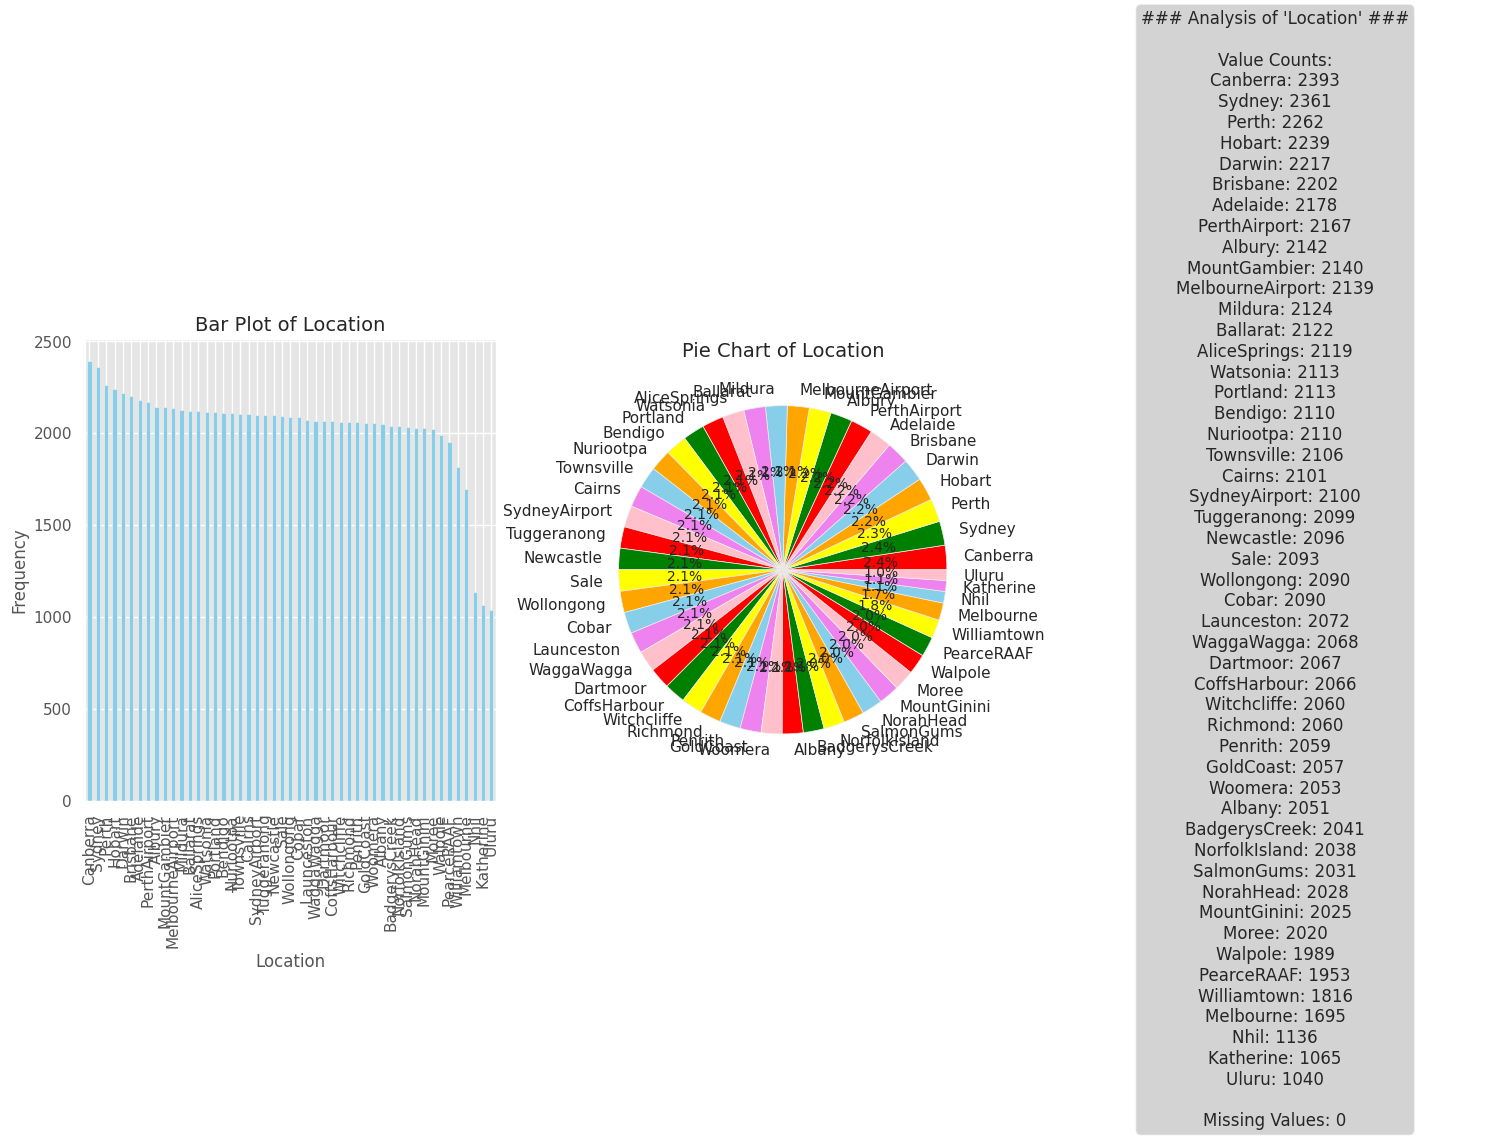

Analyzing: WindGustDir


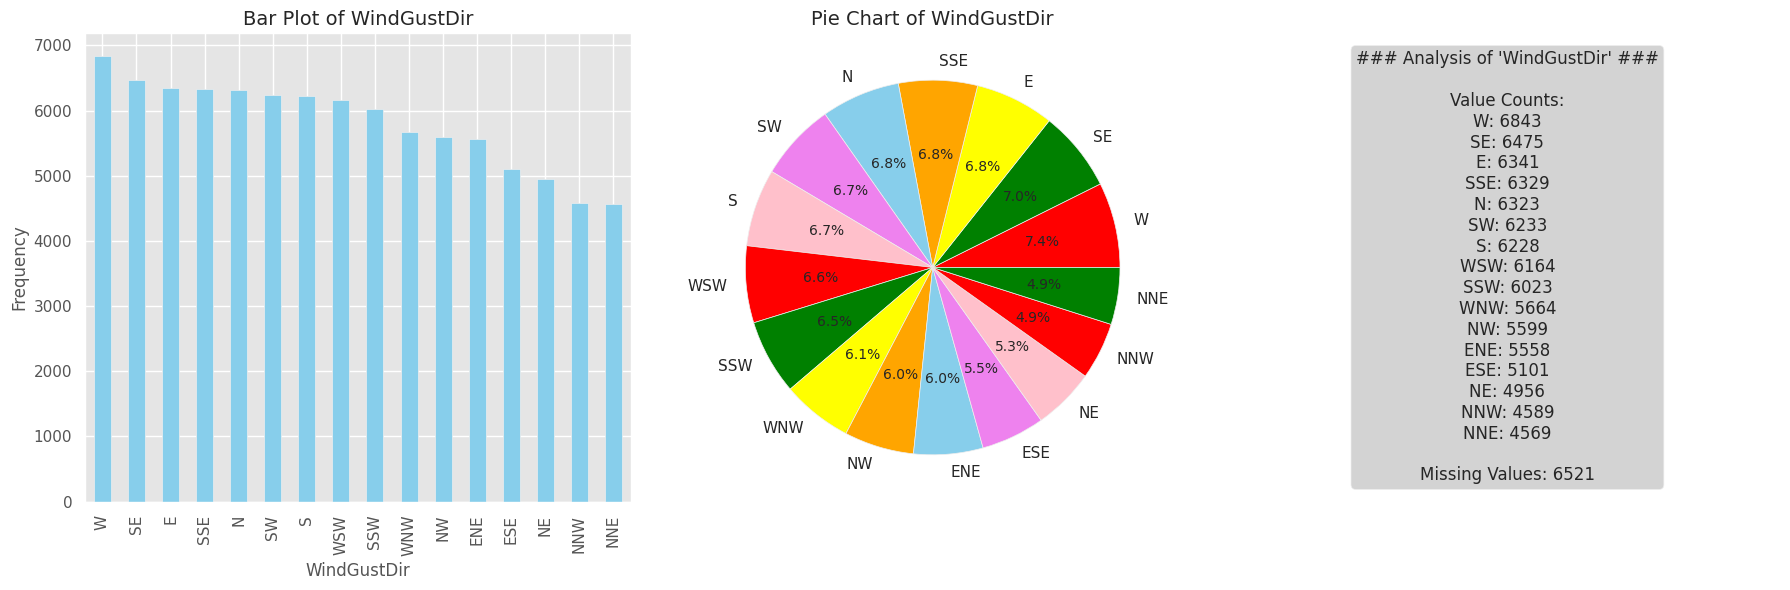

Analyzing: WindDir9am


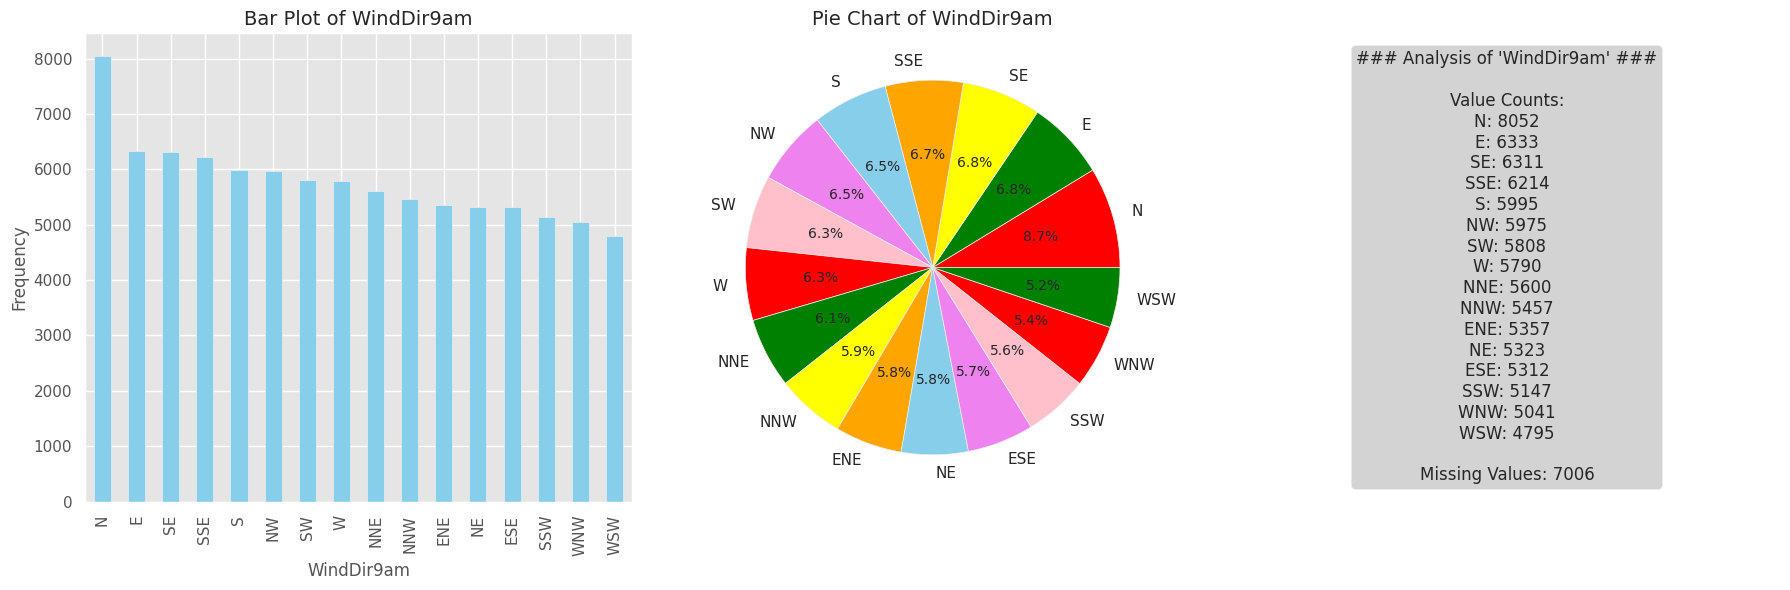

Analyzing: WindDir3pm


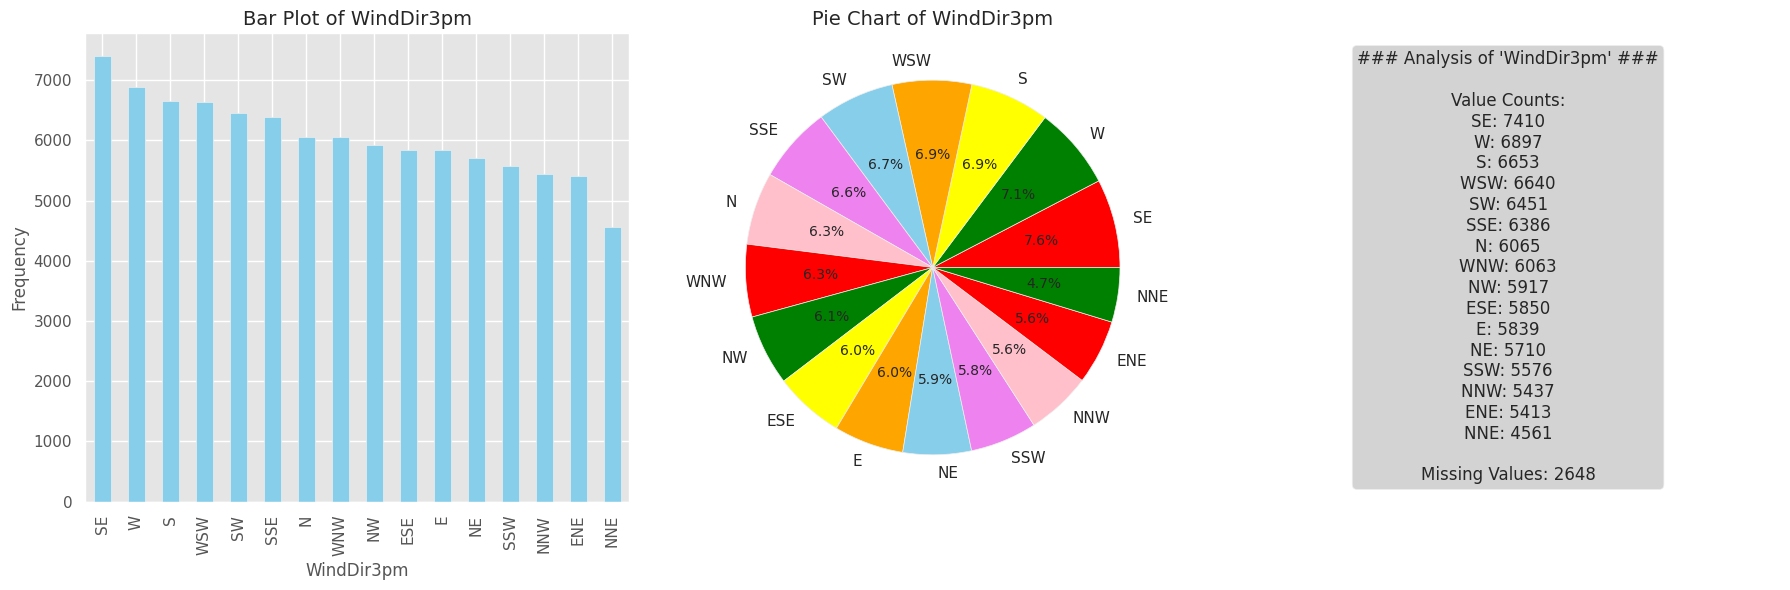

Analyzing: Cloud9am


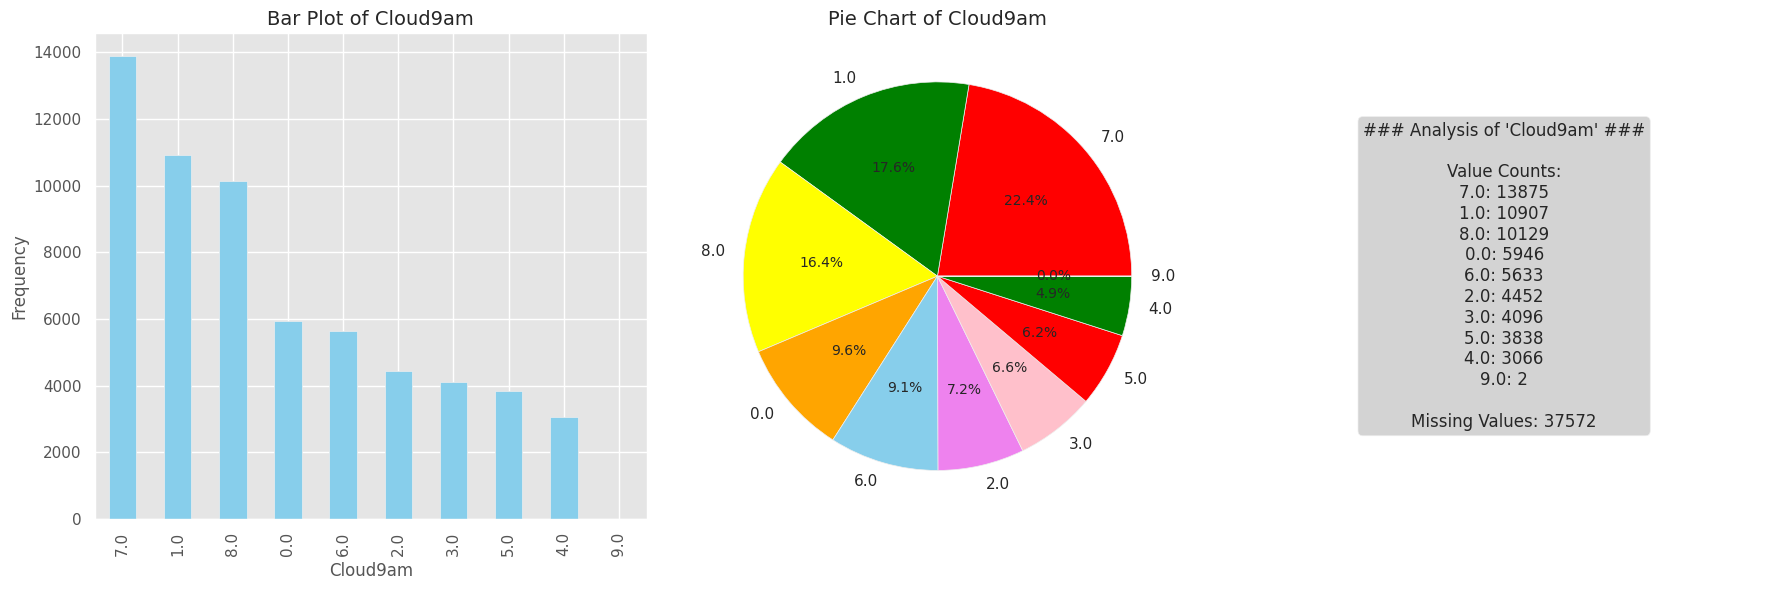

Analyzing: Cloud3pm


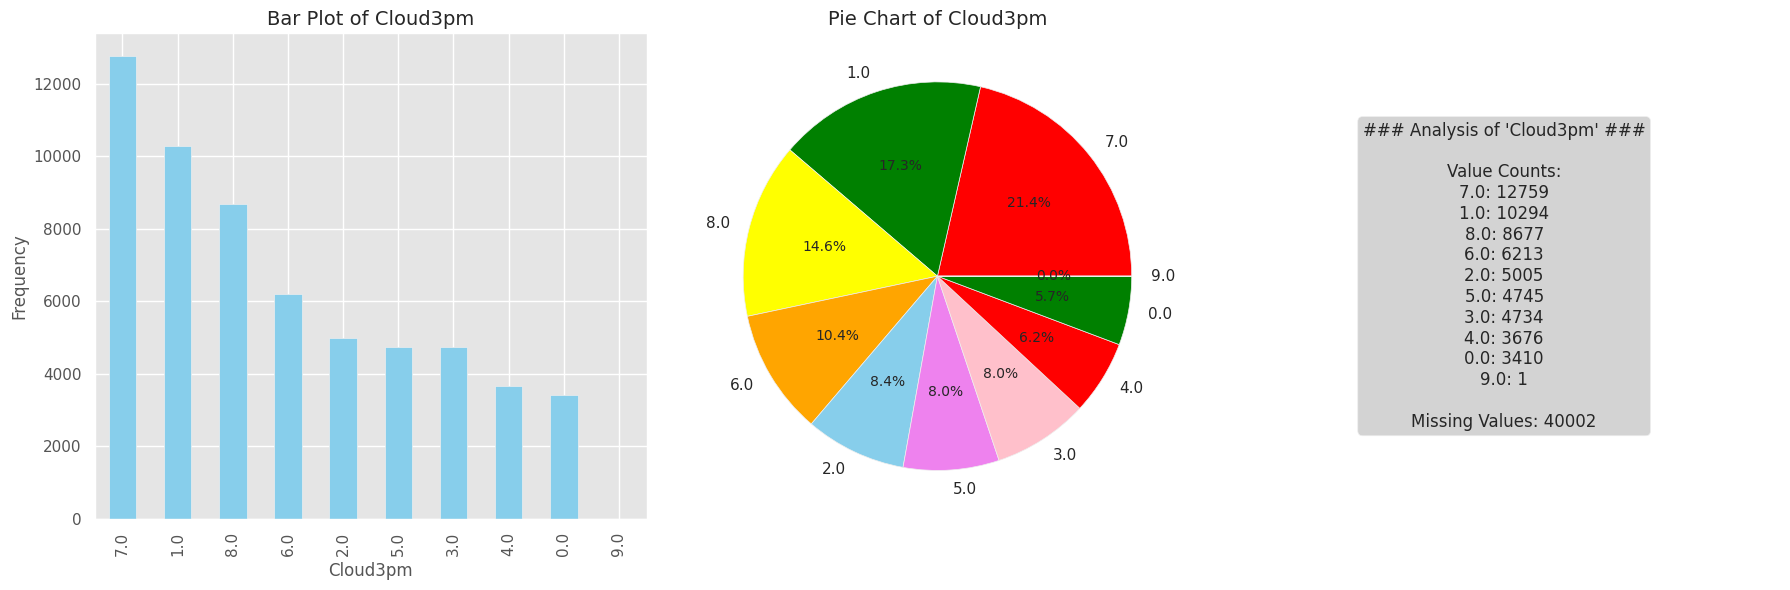

Analyzing: RainTomorrow


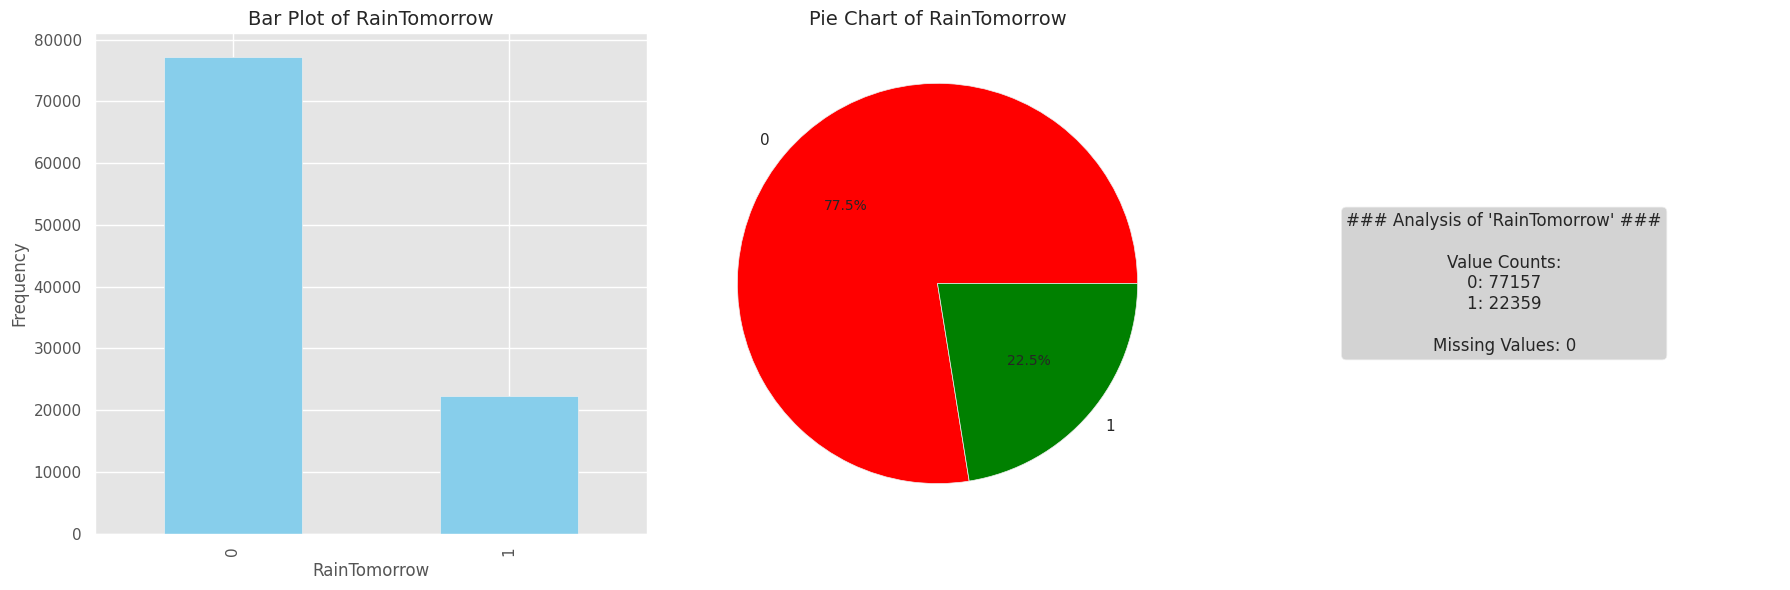

In [ ]:
# Call the function for all categorical features
for feature in categorical_features:
    print(f"Analyzing: {feature}")
    analyze_categorical_variable(training_data, feature)

#### **Bivariate Analysis**


##### **Steps of doing Bivariate Analysis**

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots. Scatterplots are not as much beneficial<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps


##### **First Type: Numerical-Numerical**

**Function For Bivariate Analysis of Numerical-Numerical Combination Of Features**

In [ ]:

def bivariate_analysis_numerical_numerical(df, feature1, feature2):
    """
    Perform bivariate analysis between two numerical features, displaying only
    the scatter plot and the correlation coefficient, with different colors for each feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The column name of the first numerical feature.
        feature2 (str): The column name of the second numerical feature.
    """
    # Calculate correlation coefficient
    correlation_coefficient = df[[feature1, feature2]].corr().iloc[0, 1]

    # Set up a canvas for plotting with a smaller figure size
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Define unique colors for the features
    feature1_color = 'skyblue'
    feature2_color = 'orange'

    # Scatter Plot with Regression Line and Different Colors
    sns.regplot(x=feature1, y=feature2, data=df, ax=axs[0], scatter_kws={'alpha': 0.6, 'color': feature1_color}, line_kws={'color': feature2_color})
    axs[0].set_title(f'Scatterplot with Regression: {feature1} vs {feature2}', fontsize=14)
    axs[0].set_xlabel(feature1, fontsize=12)
    axs[0].set_ylabel(feature2, fontsize=12)

    # Display Correlation Coefficient with different color text
    axs[1].axis('off')  # Turn off the axis
    textstr = f"### Correlation Analysis ###\n\nCorrelation Coefficient: {correlation_coefficient:.2f}"
    axs[1].text(0.5, 0.5, textstr, fontsize=14, ha='center', va='center', bbox=dict(boxstyle="round", facecolor="lightgreen"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:

# Loop through all pairs of numerical features and call the analysis function
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        bivariate_analysis_numerical_numerical(training_data, feature1, feature2)


##### **Second Type: Numerical-Categorical**

**Funtion For Bivariate Analysis of Numerical- Categorical Combination Of Features**

In [ ]:
def bivariate_analysis_numerical_categorical(df, numerical_feature, categorical_feature):
    """
    Perform bivariate analysis between a numerical feature and a categorical feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        numerical_feature (str): The column name of the numerical feature.
        categorical_feature (str): The column name of the categorical feature.
    """
    # Set up a canvas for plotting
    fig, axs = plt.subplots(3, 1, figsize=(14, 16))  # 3 rows, 1 column layout

    # Bar Plot
    sns.barplot(x=categorical_feature, y=numerical_feature, data=df, ax=axs[0], ci=None, palette='Set2')
    axs[0].set_title(f'Bar Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[0].set_xlabel(categorical_feature, fontsize=12)
    axs[0].set_ylabel(numerical_feature, fontsize=12)

    # Box Plot
    sns.boxplot(x=categorical_feature, y=numerical_feature, data=df, ax=axs[1], palette='Set3')
    axs[1].set_title(f'Box Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[1].set_xlabel(categorical_feature, fontsize=12)
    axs[1].set_ylabel(numerical_feature, fontsize=12)

    # KDE Plot
    for category in df[categorical_feature].dropna().unique():
        subset = df[df[categorical_feature] == category]
        sns.kdeplot(subset[numerical_feature], ax=axs[2], label=str(category), fill=True)
    axs[2].set_title(f'KDE Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[2].set_xlabel(numerical_feature, fontsize=12)
    axs[2].set_ylabel('Density', fontsize=12)
    axs[2].legend(title=categorical_feature)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:
# Perform bivariate analysis for each combination of numerical and categorical features
for num_feature in numerical_features:
    for cat_feature in categorical_features:
        print(f"Analyzing: {num_feature} vs {cat_feature}")
        bivariate_analysis_numerical_categorical(training_data, num_feature, cat_feature)

##### **Third Type: CAtegorical-Categorical**

**Funtion For Bivariate Analysis of
categorical - Categorical Combination Of Features**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bivariate_analysis_categorical_categorical(df, categorical_feature1, categorical_feature2):
    """
    Perform bivariate analysis between two categorical features.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        categorical_feature1 (str): The column name of the first categorical feature.
        categorical_feature2 (str): The column name of the second categorical feature.
    """
    # Set up a canvas for plotting
    fig, axs = plt.subplots(2, 1, figsize=(14, 12))  # 2 rows, 1 column layout

    # Count Plot
    sns.countplot(x=categorical_feature1, hue=categorical_feature2, data=df, ax=axs[0], palette='Set2')
    axs[0].set_title(f'Count Plot: {categorical_feature1} by {categorical_feature2}', fontsize=14)
    axs[0].set_xlabel(categorical_feature1, fontsize=12)
    axs[0].set_ylabel('Count', fontsize=12)

    # Heatmap of Cross-Tabulation
    cross_tab = pd.crosstab(df[categorical_feature1], df[categorical_feature2])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', ax=axs[1], cbar=False)
    axs[1].set_title(f'Heatmap: {categorical_feature1} vs {categorical_feature2}', fontsize=14)
    axs[1].set_xlabel(categorical_feature2, fontsize=12)
    axs[1].set_ylabel(categorical_feature1, fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        bivariate_analysis_categorical_categorical(training_data, feature1, feature2)

# **4. Exploratory Data Analysis (EDA) On Testing Data**

In [ ]:
# List of numerical features
# Numerical features
numerical_features = [
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am",
    "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"
]

# Categorical features
categorical_features = [
    "RainToday", "Location", "WindGustDir", "WindDir9am",
    "WindDir3pm", "Cloud9am", "Cloud3pm"
]


####**Univariate Analysis**

Univariate analysis focuses on analyzing each feature in the dataset independently.



*   **Distribution analysis:** The distribution of each feature is examined to identify its shape, central tendency, and dispersion
*   **Identifying potential issues:** Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values



##### **Steps of doing Univariate Analysis on Numerical columns**

**Descriptive Statistics:** Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations:** Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

**Data Imbalances**

**Identifying Outliers:** Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

##### **Numerical Variables**

**Automation Function for Univariate Analysis Of Numerical Features**

In [ ]:
def analyze_numerical_feature(df, feature):
    # Statistical summary and skewness
    stats = df[feature].describe()
    skewness = df[feature].skew()
    missing_values = df[feature].isnull().sum()  # Calculate missing values

    # Set up a canvas for plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram
    axs[0, 0].hist(df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')  # Exclude missing values
    axs[0, 0].set_title(f'Histogram of {feature}')
    axs[0, 0].set_xlabel(feature)
    axs[0, 0].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(df[feature].dropna(), ax=axs[0, 1], color='purple', fill=True)  # Exclude missing values
    axs[0, 1].set_title(f'KDE Plot of {feature}')
    axs[0, 1].set_xlabel(feature)
    axs[0, 1].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=df[feature], ax=axs[1, 0], color='lightgreen')
    axs[1, 0].set_title(f'Boxplot of {feature}')
    axs[1, 0].set_xlabel(feature)

    # Key Metrics
    axs[1, 1].axis('off')  # Turn off the axis
    textstr = (
        f"### Key Metrics ###\n\n"
        f"{stats.to_string()}\n\n"
        f"Skewness: {skewness:.2f}\n"
        f"Missing Values: {missing_values}"
    )
    axs[1, 1].text(
        0.5, 0.5, textstr, fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle="round", facecolor="lightgrey")
    )

    # Adjust layout
    plt.tight_layout()
    plt.show()


Analyzing: MinTemp


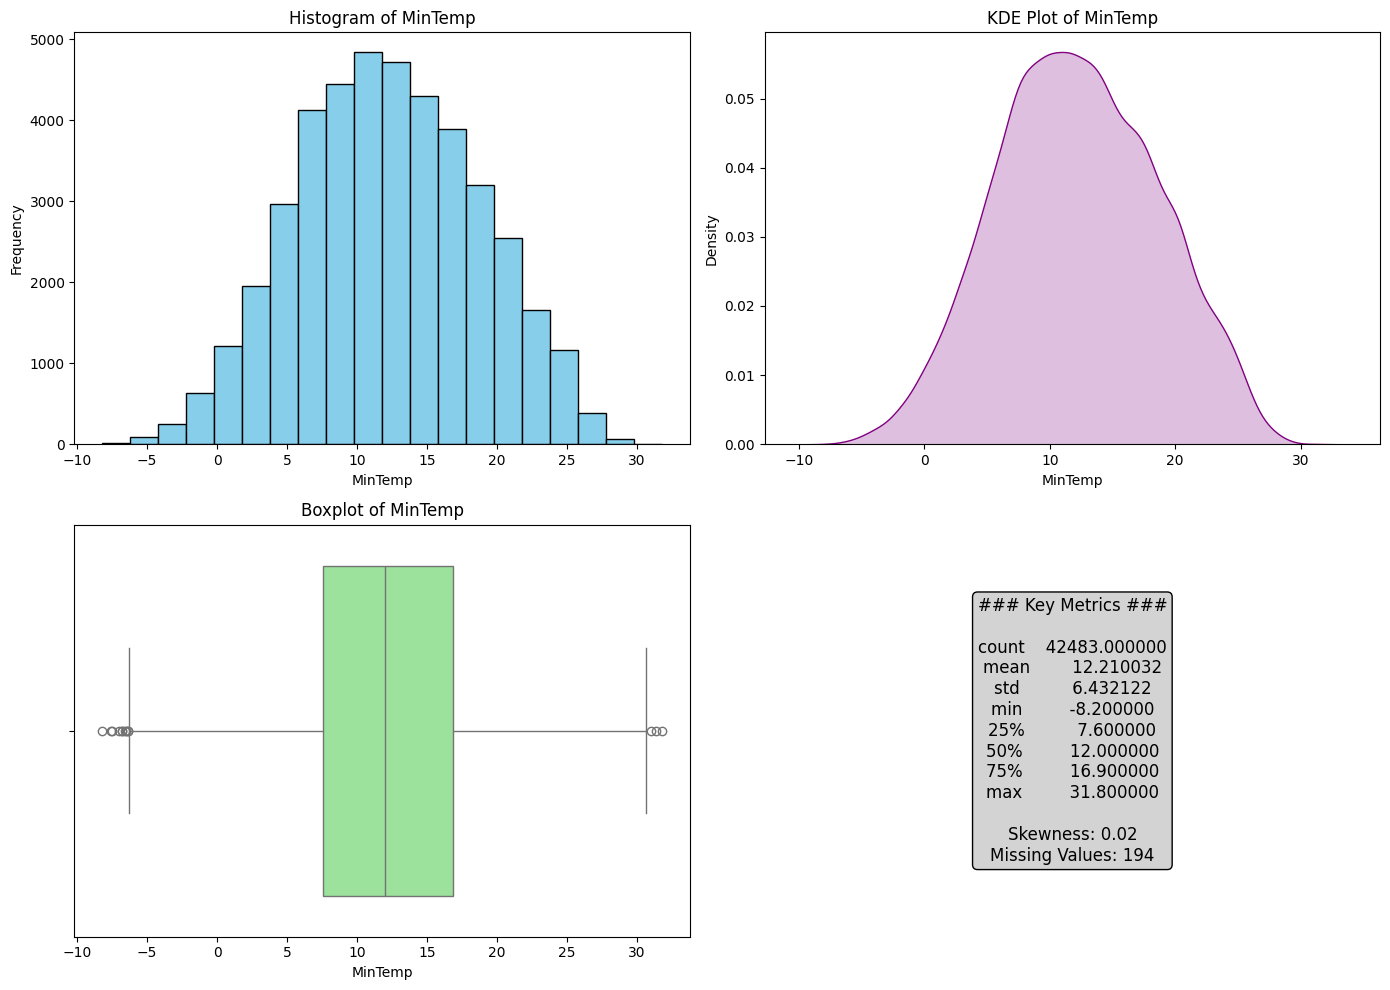

Analyzing: MaxTemp


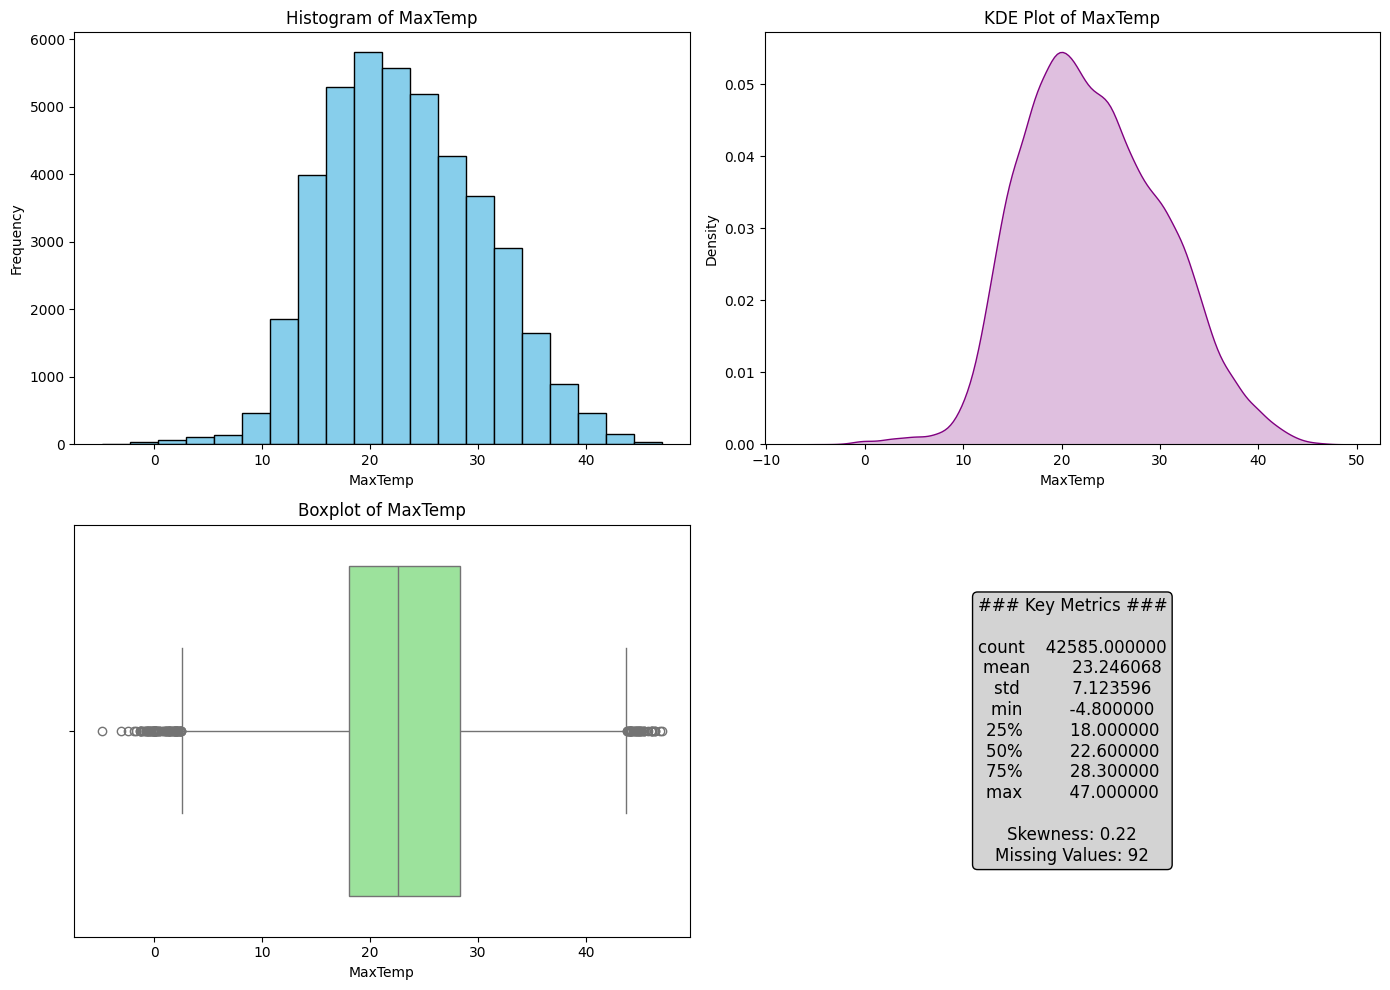

Analyzing: Rainfall


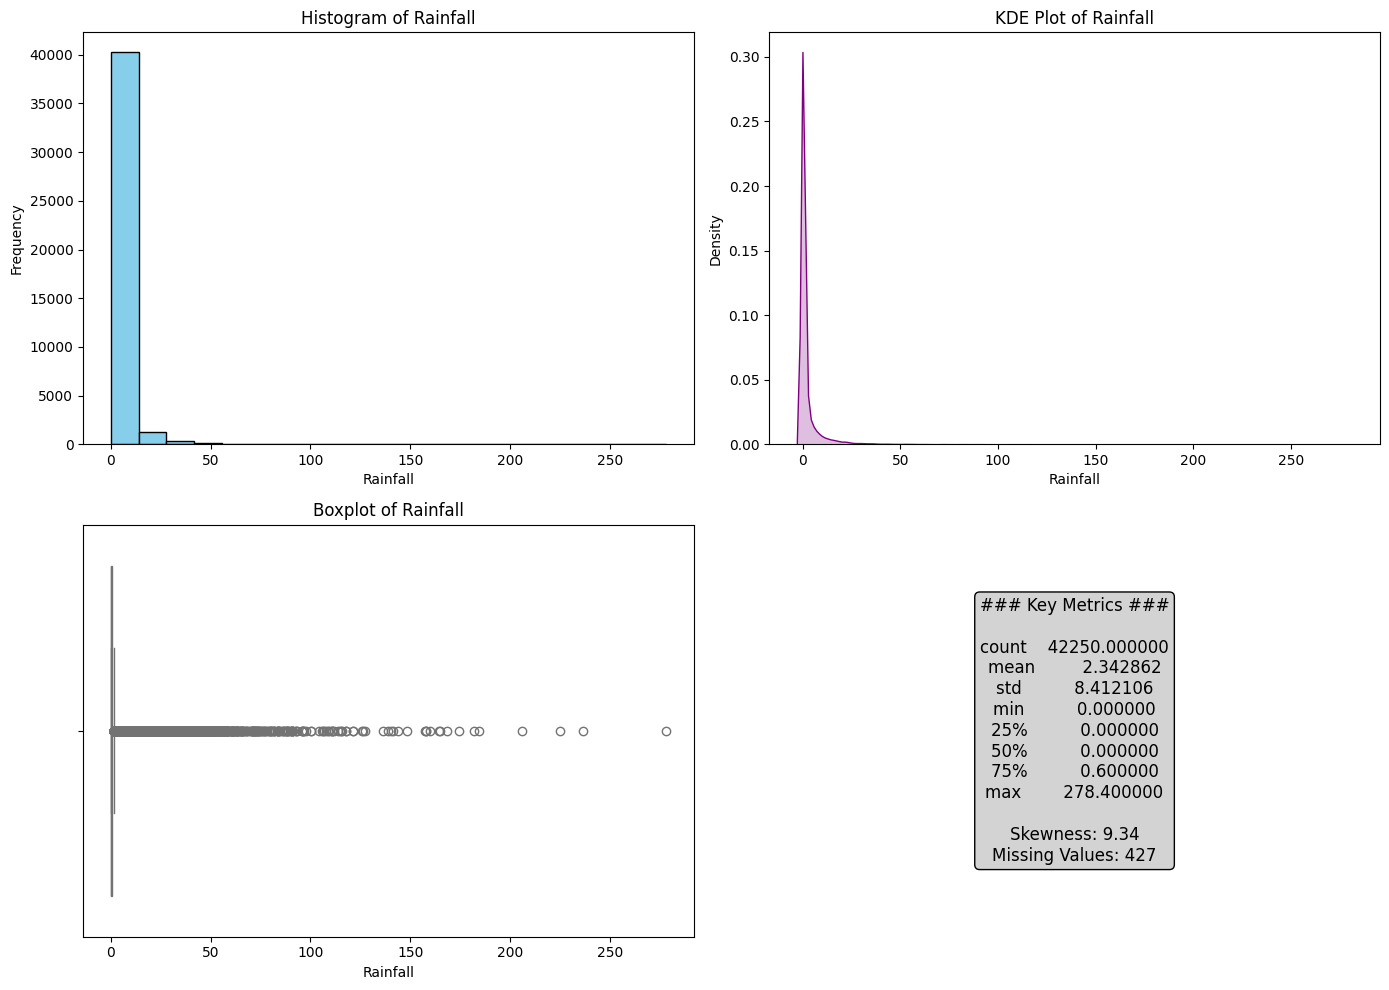

Analyzing: Evaporation


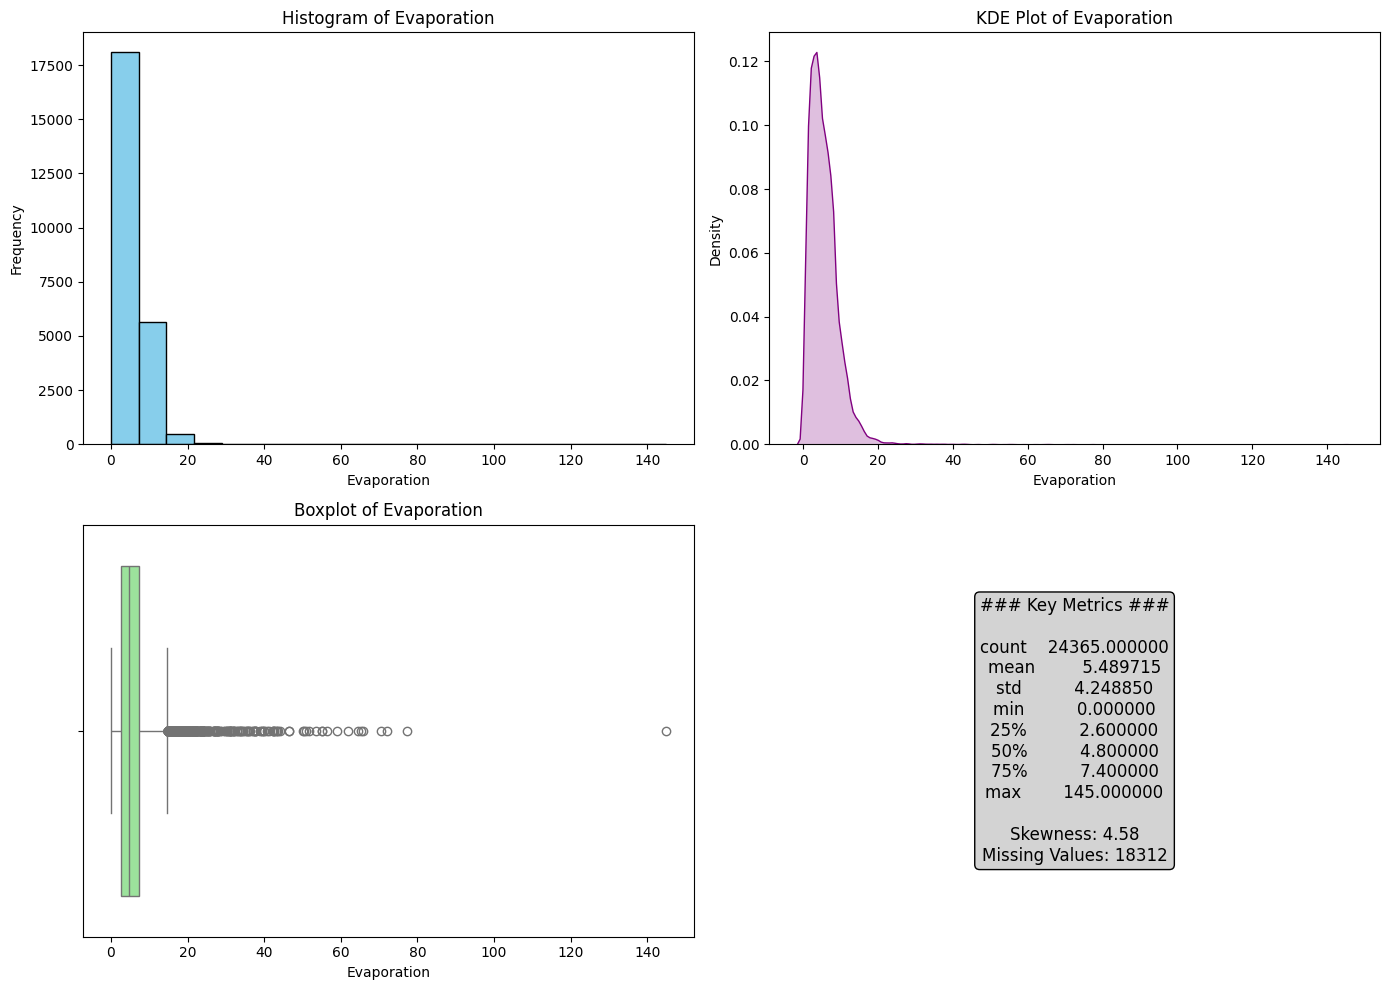

Analyzing: Sunshine


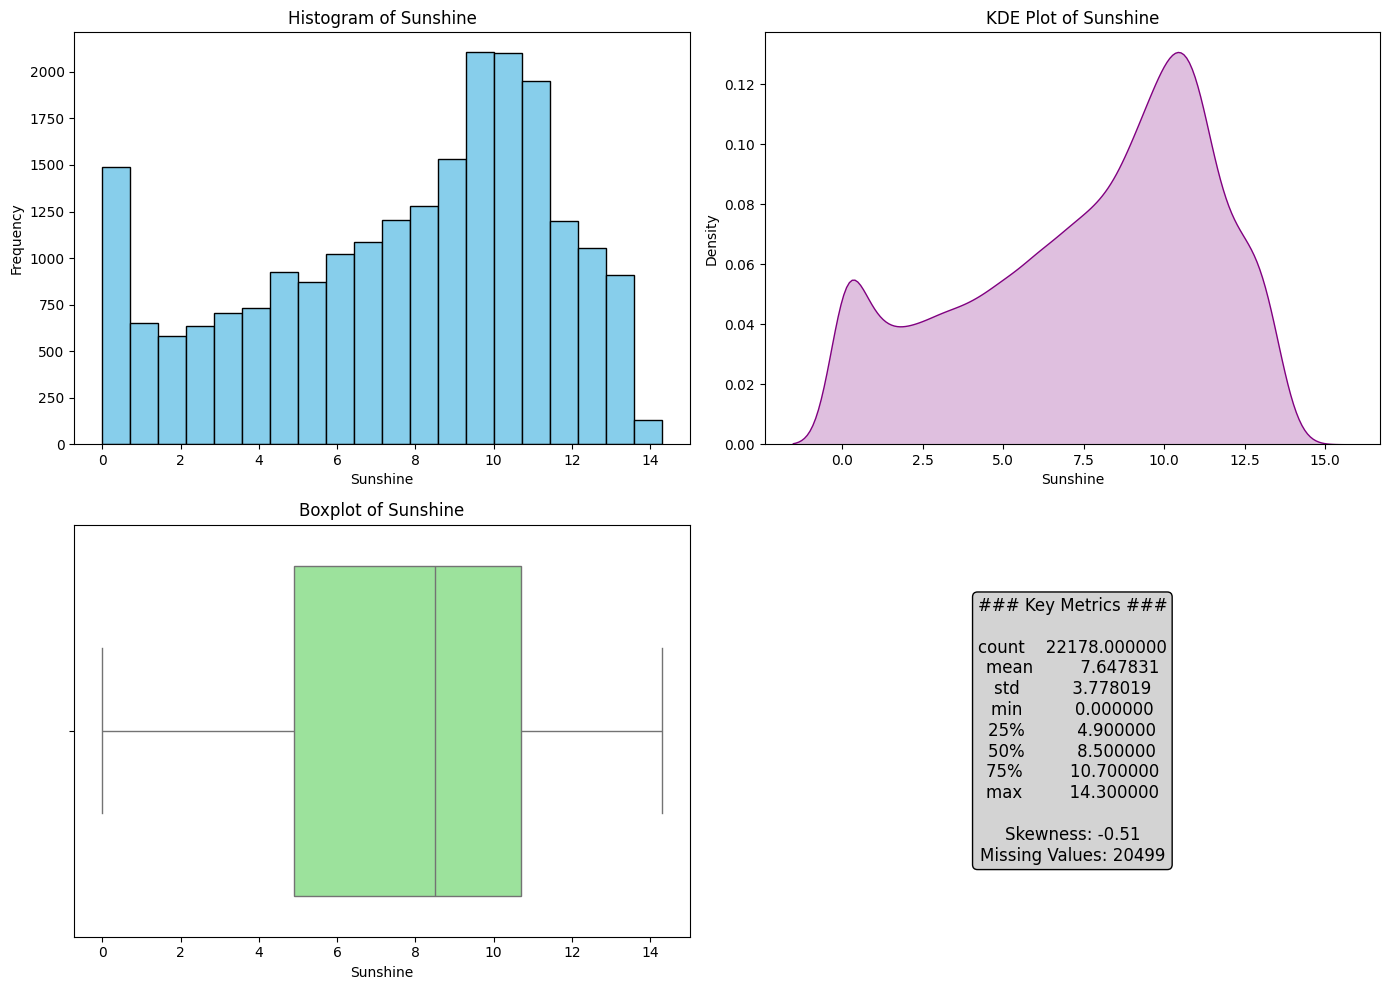

Analyzing: WindGustSpeed


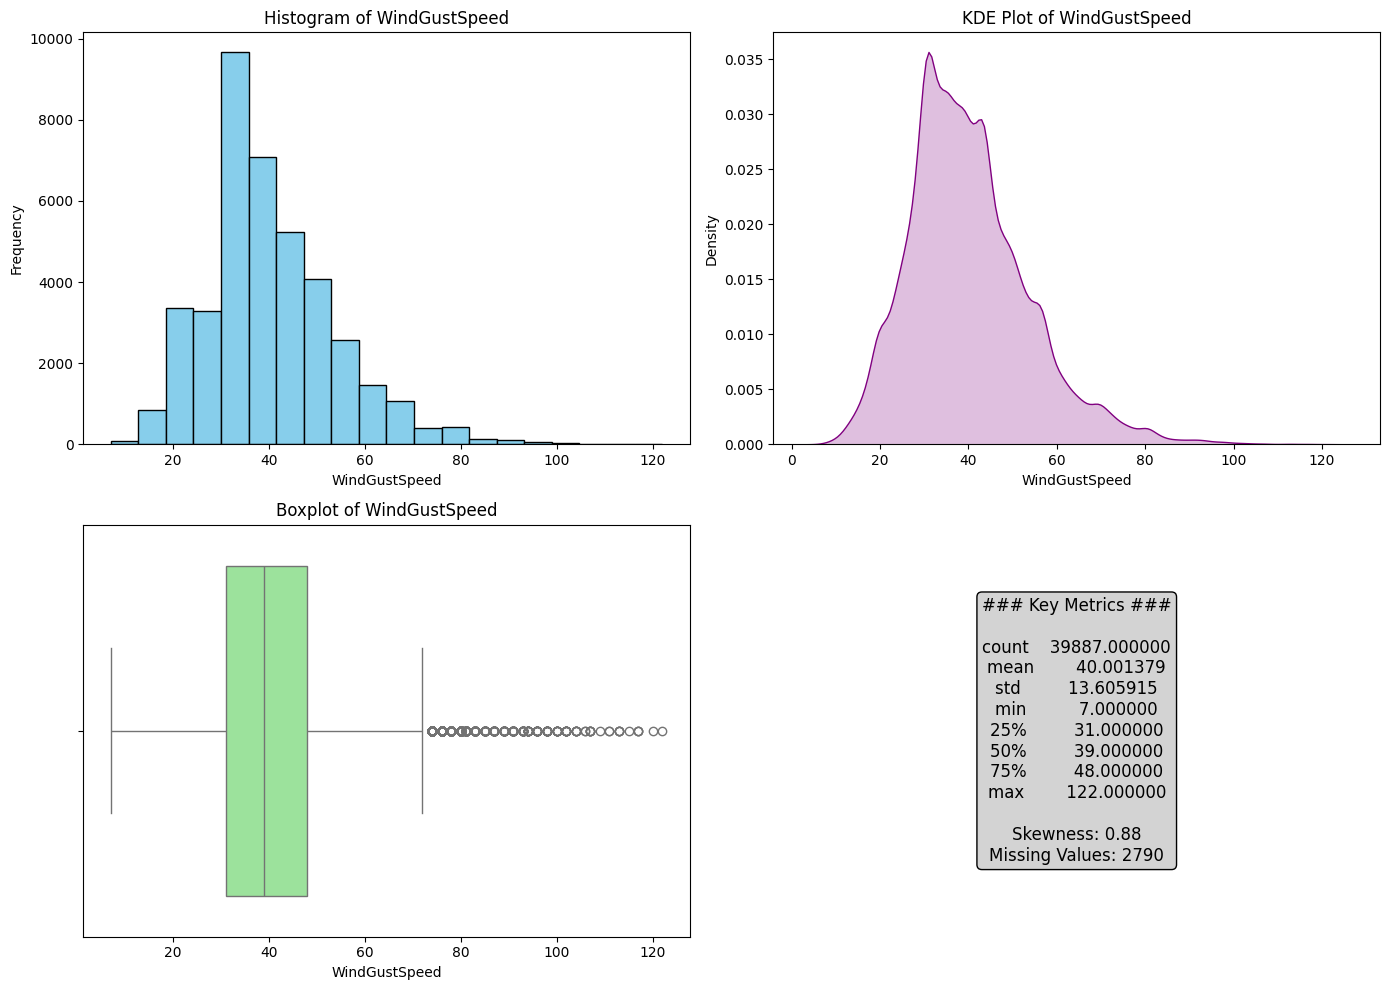

Analyzing: WindSpeed9am


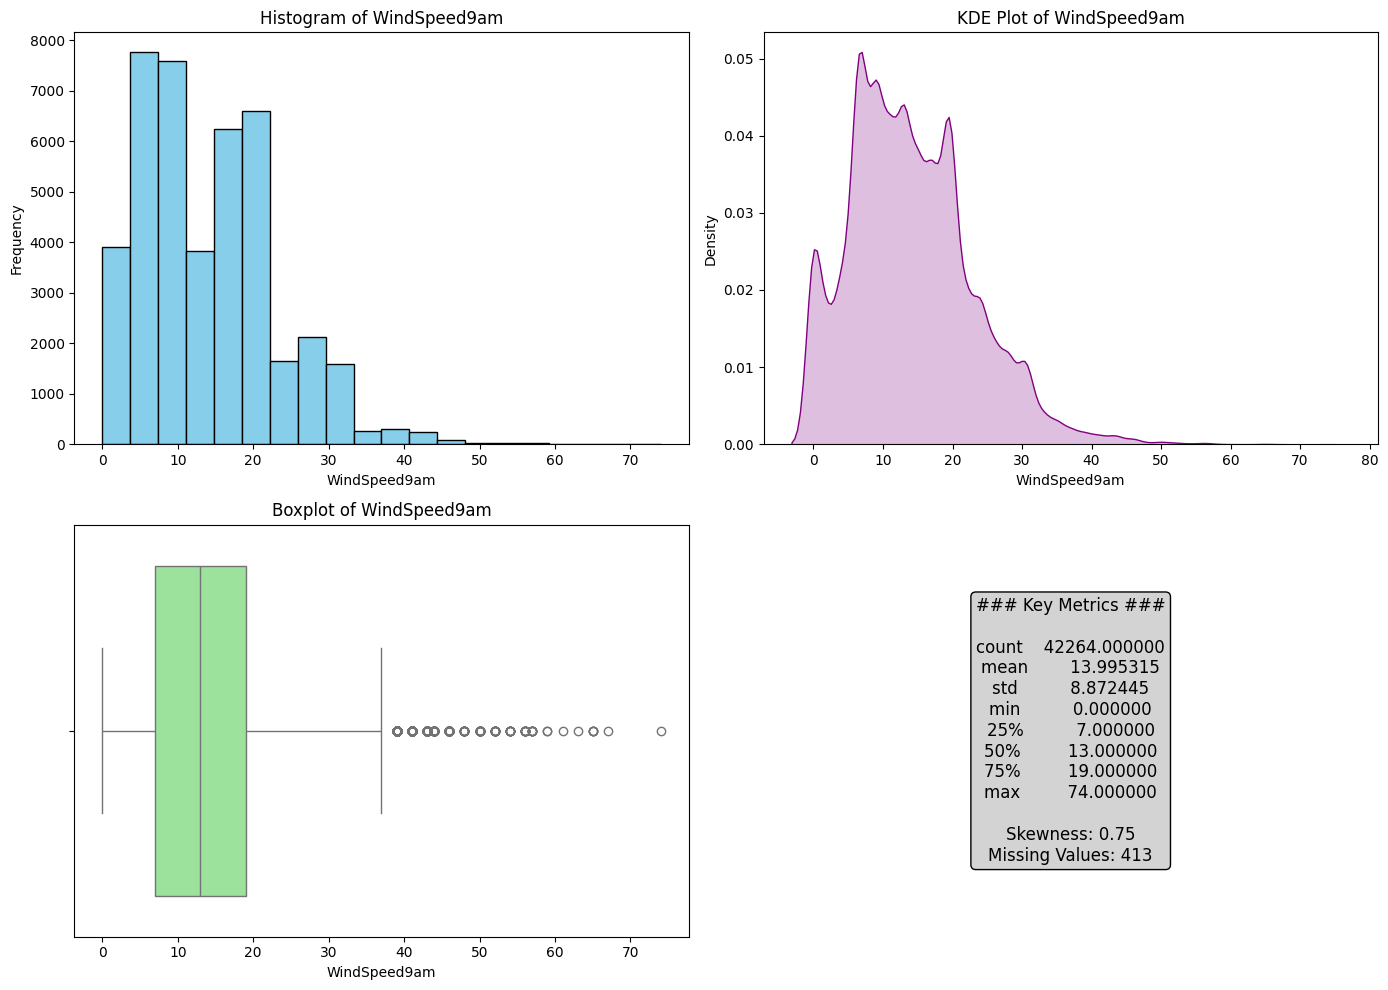

Analyzing: WindSpeed3pm


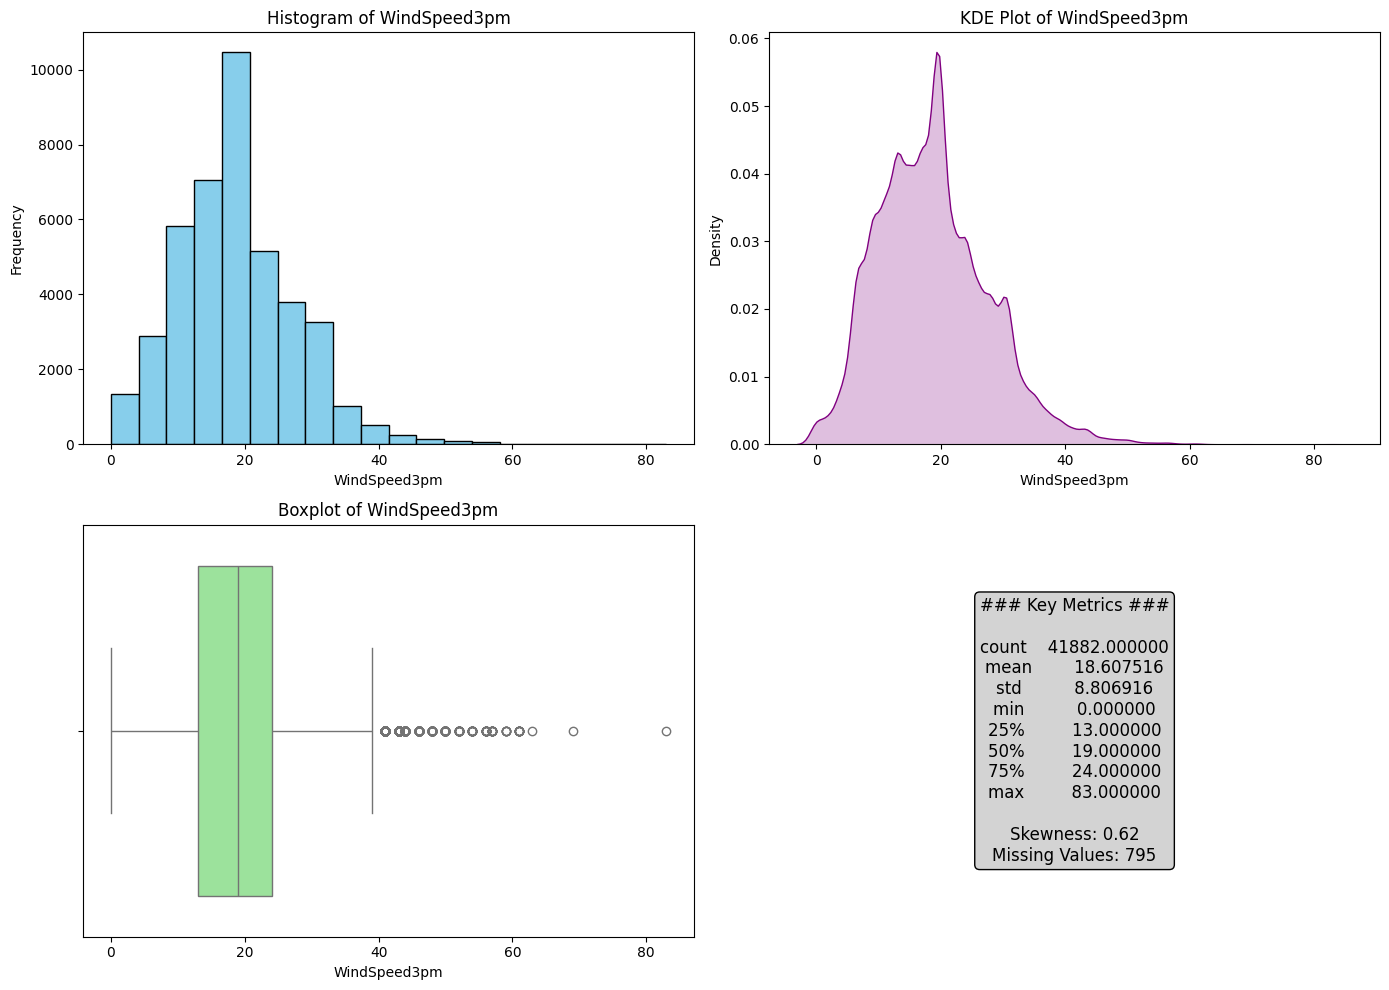

Analyzing: Humidity9am


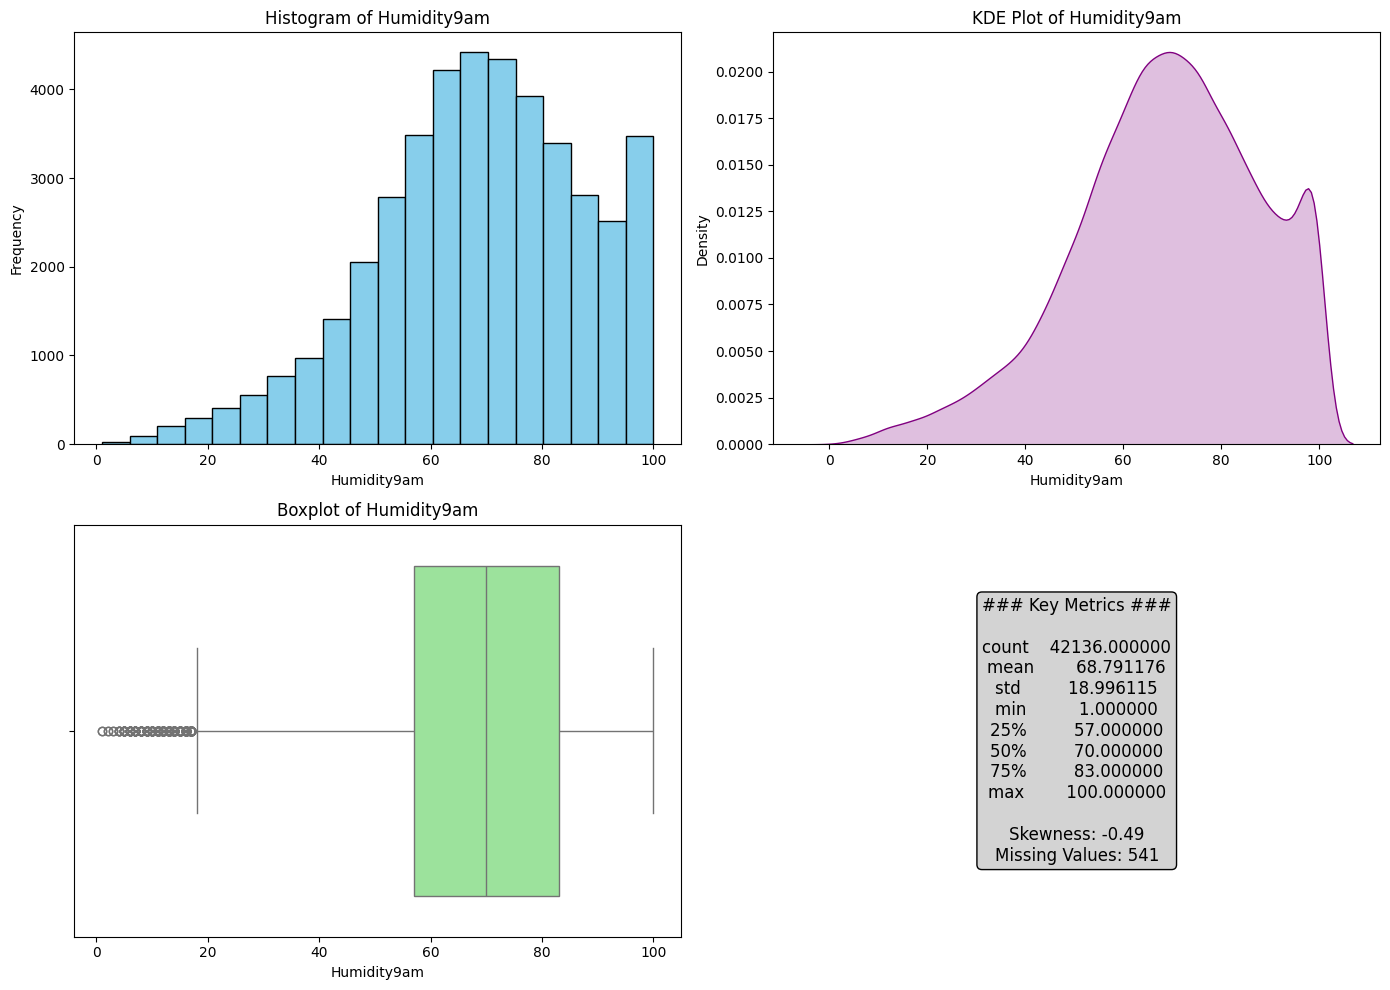

Analyzing: Humidity3pm


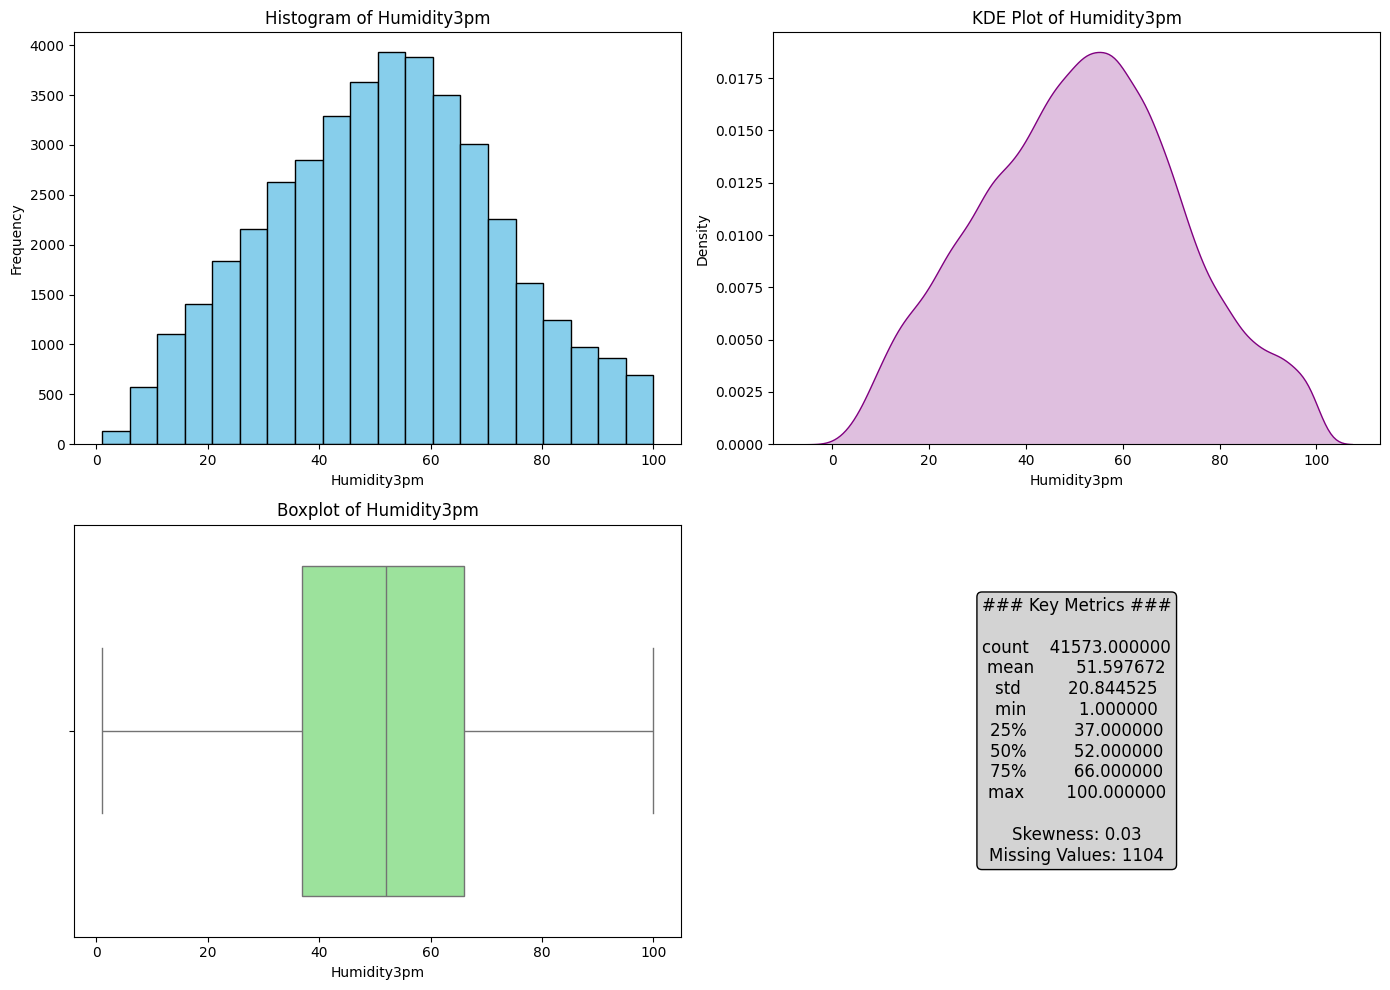

Analyzing: Pressure9am


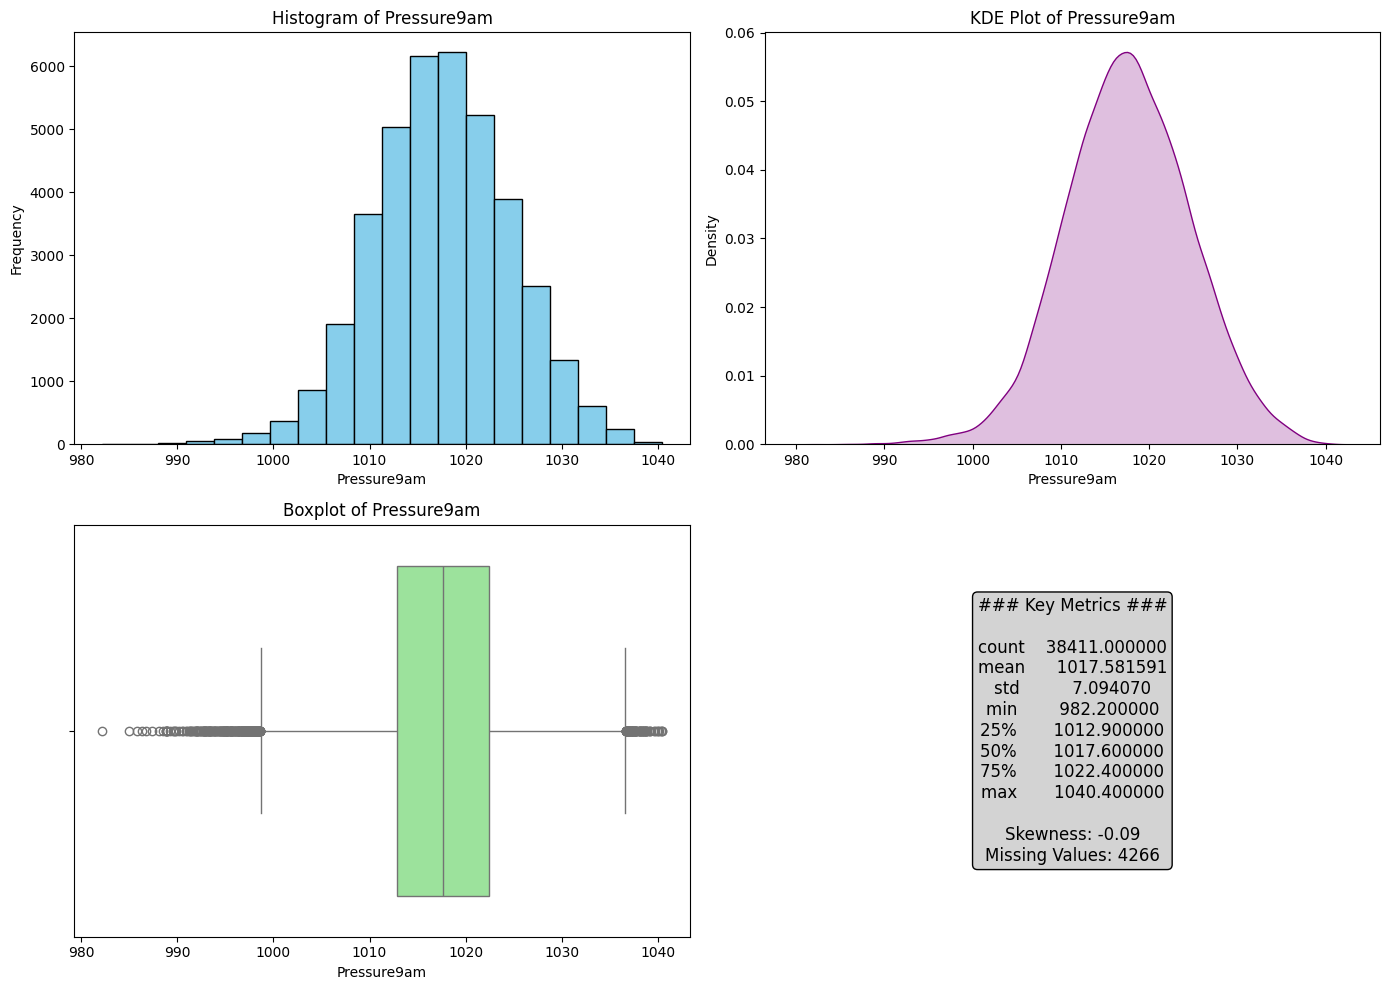

Analyzing: Pressure3pm


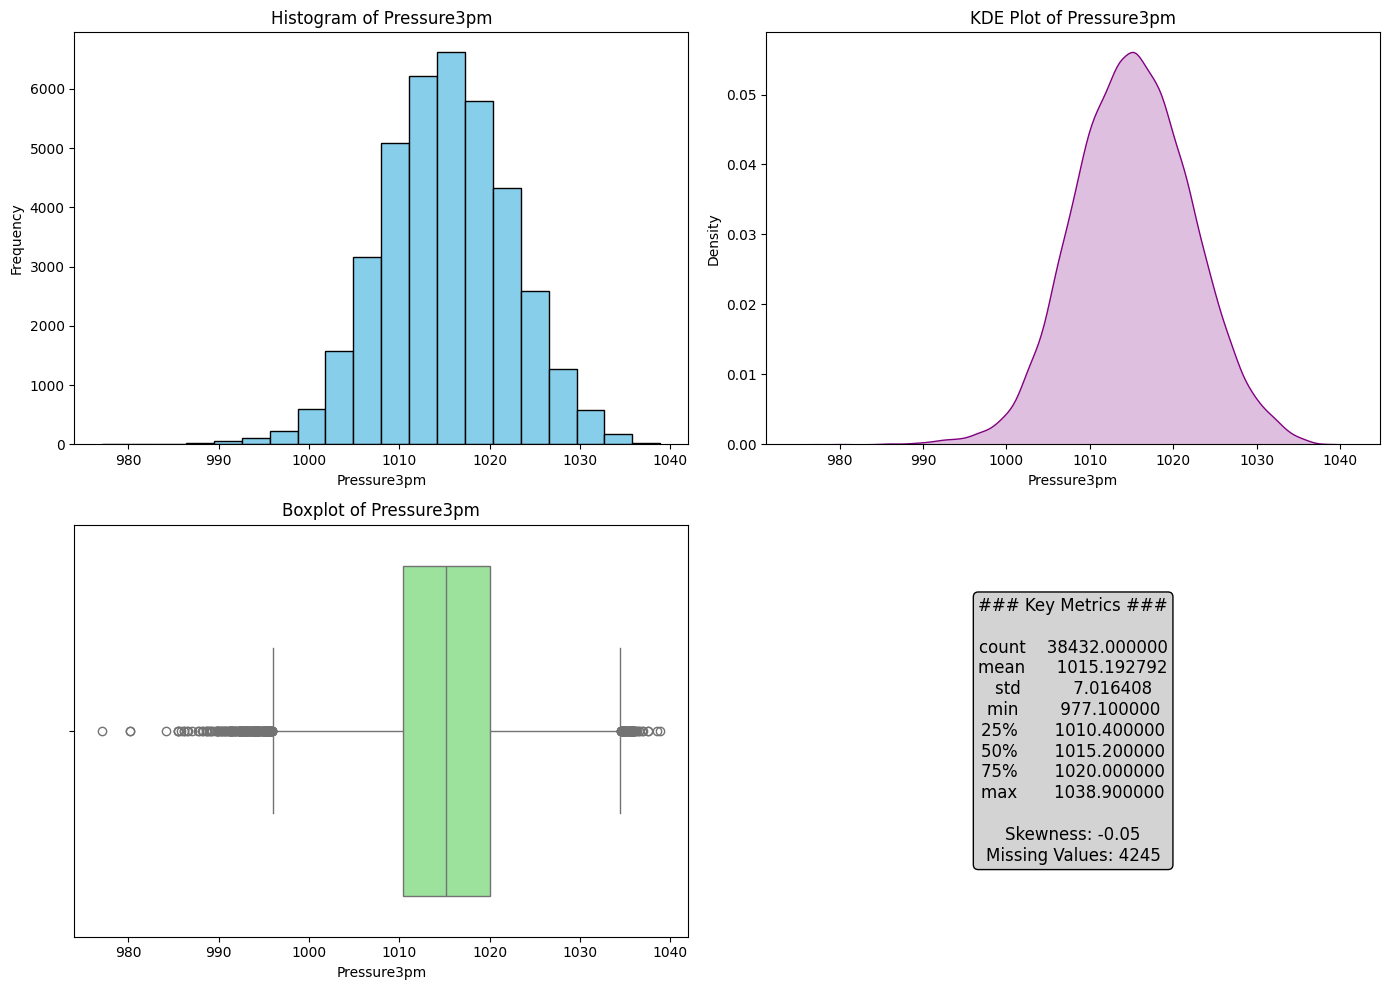

Analyzing: Temp9am


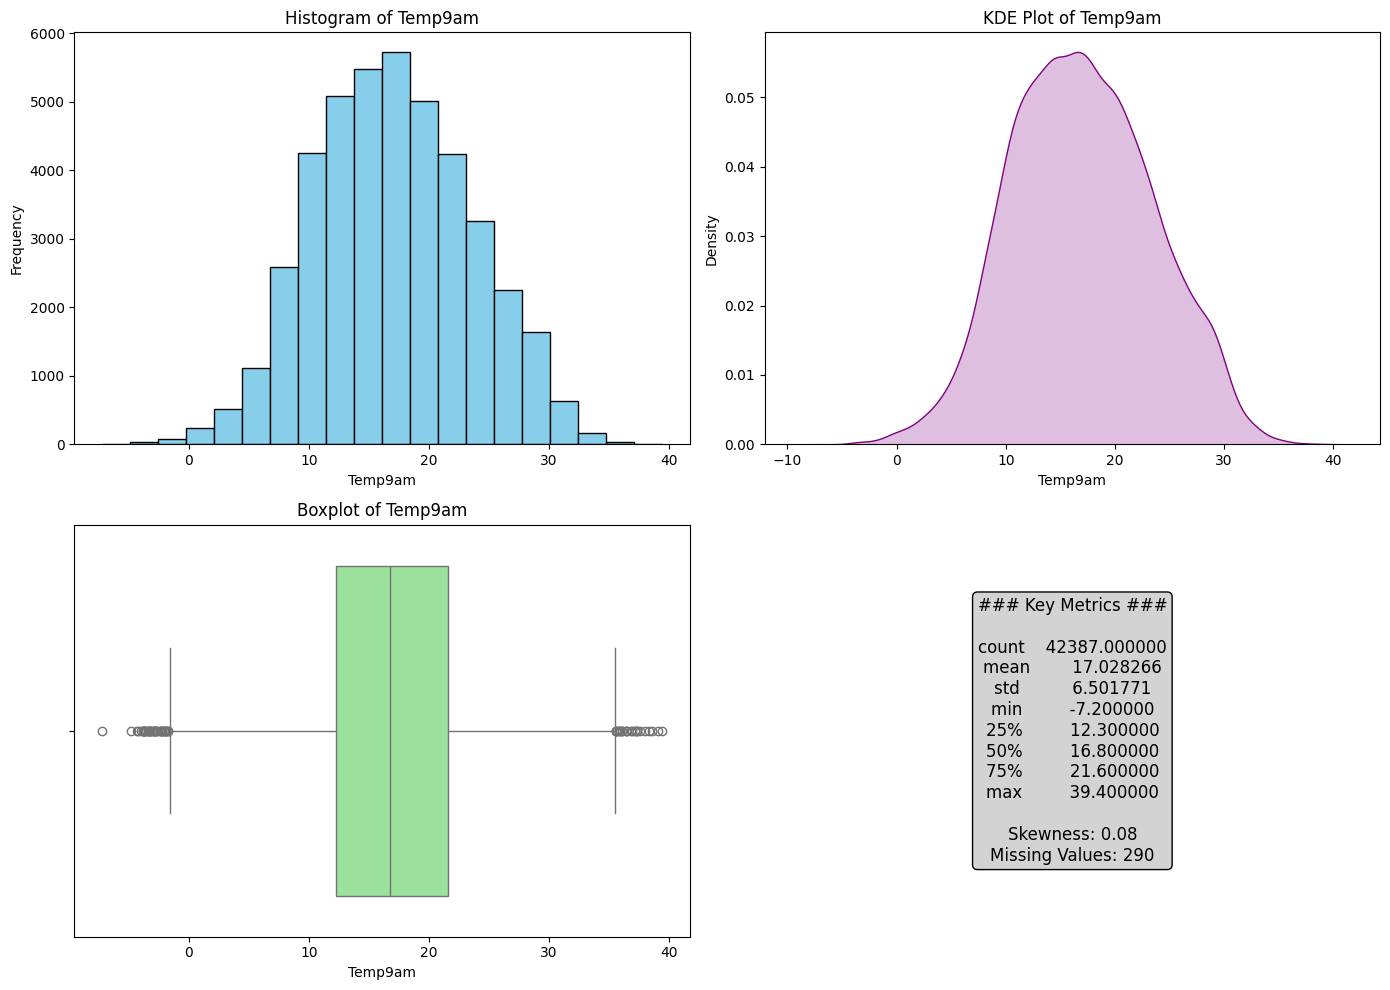

Analyzing: Temp3pm


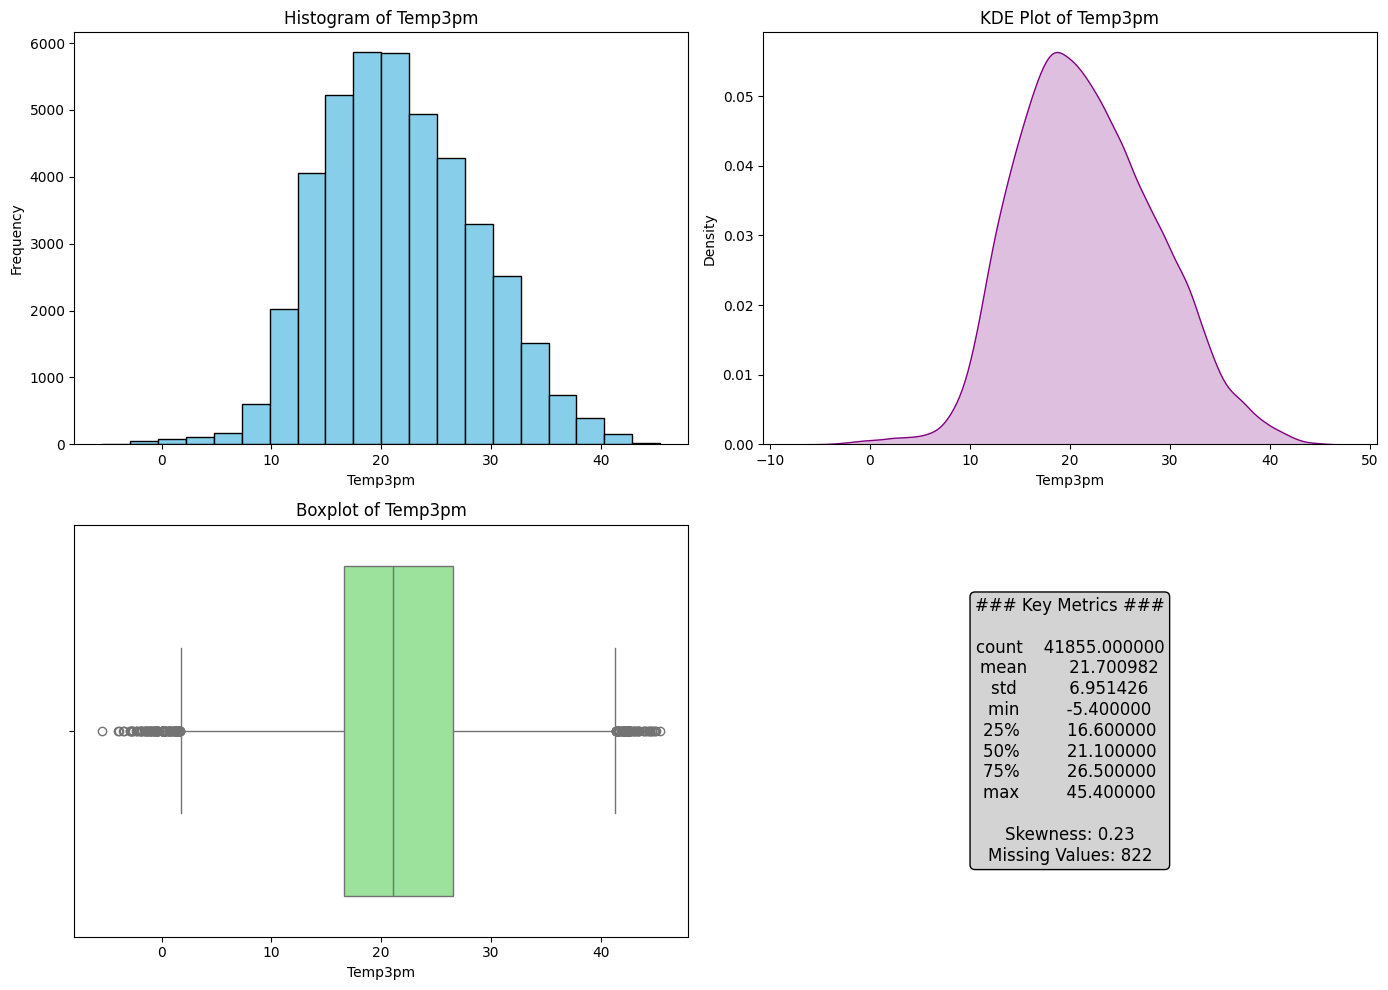

In [ ]:
# Call the function for all numerical features
for feature in numerical_features:
    print(f"Analyzing: {feature}")
    analyze_numerical_feature(testing_data, feature)

##### **Categorical Variables**

**Automation Function for Univariate Analysis Of Categorical Features**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_categorical_variable(df, column):
    """
    Perform univariate analysis for a categorical variable in a presentable manner.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name of the categorical variable to analyze.
    """
    # Value counts
    value_counts = df[column].value_counts()
    missing_values = df[column].isnull().sum()

    # Set up subplots for bar and pie charts
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Bar Plot
    value_counts.plot(kind='bar', color='skyblue', ax=axs[0])
    axs[0].set_title(f'Bar Plot of {column}', fontsize=14)
    axs[0].set_xlabel(column, fontsize=12)
    axs[0].set_ylabel('Frequency', fontsize=12)

    # Pie Chart
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'yellow', 'orange', 'skyblue', 'violet', 'pink'], ax=axs[1])
    axs[1].set_title(f'Pie Chart of {column}', fontsize=14)
    axs[1].set_ylabel('')  # Remove y-label for the pie chart

    # Summary Box
    axs[2].axis('off')  # Turn off the axis
    summary_text = f"### Analysis of '{column}' ###\n\n"
    summary_text += "Value Counts:\n"
    summary_text += "\n".join([f"{index}: {value}" for index, value in value_counts.items()])
    summary_text += f"\n\nMissing Values: {missing_values}"
    axs[2].text(0.5, 0.5, summary_text, fontsize=12, ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor="lightgrey"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


Analyzing: RainToday


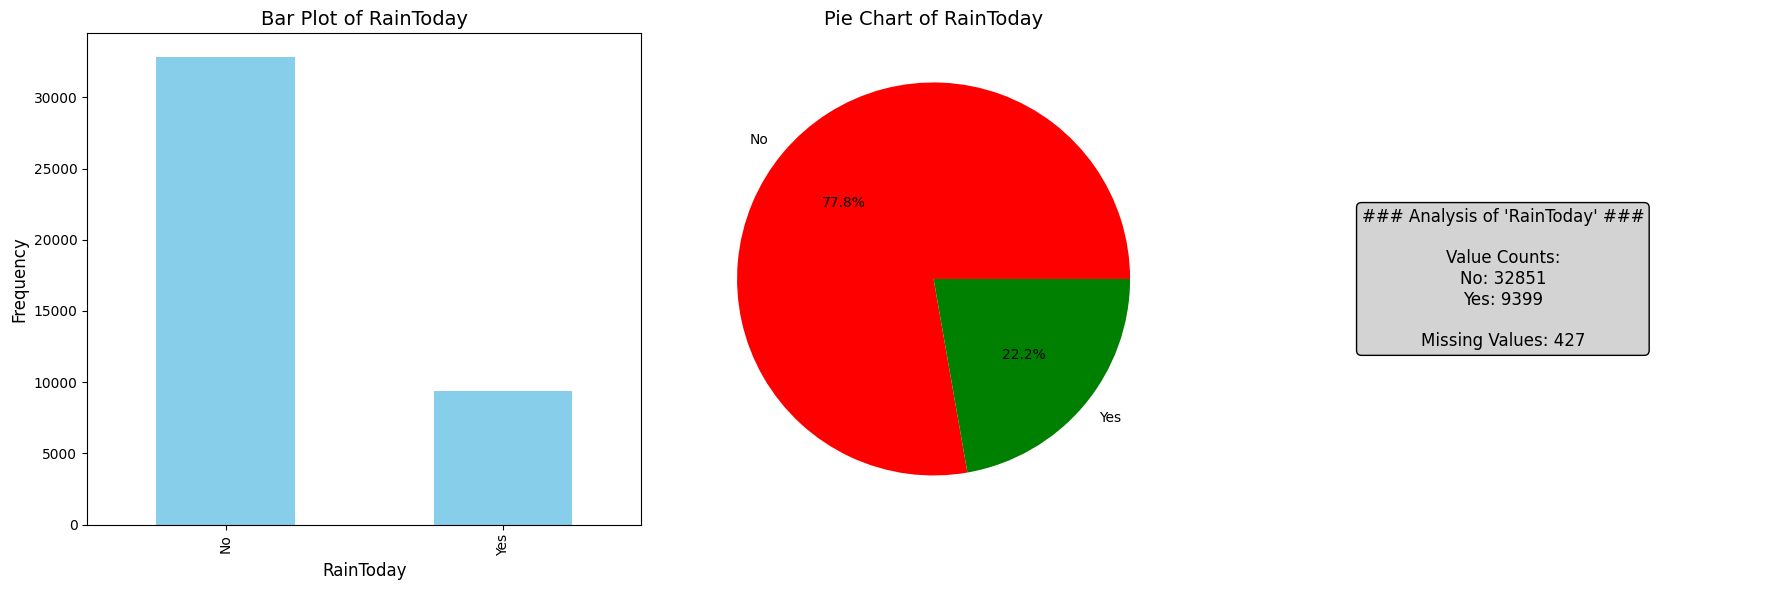

Analyzing: Location


<ipython-input-16-79e037a3f067>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


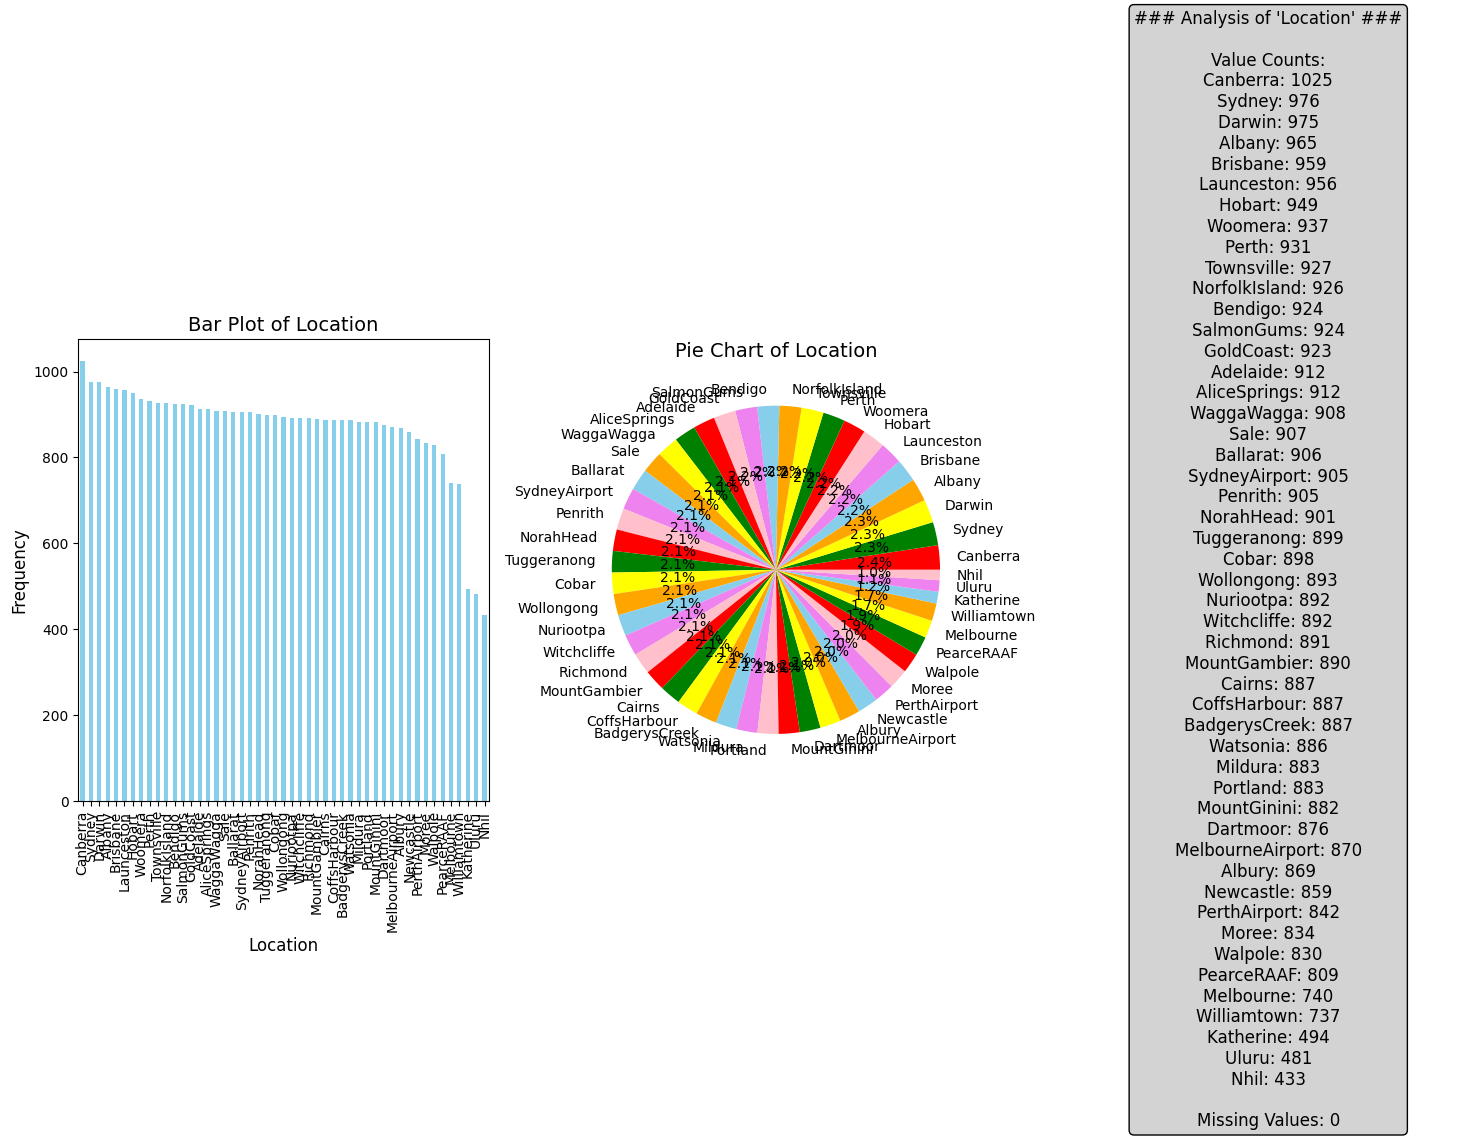

Analyzing: WindGustDir


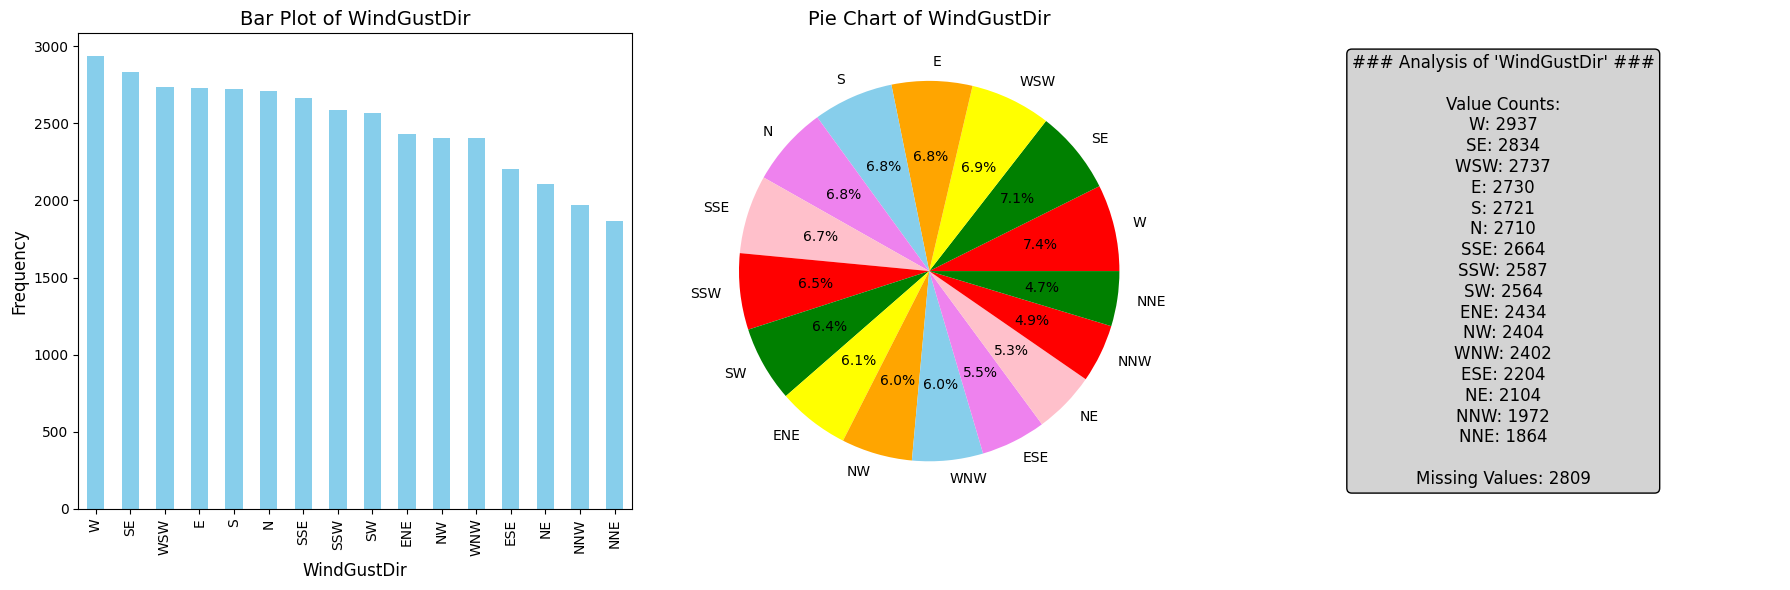

Analyzing: WindDir9am


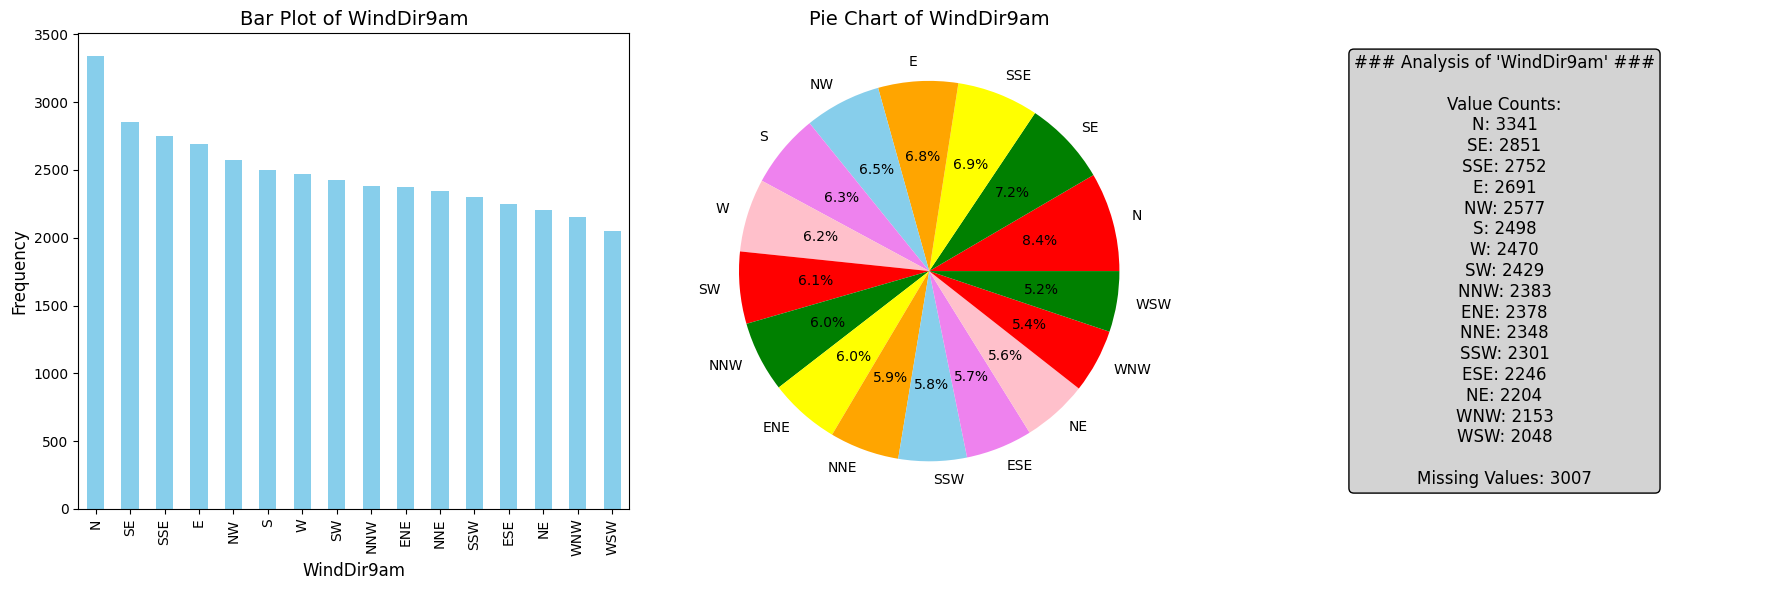

Analyzing: WindDir3pm


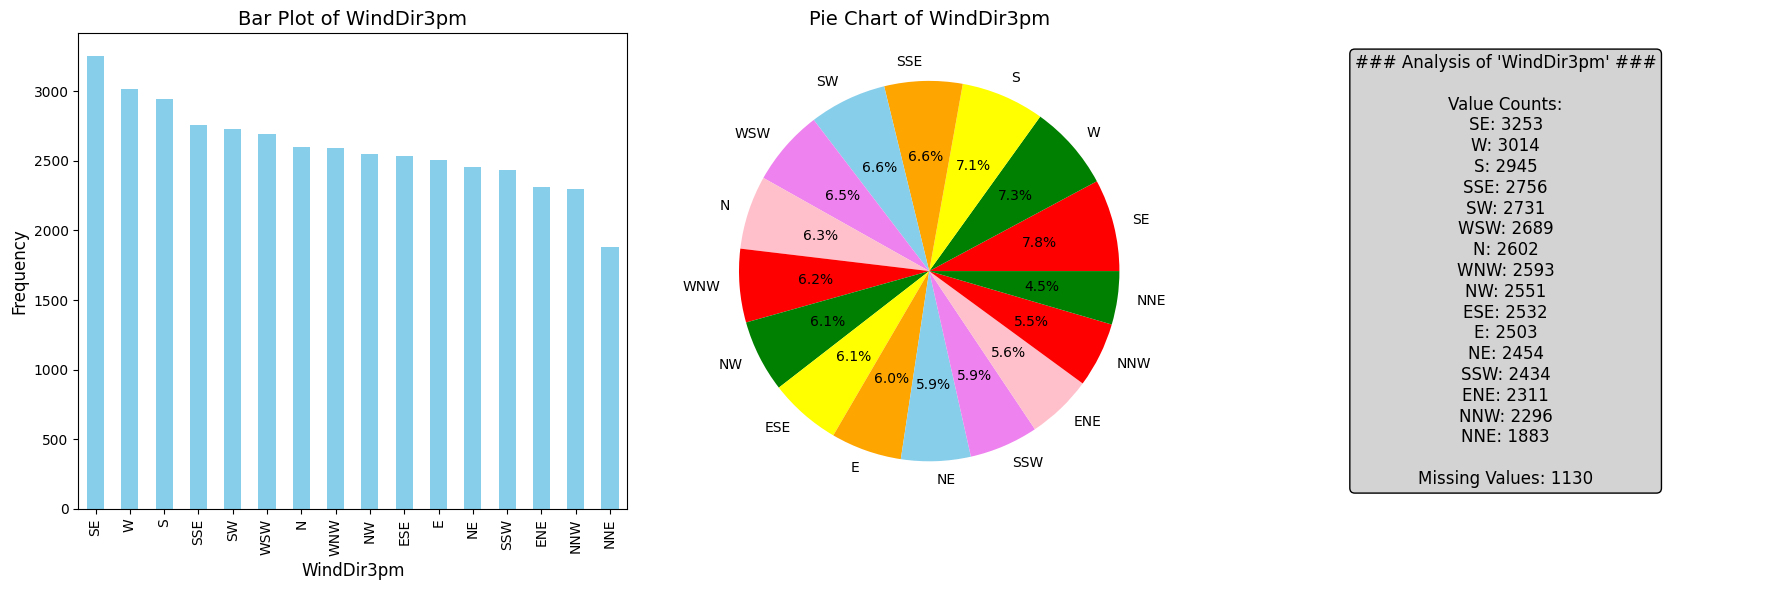

Analyzing: Cloud9am


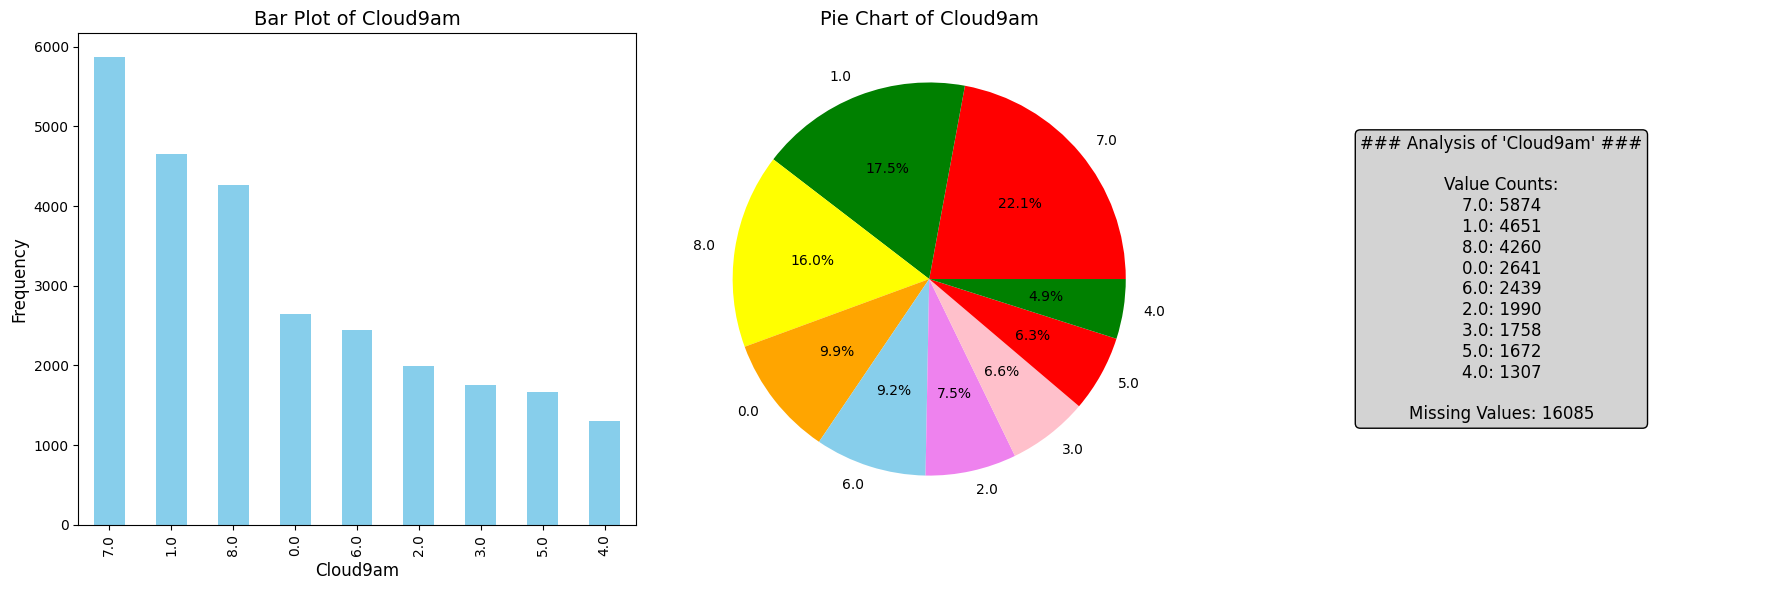

Analyzing: Cloud3pm


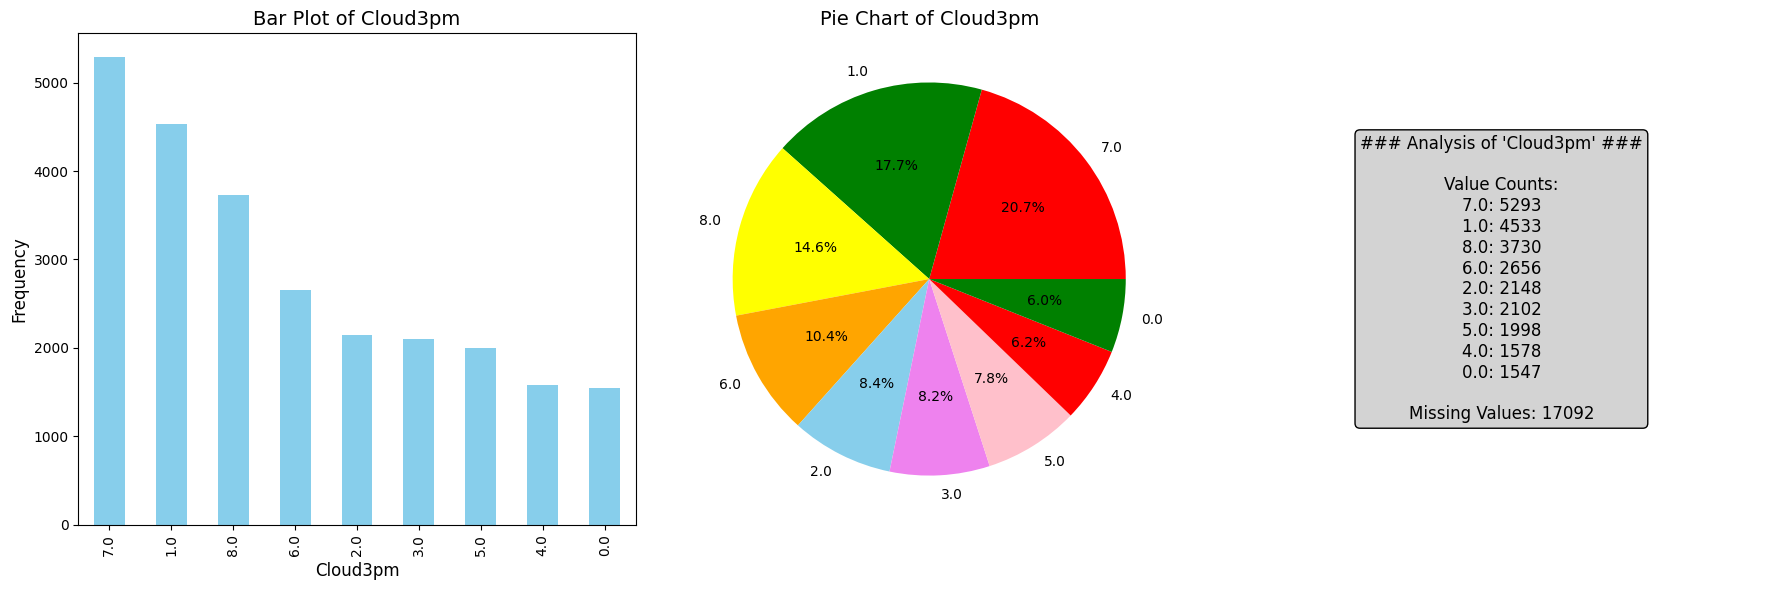

In [ ]:
# Call the function for all categorical features
for feature in categorical_features:
    print(f"Analyzing: {feature}")
    analyze_categorical_variable(testing_data, feature)

#### **Bivariate Analysis**


##### **Steps of doing Bivariate Analysis**

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots. Scatterplots are not as much beneficial<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps


##### **First Type: Numerical-Numerical**

**Function For Bivariate Analysis of Numerical-Numerical Combination Of Features**

In [ ]:

def bivariate_analysis_numerical_numerical(df, feature1, feature2):
    """
    Perform bivariate analysis between two numerical features, displaying only
    the scatter plot and the correlation coefficient, with different colors for each feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The column name of the first numerical feature.
        feature2 (str): The column name of the second numerical feature.
    """
    # Calculate correlation coefficient
    correlation_coefficient = df[[feature1, feature2]].corr().iloc[0, 1]

    # Set up a canvas for plotting with a smaller figure size
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Define unique colors for the features
    feature1_color = 'skyblue'
    feature2_color = 'orange'

    # Scatter Plot with Regression Line and Different Colors
    sns.regplot(x=feature1, y=feature2, data=df, ax=axs[0], scatter_kws={'alpha': 0.6, 'color': feature1_color}, line_kws={'color': feature2_color})
    axs[0].set_title(f'Scatterplot with Regression: {feature1} vs {feature2}', fontsize=14)
    axs[0].set_xlabel(feature1, fontsize=12)
    axs[0].set_ylabel(feature2, fontsize=12)

    # Display Correlation Coefficient with different color text
    axs[1].axis('off')  # Turn off the axis
    textstr = f"### Correlation Analysis ###\n\nCorrelation Coefficient: {correlation_coefficient:.2f}"
    axs[1].text(0.5, 0.5, textstr, fontsize=14, ha='center', va='center', bbox=dict(boxstyle="round", facecolor="lightgreen"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:

# Loop through all pairs of numerical features and call the analysis function
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        bivariate_analysis_numerical_numerical(testing_data, feature1, feature2)


##### **Second Type: Numerical-Categorical**

**Funtion For Bivariate Analysis of Numerical- Categorical Combination Of Features**

In [ ]:
def bivariate_analysis_numerical_categorical(df, numerical_feature, categorical_feature):
    """
    Perform bivariate analysis between a numerical feature and a categorical feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        numerical_feature (str): The column name of the numerical feature.
        categorical_feature (str): The column name of the categorical feature.
    """
    # Set up a canvas for plotting
    fig, axs = plt.subplots(3, 1, figsize=(14, 16))  # 3 rows, 1 column layout

    # Bar Plot
    sns.barplot(x=categorical_feature, y=numerical_feature, data=df, ax=axs[0], ci=None, palette='Set2')
    axs[0].set_title(f'Bar Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[0].set_xlabel(categorical_feature, fontsize=12)
    axs[0].set_ylabel(numerical_feature, fontsize=12)

    # Box Plot
    sns.boxplot(x=categorical_feature, y=numerical_feature, data=df, ax=axs[1], palette='Set3')
    axs[1].set_title(f'Box Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[1].set_xlabel(categorical_feature, fontsize=12)
    axs[1].set_ylabel(numerical_feature, fontsize=12)

    # KDE Plot
    for category in df[categorical_feature].dropna().unique():
        subset = df[df[categorical_feature] == category]
        sns.kdeplot(subset[numerical_feature], ax=axs[2], label=str(category), fill=True)
    axs[2].set_title(f'KDE Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[2].set_xlabel(numerical_feature, fontsize=12)
    axs[2].set_ylabel('Density', fontsize=12)
    axs[2].legend(title=categorical_feature)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:
# Perform bivariate analysis for each combination of numerical and categorical features
for num_feature in numerical_features:
    for cat_feature in categorical_features:
        print(f"Analyzing: {num_feature} vs {cat_feature}")
        bivariate_analysis_numerical_categorical(testing_data, num_feature, cat_feature)

##### **Third Type: CAtegorical-Categorical**

**Funtion For Bivariate Analysis of
categorical - Categorical Combination Of Features**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bivariate_analysis_categorical_categorical(df, categorical_feature1, categorical_feature2):
    """
    Perform bivariate analysis between two categorical features.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        categorical_feature1 (str): The column name of the first categorical feature.
        categorical_feature2 (str): The column name of the second categorical feature.
    """
    # Set up a canvas for plotting
    fig, axs = plt.subplots(2, 1, figsize=(14, 12))  # 2 rows, 1 column layout

    # Count Plot
    sns.countplot(x=categorical_feature1, hue=categorical_feature2, data=df, ax=axs[0], palette='Set2')
    axs[0].set_title(f'Count Plot: {categorical_feature1} by {categorical_feature2}', fontsize=14)
    axs[0].set_xlabel(categorical_feature1, fontsize=12)
    axs[0].set_ylabel('Count', fontsize=12)

    # Heatmap of Cross-Tabulation
    cross_tab = pd.crosstab(df[categorical_feature1], df[categorical_feature2])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', ax=axs[1], cbar=False)
    axs[1].set_title(f'Heatmap: {categorical_feature1} vs {categorical_feature2}', fontsize=14)
    axs[1].set_xlabel(categorical_feature2, fontsize=12)
    axs[1].set_ylabel(categorical_feature1, fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        bivariate_analysis_categorical_categorical(testing_data, feature1, feature2)

# **5. Encoding Categorical Features**

In [ ]:
# filter out the object type featur
training_to_be_encoded = training_data.select_dtypes(include=['object']).columns.tolist()
testing_to_be_encoded = testing_data.select_dtypes(include=['object']).columns.tolist()

print(training_to_be_encoded)
print(testing_to_be_encoded)


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
# label encoding them
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the training data
for column in training_to_be_encoded:
    training_data[column] = label_encoder.fit_transform(training_data[column])
    print(f"Encoded column: {column}")

# Apply label encoding to the testing data
for column in testing_to_be_encoded:
    testing_data[column] = label_encoder.fit_transform(testing_data[column])

Encoded column: Location
Encoded column: WindGustDir
Encoded column: WindDir9am
Encoded column: WindDir3pm
Encoded column: RainToday


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  int64  
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   Rainfall       98537 non-null  float64
 4   Evaporation    56985 non-null  float64
 5   Sunshine       52199 non-null  float64
 6   WindGustDir    99516 non-null  int64  
 7   WindGustSpeed  93036 non-null  float64
 8   WindDir9am     99516 non-null  int64  
 9   WindDir3pm     99516 non-null  int64  
 10  WindSpeed9am   98581 non-null  float64
 11  WindSpeed3pm   97681 non-null  float64
 12  Humidity9am    98283 non-null  float64
 13  Humidity3pm    97010 non-null  float64
 14  Pressure9am    89768 non-null  float64
 15  Pressure3pm    89780 non-null  float64
 16  Cloud9am       61944 non-null  float64
 17  Cloud3pm       59514 non-null  float64
 18  Temp9a

In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       42677 non-null  int64  
 1   MinTemp        42483 non-null  float64
 2   MaxTemp        42585 non-null  float64
 3   Rainfall       42250 non-null  float64
 4   Evaporation    24365 non-null  float64
 5   Sunshine       22178 non-null  float64
 6   WindGustDir    42677 non-null  int64  
 7   WindGustSpeed  39887 non-null  float64
 8   WindDir9am     42677 non-null  int64  
 9   WindDir3pm     42677 non-null  int64  
 10  WindSpeed9am   42264 non-null  float64
 11  WindSpeed3pm   41882 non-null  float64
 12  Humidity9am    42136 non-null  float64
 13  Humidity3pm    41573 non-null  float64
 14  Pressure9am    38411 non-null  float64
 15  Pressure3pm    38432 non-null  float64
 16  Cloud9am       26592 non-null  float64
 17  Cloud3pm       25585 non-null  float64
 18  Temp9a

# **6. Investigation Of Correlation Matrix**

## **6.1 Training Data**

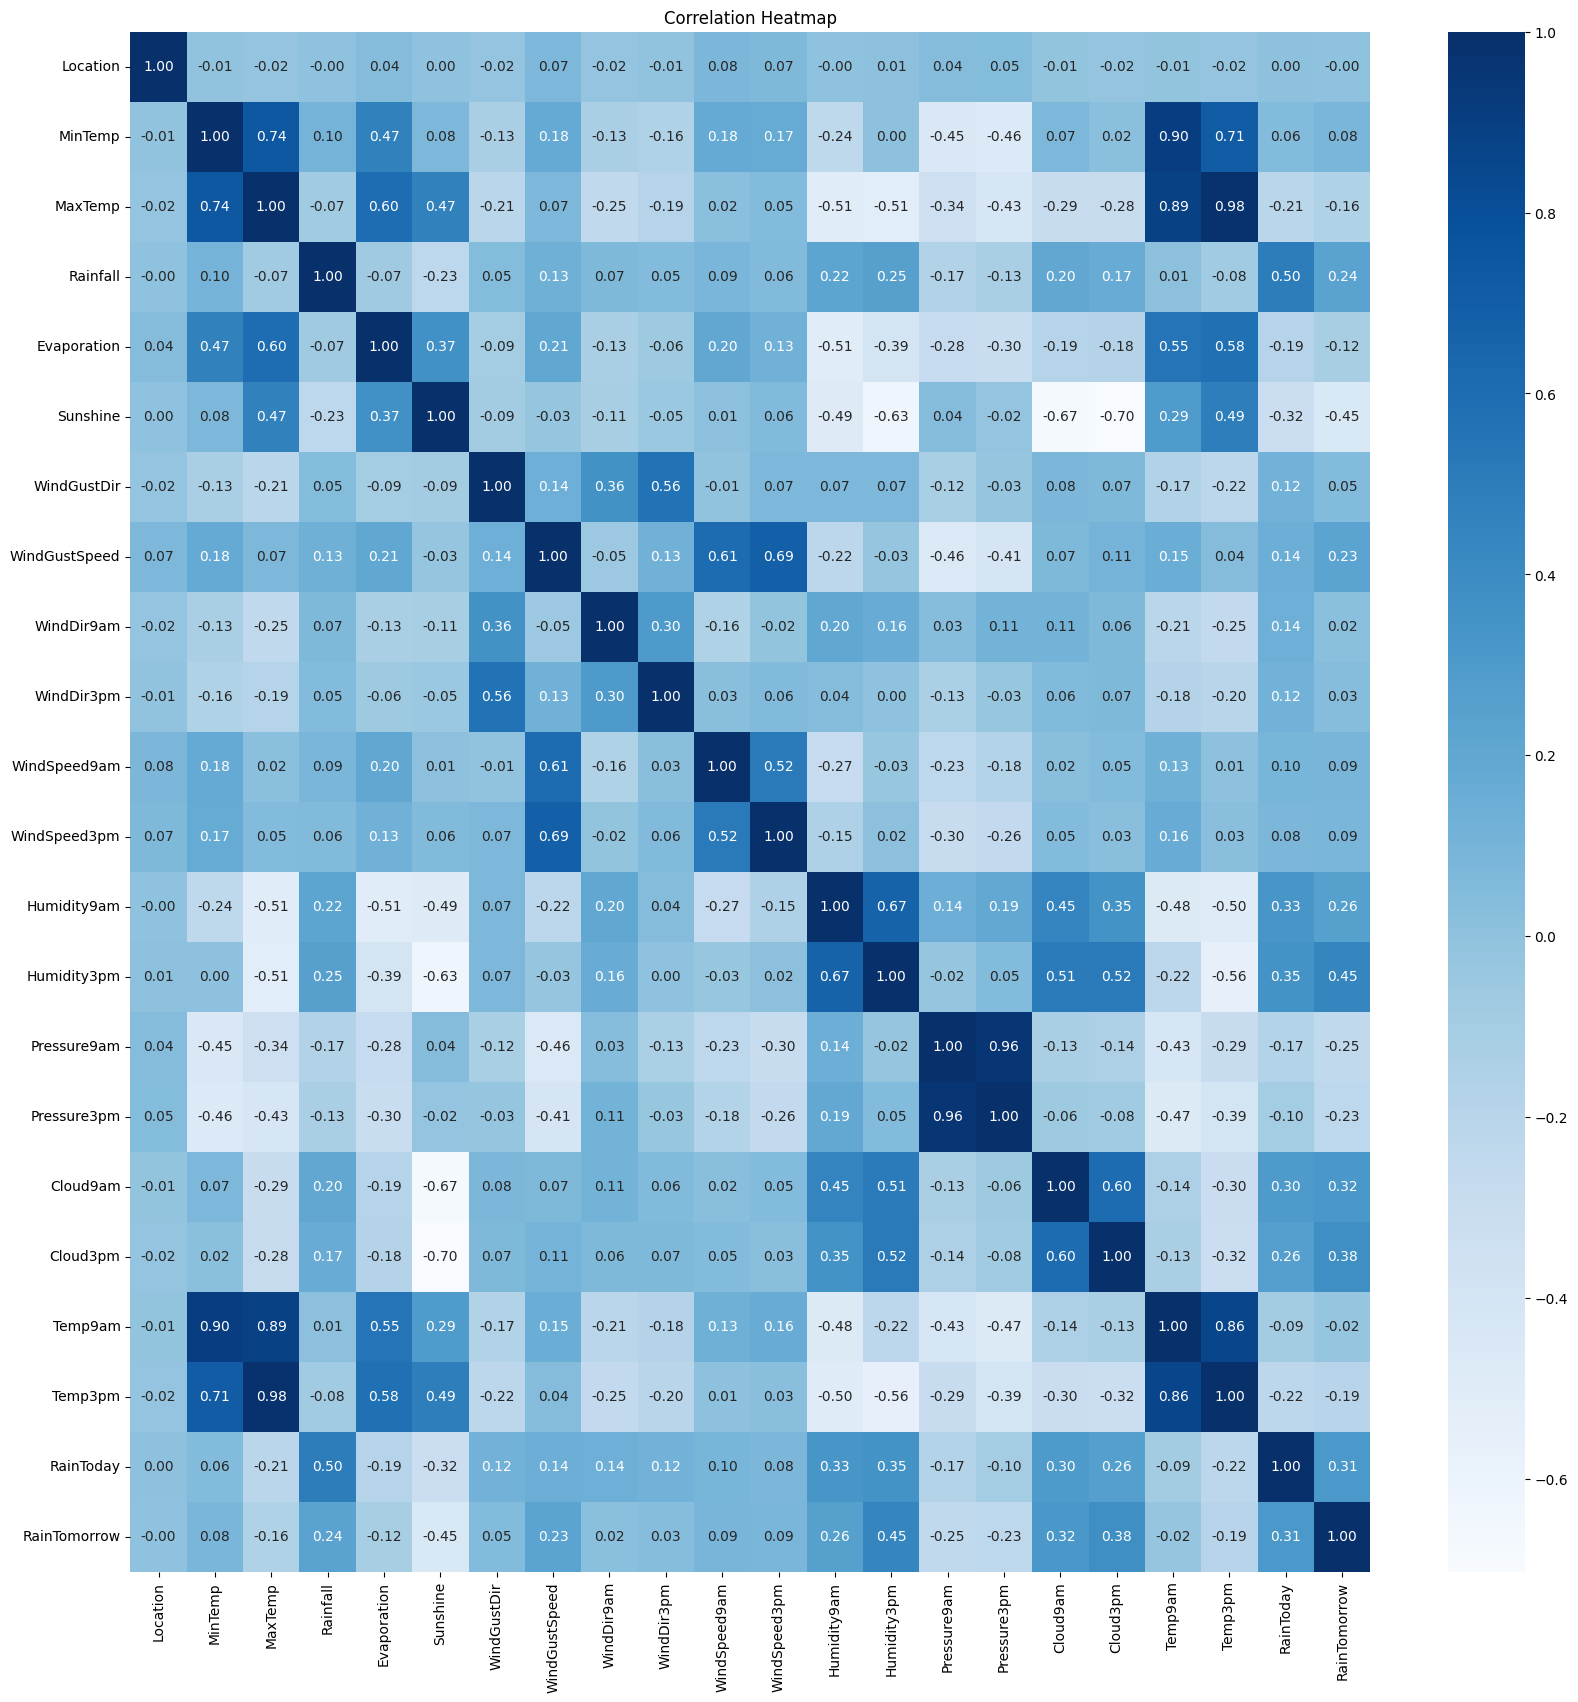

In [ ]:
corr = training_data.corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

## **6.2 Testing Data**

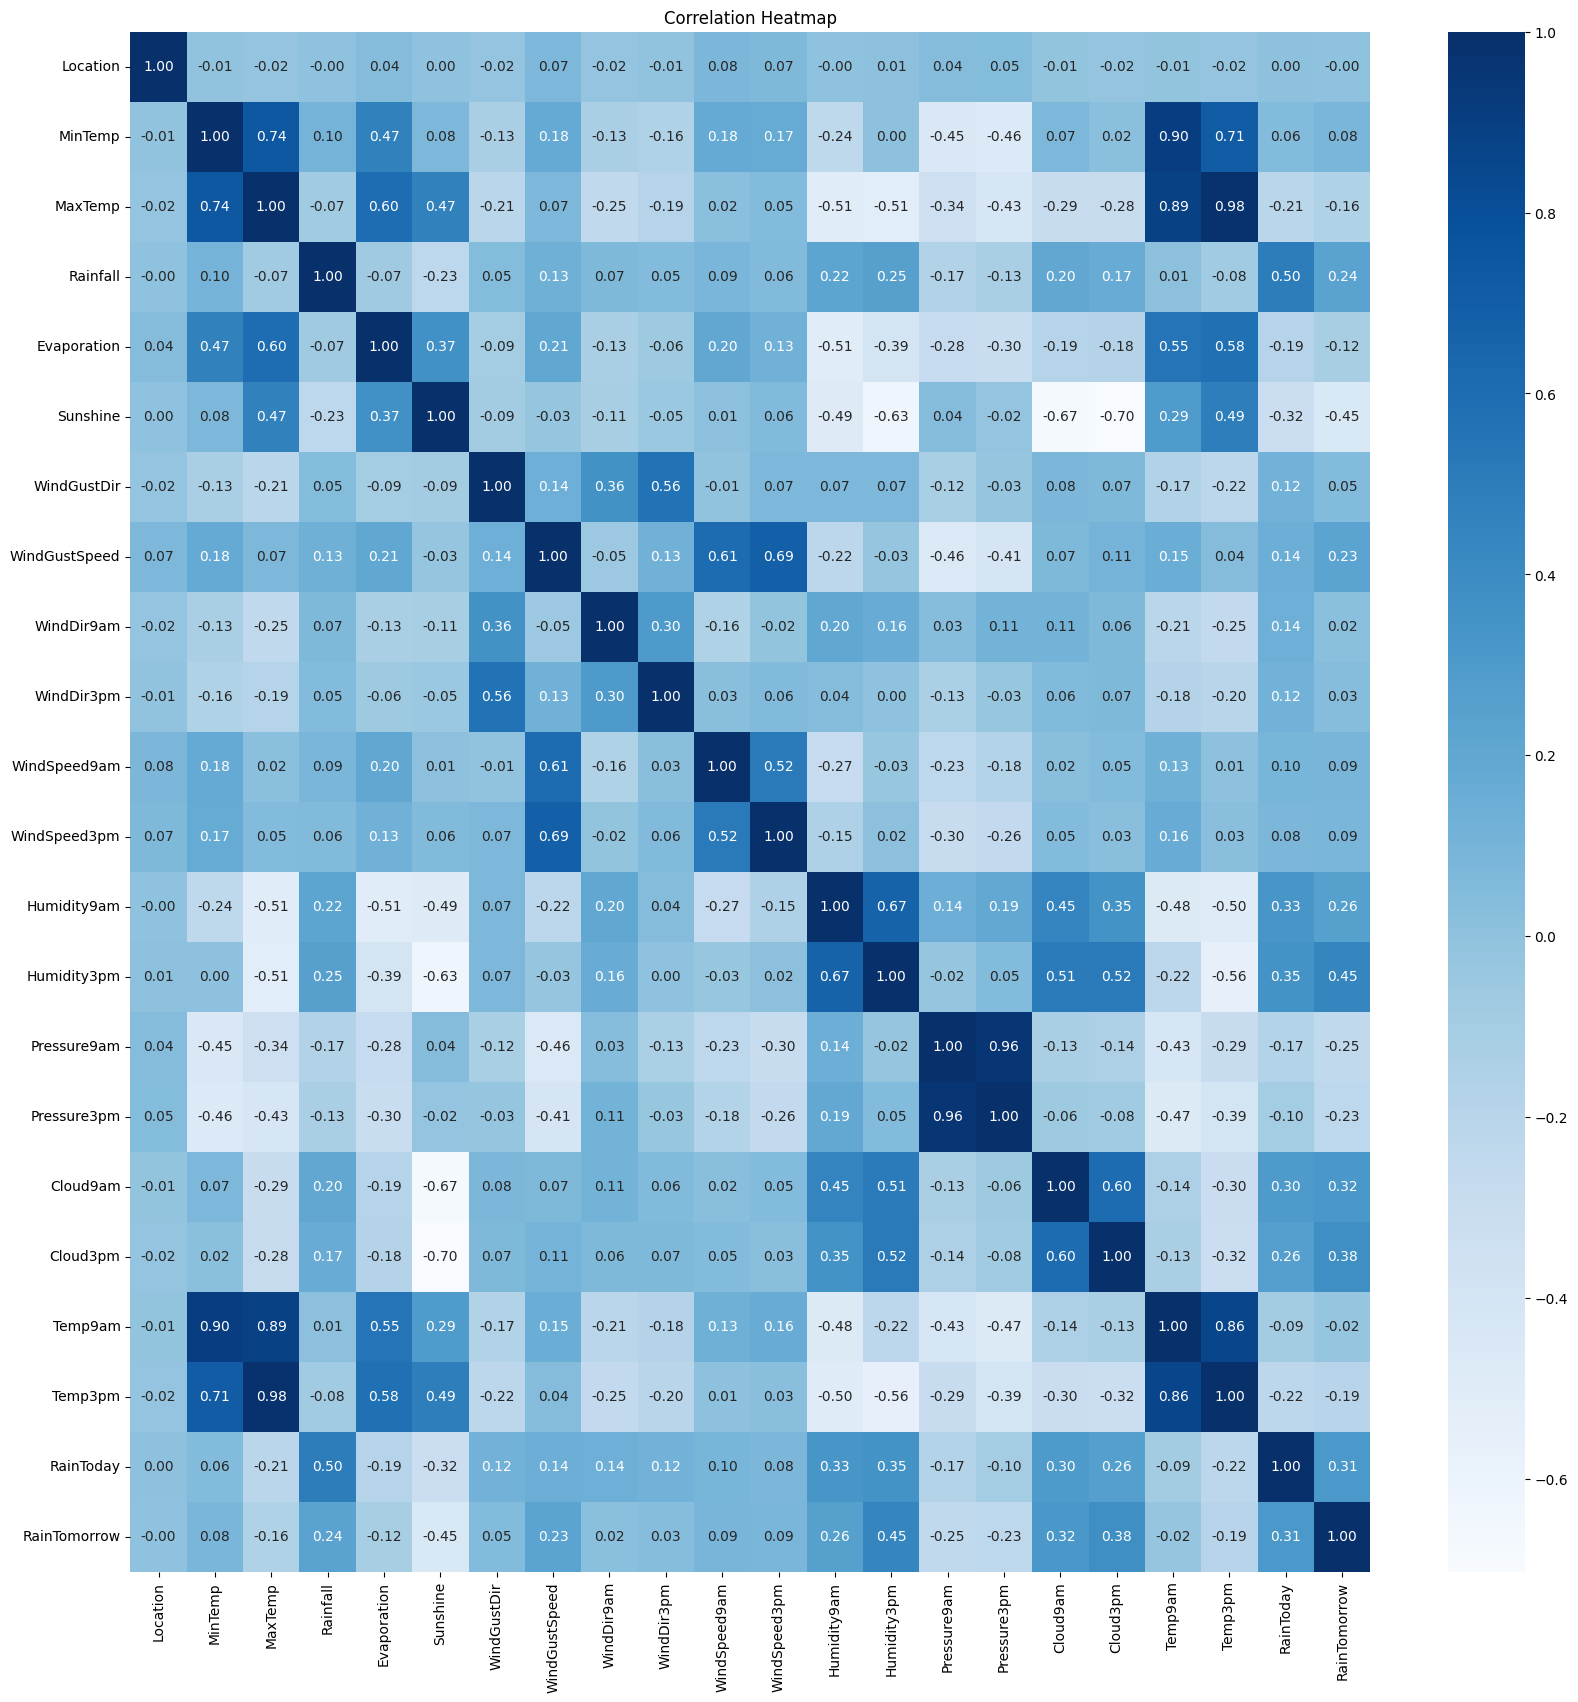

In [ ]:
corr = training_data.corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

# **7. Preprocessing**

## **7.1 Missing Values Handling**

In [ ]:
training_data.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir          0
WindGustSpeed     6480
WindDir9am           0
WindDir3pm           0
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
training_data.shape

(99516, 22)

In [ ]:
# dropping missing values
training_data.dropna(inplace=True)

In [ ]:
training_data.shape

(40748, 22)

In [ ]:
testing_data.shape

(42677, 21)

In [ ]:
testing_data.dropna(inplace=True)

In [ ]:
testing_data.shape

(17342, 21)

## **7.2 Handling Duplicated Values**

In [ ]:
print("Training ", training_data.duplicated().sum())
print("Testing ", testing_data.duplicated().sum())

Training  0
Testing  0


## **7.3 Class Balancing**

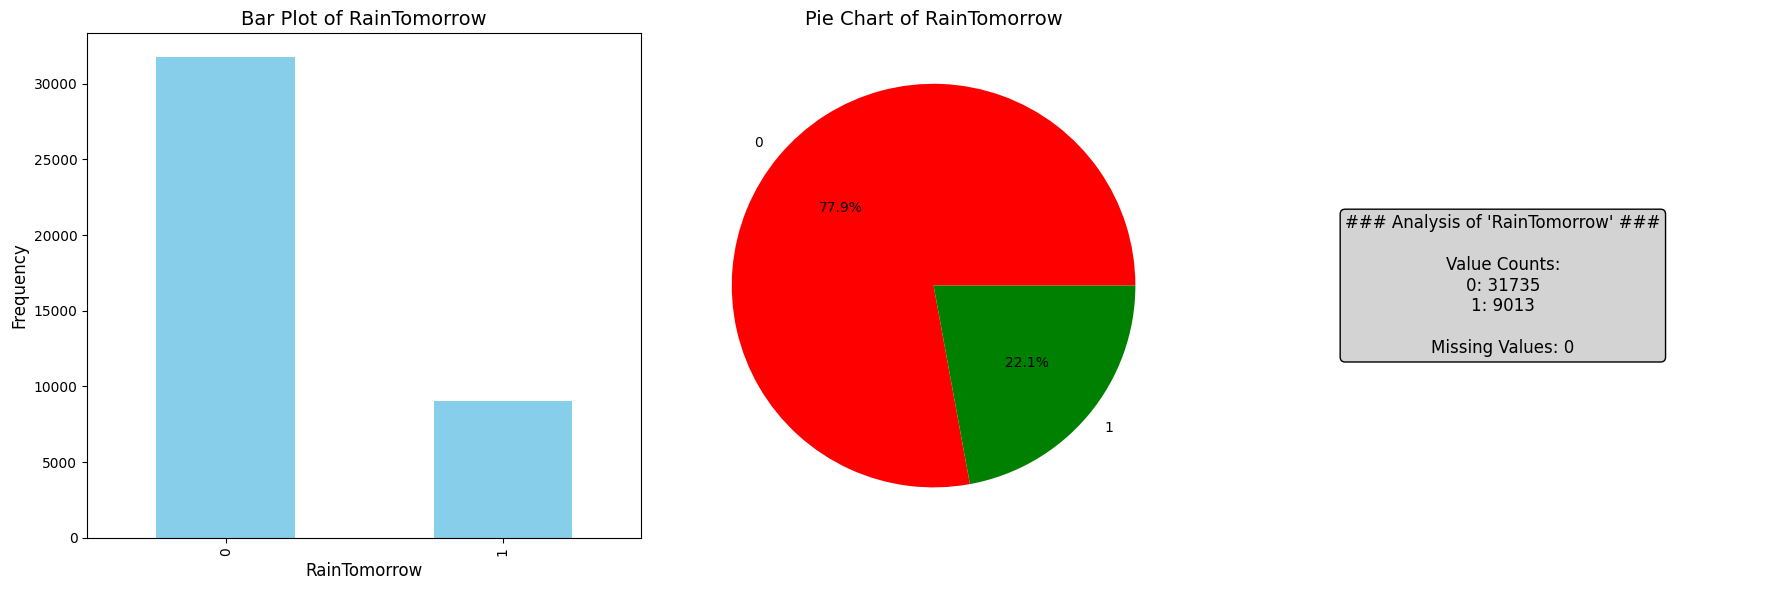

In [ ]:
analyze_categorical_variable(training_data, 'RainTomorrow')

In [ ]:
# calculating the imbalance ratio of Class
class_counts = training_data['RainTomorrow'].value_counts()


majority_class = class_counts.max()
minority_class = class_counts.min()

#  Calculate the imbalance ratio
imbalance_ratio = majority_class / minority_class

imbalance_ratio

3.5210251858426718

##### **Analyzing Class Imbalance Ratio**
* IR = 1: Perfectly balanced dataset
* 1 < IR ≤ 3: Mild imbalance
* IR > 3: Significant imbalance


---


**According to this, our data is mild imbalanced**


---



## **7.4 Outliers Detection**

In [ ]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(training_data.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# printing the number of rows containing outliers
print("Number of rows containing outliers:", len(outlier_indices))

Number of rows containing outliers: 2214


In [ ]:
# calculating the percentage of outliers with complete dataset
percentage_outliers = (len(outlier_indices) / len(training_data)) * 100
percentage_outliers

5.433395504073819

In [ ]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(testing_data.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# printing the number of rows containing outliers
print("Number of rows containing outliers:", len(outlier_indices))

Number of rows containing outliers: 963


In [ ]:
# calculating the percentage of outliers with complete dataset
percentage_outliers = (len(outlier_indices) / len(testing_data)) * 100
percentage_outliers

5.55299273440203

## **7.5 Feature Engineering**

### **7.5.1 Feature Creation**

In [ ]:
training_data_copy = training_data.copy()
testing_data_copy = testing_data.copy()

In [ ]:
# combine min and max temp as average temp
training_data['AverageTemp'] = (training_data['MinTemp'] + training_data['MaxTemp']) / 2
testing_data['AverageTemp'] = (testing_data['MinTemp'] + testing_data['MaxTemp']) / 2

# drop the min and max temp
training_data.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)
testing_data.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)

# make windspeed change using wind speed at 3 and 9
training_data['WindSpeedChange'] = training_data['WindSpeed3pm'] - training_data['WindSpeed9am']
testing_data['WindSpeedChange'] = testing_data['WindSpeed3pm'] - testing_data['WindSpeed9am']

# drop wind speed at 3 and 9
training_data.drop(['WindSpeed3pm', 'WindSpeed9am'], axis=1, inplace=True)
testing_data.drop(['WindSpeed3pm', 'WindSpeed9am'], axis=1, inplace=True)

# make humidity change using humidity at 9 and 3
training_data['HumidityChange'] = training_data['Humidity3pm'] - training_data['Humidity9am']
testing_data['HumidityChange'] = testing_data['Humidity3pm'] - testing_data['Humidity9am']

# drop humidity at 9 and 3
training_data.drop(['Humidity3pm', 'Humidity9am'], axis=1, inplace=True)
testing_data.drop(['Humidity3pm', 'Humidity9am'], axis=1, inplace=True)

# make pressure change
training_data['PressureChange'] = training_data['Pressure3pm'] - training_data['Pressure9am']
testing_data['PressureChange'] = testing_data['Pressure3pm'] - testing_data['Pressure9am']

# drop pressure at 3 and 9
training_data.drop(['Pressure3pm', 'Pressure9am'], axis=1, inplace=True)
testing_data.drop(['Pressure3pm', 'Pressure9am'], axis=1, inplace=True)

# make temp change
training_data['TempChange'] = training_data['Temp3pm'] - training_data['Temp9am']
testing_data['TempChange'] = testing_data['Temp3pm'] - testing_data['Temp9am']

# drop temp at 3 and 9
training_data.drop(['Temp3pm', 'Temp9am'], axis=1, inplace=True)
testing_data.drop(['Temp3pm', 'Temp9am'], axis=1, inplace=True)

# wind direction change
training_data['WindDirectionChange'] = training_data['WindDir3pm'] - training_data['WindDir9am']
testing_data['WindDirectionChange'] = testing_data['WindDir3pm'] - testing_data['WindDir9am']

# drop the winddir at 3 and 9
training_data.drop(['WindDir3pm', 'WindDir9am'], axis=1, inplace=True)
testing_data.drop(['WindDir3pm', 'WindDir9am'], axis=1, inplace=True)

# cloud change
training_data['CloudChange'] = training_data['Cloud3pm'] - training_data['Cloud9am']
testing_data['CloudChange'] = testing_data['Cloud3pm'] - testing_data['Cloud9am']

# drop the cloud at 3 and 9
training_data.drop(['Cloud3pm', 'Cloud9am'], axis=1, inplace=True)
testing_data.drop(['Cloud3pm', 'Cloud9am'], axis=1, inplace=True)



In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40748 entries, 4183 to 97410
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             40748 non-null  int64  
 1   Rainfall             40748 non-null  float64
 2   Evaporation          40748 non-null  float64
 3   Sunshine             40748 non-null  float64
 4   WindGustDir          40748 non-null  int64  
 5   WindGustSpeed        40748 non-null  float64
 6   RainToday            40748 non-null  int64  
 7   RainTomorrow         40748 non-null  int64  
 8   AverageTemp          40748 non-null  float64
 9   WindSpeedChange      40748 non-null  float64
 10  HumidityChange       40748 non-null  float64
 11  PressureChange       40748 non-null  float64
 12  TempChange           40748 non-null  float64
 13  WindDirectionChange  40748 non-null  int64  
 14  CloudChange          40748 non-null  float64
dtypes: float64(10), int64(5)
memory usage:

In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17342 entries, 1756 to 41701
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             17342 non-null  int64  
 1   Rainfall             17342 non-null  float64
 2   Evaporation          17342 non-null  float64
 3   Sunshine             17342 non-null  float64
 4   WindGustDir          17342 non-null  int64  
 5   WindGustSpeed        17342 non-null  float64
 6   RainToday            17342 non-null  int64  
 7   AverageTemp          17342 non-null  float64
 8   WindSpeedChange      17342 non-null  float64
 9   HumidityChange       17342 non-null  float64
 10  PressureChange       17342 non-null  float64
 11  TempChange           17342 non-null  float64
 12  WindDirectionChange  17342 non-null  int64  
 13  CloudChange          17342 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.0 MB


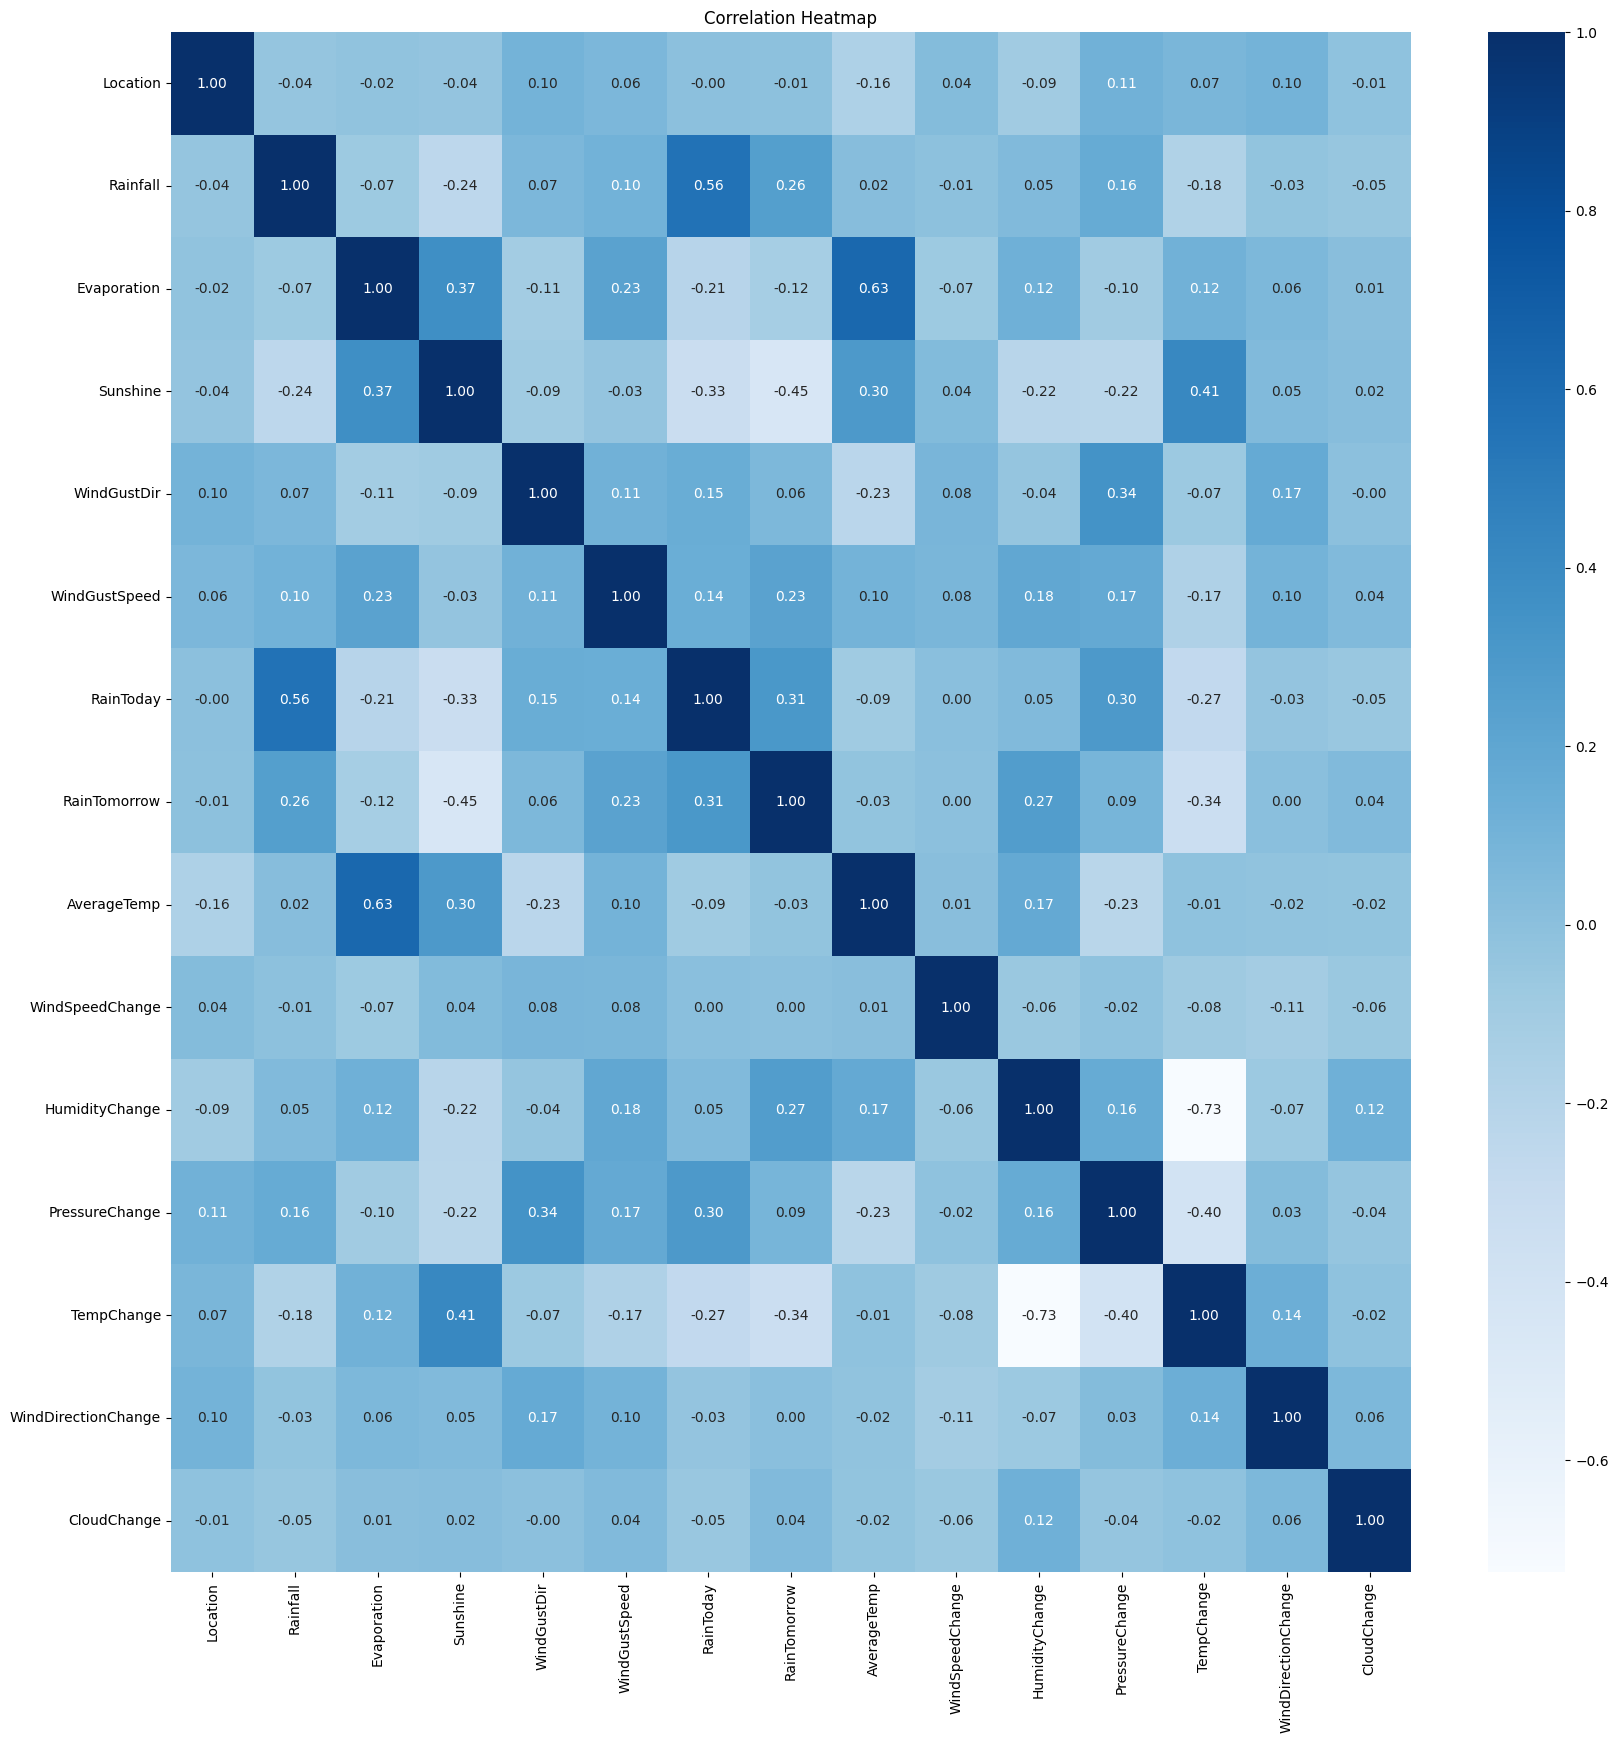

In [ ]:
corr = training_data.corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

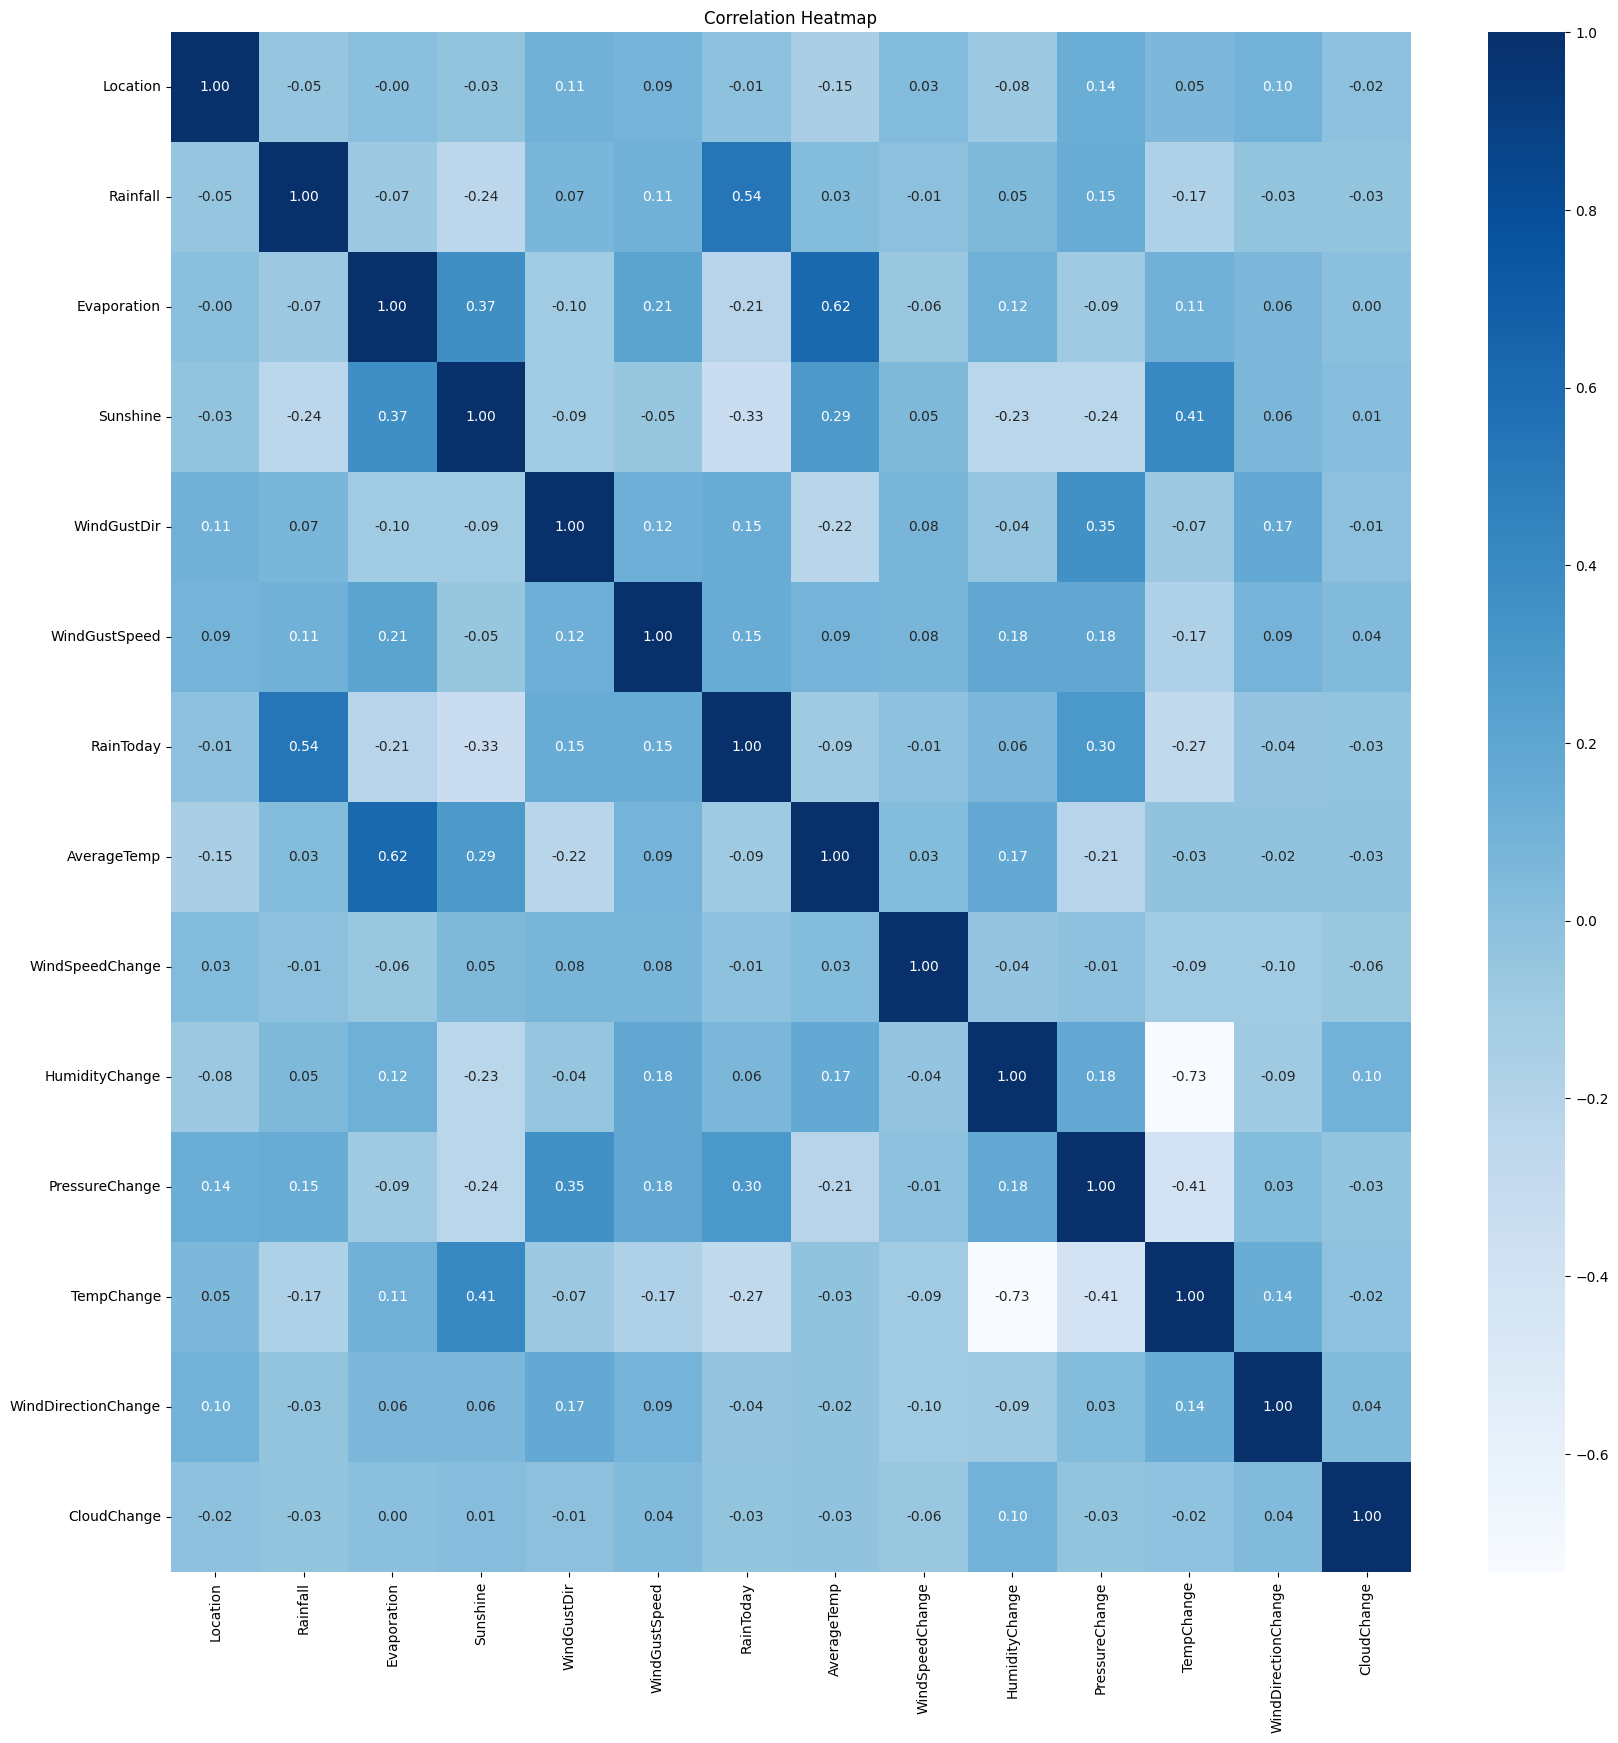

In [ ]:
corr = testing_data.corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

### **7.5.2 Feature Selection Using RFE**

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40748 entries, 4183 to 97410
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             40748 non-null  int64  
 1   Rainfall             40748 non-null  float64
 2   Evaporation          40748 non-null  float64
 3   Sunshine             40748 non-null  float64
 4   WindGustDir          40748 non-null  int64  
 5   WindGustSpeed        40748 non-null  float64
 6   RainToday            40748 non-null  int64  
 7   RainTomorrow         40748 non-null  int64  
 8   AverageTemp          40748 non-null  float64
 9   WindSpeedChange      40748 non-null  float64
 10  HumidityChange       40748 non-null  float64
 11  PressureChange       40748 non-null  float64
 12  TempChange           40748 non-null  float64
 13  WindDirectionChange  40748 non-null  int64  
 14  CloudChange          40748 non-null  float64
dtypes: float64(10), int64(5)
memory usage:

In [ ]:
testing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17342 entries, 1756 to 41701
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             17342 non-null  int64  
 1   Rainfall             17342 non-null  float64
 2   Evaporation          17342 non-null  float64
 3   Sunshine             17342 non-null  float64
 4   WindGustDir          17342 non-null  int64  
 5   WindGustSpeed        17342 non-null  float64
 6   RainToday            17342 non-null  int64  
 7   AverageTemp          17342 non-null  float64
 8   WindSpeedChange      17342 non-null  float64
 9   HumidityChange       17342 non-null  float64
 10  PressureChange       17342 non-null  float64
 11  TempChange           17342 non-null  float64
 12  WindDirectionChange  17342 non-null  int64  
 13  CloudChange          17342 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.0 MB


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y) for training data
X_train = training_data.drop(columns=['RainTomorrow'])  # Features in training data
y_train = training_data['RainTomorrow']  # Target in training data

# Define features (X) for testing data (without target column 'RainTomorrow')
X_test = testing_data.drop(columns=['RainTomorrow'], errors='ignore')  # Features in testing data (no target)
# Note: errors='ignore' ensures no error if 'RainTomorrow' is not present in the testing data

# Initialize a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE to select the top 10 features using the training data
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get selected features for training data
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Transform the testing data using the selected features
X_test_rfe = X_test[selected_features]

# Ensure that X_train_rfe and X_test_rfe are DataFrames, not NumPy arrays
X_train_rfe = pd.DataFrame(X_train_rfe, columns=selected_features)
X_test_rfe = X_test_rfe[selected_features]

# Now you can fit the model on the selected features of the training data and evaluate on the testing data
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

# You can evaluate your model here (e.g., accuracy, confusion matrix)


Selected Features: Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'AverageTemp',
       'WindSpeedChange', 'HumidityChange', 'PressureChange', 'TempChange',
       'WindDirectionChange'],
      dtype='object')


## **7.6 Feature Scaling**

In [ ]:
# standardizeing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_data[selected_features] = scaler.fit_transform(training_data[selected_features])
testing_data[selected_features] = scaler.transform(testing_data[selected_features])

# **8. Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Define your features (X) and target (y) again for splitting
X = training_data[selected_features]  # Use the selected features after RFE
y = training_data['RainTomorrow']  # The target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.843558282208589
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6339
           1       0.71      0.50      0.59      1811

    accuracy                           0.84      8150
   macro avg       0.79      0.72      0.75      8150
weighted avg       0.83      0.84      0.83      8150

Confusion Matrix:
[[5963  376]
 [ 899  912]]




### Accuracy:
- **Accuracy**: 84.36% – This is generally a solid result, but in imbalanced datasets, accuracy may not always reflect the model's true performance, especially for the minority class.

### Classification Report:
- **Class 0 (No Rain Tomorrow)**:
  - **Precision**: 0.87 – Out of all predictions for class 0, 87% are correct.
  - **Recall**: 0.94 – The model correctly identified 94% of the actual class 0 instances.
  - **F1-Score**: 0.90 – A good balance between precision and recall for class 0.
  
- **Class 1 (Rain Tomorrow)**:
  - **Precision**: 0.71 – 71% of the predictions for class 1 are correct.
  - **Recall**: 0.51 – The model correctly identifies only 51% of actual class 1 instances. This indicates that the model struggles to predict rain days correctly.
  - **F1-Score**: 0.59 – The balance between precision and recall for class 1 is lower than for class 0.

### Confusion Matrix:
- **True Positives (TP)**: 915 (Class 1 correctly predicted as rain)
- **False Positives (FP)**: 379 (Class 0 incorrectly predicted as rain)
- **True Negatives (TN)**: 5960 (Class 0 correctly predicted as no rain)
- **False Negatives (FN)**: 896 (Class 1 incorrectly predicted as no rain)

### Observations:
- **Class Imbalance**: Class 1 (rain tomorrow) is underrepresented in the dataset, which is reflected in the lower recall and F1-score for class 1. The model seems to predict `0` (no rain) much better than `1` (rain).
  
### Possible Improvements:
1. **Class Imbalance**:
   - **Resampling**: You can try oversampling the minority class (rain tomorrow) using techniques like SMOTE (Synthetic Minority Over-sampling Technique), or undersampling the majority class.
   - **Class Weights**: Another approach is to adjust the class weights in the model to penalize wrong predictions for the minority class more heavily.

2. **Hyperparameter Tuning**:
   - Fine-tuning the hyperparameters of the `RandomForestClassifier` (like `max_depth`, `min_samples_split`, etc.) could improve model performance.


# **9. Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [10, 20],                 # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],                    # Minimum number of samples required at a leaf node
    'max_features': ['log2'],            # Number of features to consider for splitting a node
    'bootstrap': [True]                           # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV (using 100 iterations for faster results)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the model with the best parameters
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best Score: 0.8468310939321432
Accuracy: 0.8409815950920245
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6339
           1       0.70      0.51      0.59      1811

    accuracy                           0.84      8150
   macro avg       0.78      0.72      0.74      8150
weighted avg       0.83      0.84      0.83      8150

Confusion Matrix:
[[5937  402]
 [ 894  917]]


# **10. BONUS: Visualizations**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X_train' is the training data with selected features
# Add the target variable to the training data for visualization purposes
selected_features_data = X_train[selected_features].copy()
selected_features_data['RainTomorrow'] = y_train

# 1. Pairplot
sns.pairplot(selected_features_data, hue='RainTomorrow', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features vs RainTomorrow', y=1.02)
plt.show()

# 2. Correlation Matrix and Heatmap
# Compute correlation matrix
corr_matrix = selected_features_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


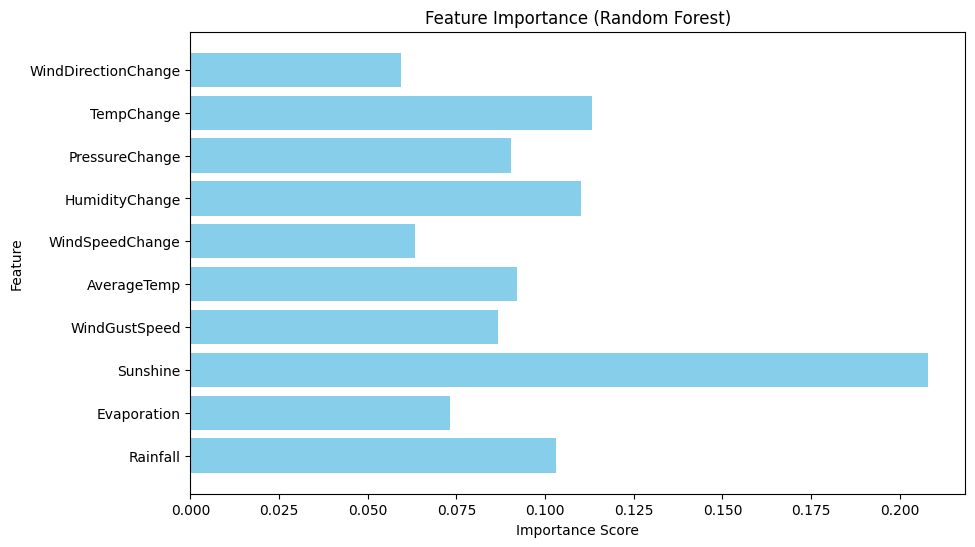

In [ ]:
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# ---------------------------- #
# 1. Feature Importance using Random Forest
# ---------------------------- #

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

